# *+Processing with Sentinel bands & RN & biomass data of other authors+*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
input_data = '/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/Pre_GIS_data/Site_with_Sentinel_bands_data_2020.csv'
df = pd.read_csv(input_data)
df.head()

,Site #,Origin,Dominant_s,N_trees at,A_year,D_live_cm,H_live_m,G_live_m2_,f_Gs_cub_m,f_M_stem_kg_m2,...,r2019B03,r2019B04,r2019B05,r2019B06,r2019B07,r2019B08,r2019B09,r2019B10,r2019B11,r2019B12
0,1,n,Birch,57,35,13.5,17.3,15.1,123,5.83,...,0.030628,0.266210,0.166299,0.081316,0.793351,-0.733693,0.532051,-15.396488,-11.262037,0.731937
1,2,a,Pine,25,58,15.0,16.9,39.0,317,11.67,...,0.027934,0.183349,0.102656,0.052144,0.735493,-0.655456,0.557000,-16.012156,-9.364664,0.584920
2,3,a,Pine,32,58,13.7,16.8,42.8,346,12.37,...,0.026123,0.184066,0.099625,0.050684,0.751436,-0.650575,0.568148,-13.609903,-9.726108,0.715177
3,4,a,Pine,63,58,20.3,18.4,38.8,315,13.88,...,0.027390,0.177221,0.102540,0.052198,0.732404,-0.648310,0.544717,-14.321650,-10.457536,0.730390
4,5,a,Pine,53,58,17.5,19.9,48.3,383,14.51,...,0.025702,0.183705,0.101394,0.050437,0.754481,-0.660382,0.569112,-13.934375,-11.393335,0.817430


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Site #', 'Origin', 'Dominant_s', 'N_trees at', 'A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_', 'f_Gs_cub_m', 'f_M_stem_kg_m2', 'f_M_stem_bark_kg_m2', 'f_M_crown_kg_m2', 'f_M_foliage_kg_m2', 'f_M_AG_kg_m2', 'Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'F_Soil', 'M_Soil', 'X_N36', 'Y_N36', 'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Tag_Cs', 'Tag_Sr', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'Cs_2021_kB', 'Sr_2021_kB', 'AEDR_count', 'AEDR_mean', 'Distance_k', 'Azimuth', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12', 'r2020B13', 'r2019B01', 'r2019B02', 'r2019B03', 'r2019B04', 'r2019B05', 'r2019B06', 'r2019B07', 'r2019B08', 'r2019B09', 'r2019B10', 'r2019B11', 'r2019B12'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Ln_Gs_cub_m', 'Ln_M_stem_kg_m2', 'Ln_M_stem_bark_kg_m2', 'Ln_M_crown_kg_m2', 'Ln_M_foliage_kg_m2', 'Ln_M_AG_kg_m2', 'Ln_Cs_wood', 'Ln_Sr_wood', 'Ln_Tag_Cs', 'Ln_Tag_Sr', 'r2020B01', 'r2020B02', 'r2020B03', 'r2020B04', 'r2020B05', 'r2020B06', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10', 'r2020B11', 'r2020B12'])
            


# Show the first five columns
select.head()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
0,4.81,1.76,-0.31,-0.16,-2.44,1.91,6.8,9.2,-0.7,2.6,...,0.028616,0.254417,0.175280,0.086611,0.797761,-0.749311,0.491270,-15.527246,-11.385074,0.733806
1,5.76,2.46,-0.25,0.34,-0.20,2.63,8.2,9.6,0.6,2.9,...,0.022230,0.189826,0.092225,0.047120,0.789129,-0.705355,0.659775,-16.547673,-10.947565,0.661723
2,5.85,2.52,-0.11,0.55,-0.21,2.70,8.4,9.6,0.8,2.9,...,0.021190,0.204363,0.093062,0.043824,0.812120,-0.704758,0.631348,-14.341917,-11.884799,0.829603
3,5.75,2.63,-0.08,0.39,-0.35,2.78,8.1,9.4,0.5,2.7,...,0.025284,0.187998,0.102872,0.048585,0.762431,-0.695416,0.601894,-14.885610,-11.725163,0.787609
4,5.95,2.67,0.00,0.57,-0.37,2.83,7.7,9.4,0.2,2.8,...,0.024911,0.216271,0.096981,0.044880,0.793606,-0.717562,0.642942,-14.647913,-11.512282,0.785698


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ln_Gs_cub_m           198 non-null    float64
 1   Ln_M_stem_kg_m2       198 non-null    float64
 2   Ln_M_stem_bark_kg_m2  198 non-null    float64
 3   Ln_M_crown_kg_m2      198 non-null    float64
 4   Ln_M_foliage_kg_m2    198 non-null    float64
 5   Ln_M_AG_kg_m2         198 non-null    float64
 6   Ln_Cs_wood            198 non-null    float64
 7   Ln_Sr_wood            198 non-null    float64
 8   Ln_Tag_Cs             198 non-null    float64
 9   Ln_Tag_Sr             198 non-null    float64
 10  r2020B01              198 non-null    float64
 11  r2020B02              198 non-null    float64
 12  r2020B03              198 non-null    float64
 13  r2020B04              198 non-null    float64
 14  r2020B05              198 non-null    float64
 15  r2020B06              1

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()

/tmp/ipykernel_4163/4147815954.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_s"])["f_Gs_cub_m", "f_M_stem_kg_m2"].describe()


f_Gs_cub_m                                                      \
                count        mean         std    min    25%    50%    75%   
Dominant_s                                                                  
Alder            13.0  393.153846  113.795757  199.0  311.0  434.0  462.0   
Aspen             7.0  241.571429  134.878782  121.0  147.0  194.0  321.0   
Birch            45.0  164.622222   83.668254   11.0  107.0  157.0  222.0   
Oak               9.0  199.777778   88.192655   79.0  112.0  220.0  255.0   
Pine            123.0  304.699187  185.582068    2.0  150.5  319.0  457.5   
Spruce            1.0  619.000000         NaN  619.0  619.0  619.0  619.0   

                  f_M_stem_kg_m2                                             \
              max          count       mean       std    min     25%    50%   
Dominant_s                                                                    
Alder       558.0           13.0  16.823846  4.334304   9.90  13.560  16.96   
Aspen       440.0            7.0  11.862857  7.997334   4.64   6.470   9.79   
Birch       346.0           45.0   8.030444  4.090891   0.84   4.960   7.75   
Oak         313.0            9.0  10.728889  4.976167   3.59   5.870  11.72   
Pine        671.0          123.0  11.991789  7.094609   0.05   6.285  12.37   
Spruce      619.0            1.0  23.830000       NaN  23.83  23.830  23.83   

                           
               75%    max  
Dominant_s                 
Alder       20.130  24.29  
Aspen       14.810  26.05  
Birch       10.990  17.00  
Oak         13.590  18.99  
Pine        17.645  25.37  
Spruce      23.830  23.83

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Ln_Gs_cub_m,Ln_M_stem_kg_m2,Ln_M_stem_bark_kg_m2,Ln_M_crown_kg_m2,Ln_M_foliage_kg_m2,Ln_M_AG_kg_m2,Ln_Cs_wood,Ln_Sr_wood,Ln_Tag_Cs,Ln_Tag_Sr,...,r2020B03,r2020B04,r2020B05,r2020B06,r2020B07,r2020B08,r2020B09,r2020B10,r2020B11,r2020B12
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,5.234646,2.081717,-0.039242,0.171313,-0.953081,2.305758,6.052020,7.395960,-0.566667,2.342424,...,0.027499,0.213645,0.125537,0.063662,0.767194,-0.703079,0.540963,-16.145709,-10.863669,0.675418
std,1.129652,1.126519,0.789675,0.588506,0.719719,0.931192,2.089707,2.070848,1.250989,0.939283,...,0.009532,0.042641,0.035475,0.023731,0.078273,0.060738,0.132304,1.343250,1.161017,0.069250
min,0.690000,-3.000000,-3.910000,-1.560000,-2.920000,-0.800000,1.600000,2.400000,-4.700000,-0.300000,...,0.014640,0.124161,0.079896,0.036570,0.381333,-0.823403,0.038198,-22.517731,-14.262763,0.492975
25%,4.960000,1.812500,-0.190000,-0.025000,-1.525000,2.052500,4.300000,5.800000,-1.300000,1.700000,...,0.022284,0.187070,0.095832,0.046290,0.745438,-0.735205,0.502225,-16.970102,-11.519514,0.628884
50%,5.510000,2.420000,0.060000,0.310000,-0.690000,2.580000,6.400000,7.600000,-0.500000,2.500000,...,0.024743,0.204261,0.115558,0.058209,0.784239,-0.704881,0.577675,-16.010171,-10.784612,0.667561
75%,5.987500,2.807500,0.387500,0.530000,-0.360000,2.937500,7.400000,8.800000,0.400000,3.000000,...,0.028527,0.236440,0.150857,0.072122,0.808780,-0.680539,0.632284,-15.159997,-10.008004,0.720595
max,6.510000,3.260000,1.650000,1.410000,0.110000,3.390000,11.400000,13.900000,1.700000,4.700000,...,0.080615,0.369338,0.243667,0.187427,0.885319,-0.410944,0.710583,-13.281957,-7.650135,0.860863


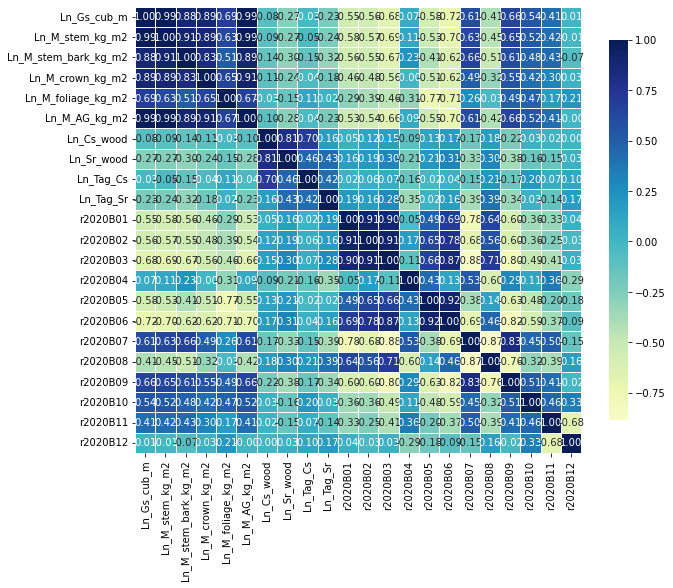

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['r2020B04', 'r2020B07', 'r2020B08', 'r2020B09', 'r2020B10'])
y = pd.DataFrame(select, columns= ['Ln_Tag_Sr'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [10]:
# Columns in "X" data collections
X.head()

,r2020B04,r2020B07,r2020B08,r2020B09,r2020B10
0,0.254417,0.797761,-0.749311,0.491270,-15.527246
1,0.189826,0.789129,-0.705355,0.659775,-16.547673
2,0.204363,0.812120,-0.704758,0.631348,-14.341917
3,0.187998,0.762431,-0.695416,0.601894,-14.885610
4,0.216271,0.793606,-0.717562,0.642942,-14.647913


In [11]:
# Columns in "y" data collections
y.head()

,Ln_Tag_Sr
0,2.6
1,2.9
2,2.9
3,2.7
4,2.8


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.006529510393417093, -0.1394194087029339, -0.05183415185590068]
    Mean: -0.062
    Std: 0.060

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.99844717 0.89996348 0.92032801]
    Mean: 0.940
    Std: 0.042

 --------------------
Mean absolute error (MAE): 

    Scores: [0.7485741013830358, 0.8132003957123467, 0.8693158084808876]
    Mean: 0.810
    Std: 0.049

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: 0.054 (std: 0.417)
Parameters: {'colsample_bytree': 0.7318469753907232, 'gamma': 0.4550682668492081, 'learning_rate': 0.06644937736093733, 'max_depth': 2, 'n_estimators': 75, 'subsample': 0.5107232023187358}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.12387033, 0.18818779, 0.24940548, ..., 0.52099452, 0.2029974 ,
       0.32991757]), 'std_fit_time': array([0.01479248, 0.01276261, 0.04078309, ..., 0.23334858, 0.00873621,
       0.00627955]), 'mean_score_time': array([0.00442753, 0.00458379, 0.00461206, ..., 0.00880284, 0.00491862,
       0.0053071 ]), 'std_score_time': array([9.15402662e-05, 1.42670873e-04, 7.31000228e-05, ...,
       5.43468738e-03, 4.72601205e-04, 1.02570153e-03]), 'param_colsample_bytree': masked_array(data=[0.24335245337818023, 0.6126185067596452,
                   0.5406920642622614, ..., 0.5860295201476027,
                   0.14628812500802374, 0.35450118942072845],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.3257652021059695, 0.24381658448386395,
                   0.11356262405521539, ..., 0.34120279176771834,
                   0.1345423722316309, 0.06574260987920633],
  

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.7318469753907232
Gamma: 0.4550682668492081
Learning_rate: 0.06644937736093733
Max_depth: 2
N_estimators: 75
Subsample: 0.5107232023187358


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.95252	validation_1-rmse:1.96533
[1]	validation_0-rmse:1.84456	validation_1-rmse:1.86307
[2]	validation_0-rmse:1.75134	validation_1-rmse:1.77644


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.65456	validation_1-rmse:1.68814
[4]	validation_0-rmse:1.57677	validation_1-rmse:1.61002
[5]	validation_0-rmse:1.50506	validation_1-rmse:1.54048
[6]	validation_0-rmse:1.44111	validation_1-rmse:1.48376
[7]	validation_0-rmse:1.37816	validation_1-rmse:1.42296
[8]	validation_0-rmse:1.31594	validation_1-rmse:1.35879
[9]	validation_0-rmse:1.26165	validation_1-rmse:1.31183
[10]	validation_0-rmse:1.21015	validation_1-rmse:1.26944
[11]	validation_0-rmse:1.15910	validation_1-rmse:1.22676
[12]	validation_0-rmse:1.11726	validation_1-rmse:1.18906
[13]	validation_0-rmse:1.08107	validation_1-rmse:1.15681
[14]	validation_0-rmse:1.04474	validation_1-rmse:1.12450
[15]	validation_0-rmse:1.01377	validation_1-rmse:1.10456
[16]	validation_0-rmse:0.98539	validation_1-rmse:1.07782
[17]	validation_0-rmse:0.95924	validation_1-rmse:1.06349
[18]	validation_0-rmse:0.93905	validation_1-rmse:1.05067
[19]	validation_0-rmse:0.91560	validation_1-rmse:1.03030
[20]	validation_0-rmse:0.89531	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:1.42051	validation_1-rmse:1.53255
[7]	validation_0-rmse:1.36516	validation_1-rmse:1.47587
[8]	validation_0-rmse:1.30227	validation_1-rmse:1.40980
[9]	validation_0-rmse:1.24420	validation_1-rmse:1.35718
[10]	validation_0-rmse:1.19536	validation_1-rmse:1.30578
[11]	validation_0-rmse:1.15116	validation_1-rmse:1.25842
[12]	validation_0-rmse:1.11631	validation_1-rmse:1.21918
[13]	validation_0-rmse:1.08426	validation_1-rmse:1.17725
[14]	validation_0-rmse:1.05398	validation_1-rmse:1.14457
[15]	validation_0-rmse:1.01929	validation_1-rmse:1.11308
[16]	validation_0-rmse:0.99024	validation_1-rmse:1.07973
[17]	validation_0-rmse:0.96545	validation_1-rmse:1.04869
[18]	validation_0-rmse:0.93977	validation_1-rmse:1.01214
[19]	validation_0-rmse:0.91753	validation_1-rmse:0.98901
[20]	validation_0-rmse:0.89796	validation_1-rmse:0.96688
[21]	validation_0-rmse:0.88032	validation_1-rmse:0.95176
[22]	validation_0-rmse:0.86542	validation_1-rmse:0.94027
[23]	validation_0-rmse:0.85186	vali

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.69279	validation_1-rmse:1.55711
[4]	validation_0-rmse:1.61305	validation_1-rmse:1.48654
[5]	validation_0-rmse:1.53656	validation_1-rmse:1.41856
[6]	validation_0-rmse:1.46200	validation_1-rmse:1.35540
[7]	validation_0-rmse:1.39400	validation_1-rmse:1.29816
[8]	validation_0-rmse:1.33679	validation_1-rmse:1.25181
[9]	validation_0-rmse:1.28053	validation_1-rmse:1.20505
[10]	validation_0-rmse:1.23288	validation_1-rmse:1.16939
[11]	validation_0-rmse:1.18468	validation_1-rmse:1.13282
[12]	validation_0-rmse:1.13941	validation_1-rmse:1.10377
[13]	validation_0-rmse:1.10451	validation_1-rmse:1.07642
[14]	validation_0-rmse:1.06553	validation_1-rmse:1.05024
[15]	validation_0-rmse:1.03708	validation_1-rmse:1.03143
[16]	validation_0-rmse:1.00413	validation_1-rmse:1.00769
[17]	validation_0-rmse:0.97843	validation_1-rmse:0.99306
[18]	validation_0-rmse:0.95171	validation_1-rmse:0.98017
[19]	validation_0-rmse:0.92726	validation_1-rmse:0.96814
[20]	validation_0-rmse:0.90486	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.67655	validation_1-rmse:1.59063
[4]	validation_0-rmse:1.59574	validation_1-rmse:1.51189
[5]	validation_0-rmse:1.52446	validation_1-rmse:1.44629
[6]	validation_0-rmse:1.45505	validation_1-rmse:1.38380
[7]	validation_0-rmse:1.39220	validation_1-rmse:1.32780
[8]	validation_0-rmse:1.33259	validation_1-rmse:1.27277
[9]	validation_0-rmse:1.27473	validation_1-rmse:1.22936
[10]	validation_0-rmse:1.23053	validation_1-rmse:1.19310
[11]	validation_0-rmse:1.18639	validation_1-rmse:1.15160
[12]	validation_0-rmse:1.14229	validation_1-rmse:1.11592
[13]	validation_0-rmse:1.10258	validation_1-rmse:1.08620
[14]	validation_0-rmse:1.06506	validation_1-rmse:1.05347
[15]	validation_0-rmse:1.03518	validation_1-rmse:1.02925
[16]	validation_0-rmse:1.00803	validation_1-rmse:1.00863
[17]	validation_0-rmse:0.97798	validation_1-rmse:0.98802
[18]	validation_0-rmse:0.95089	validation_1-rmse:0.96507
[19]	validation_0-rmse:0.93069	validation_1-rmse:0.94978
[20]	validation_0-rmse:0.91145	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.86046	validation_1-rmse:1.88041
[2]	validation_0-rmse:1.76092	validation_1-rmse:1.78147
[3]	validation_0-rmse:1.67257	validation_1-rmse:1.69389
[4]	validation_0-rmse:1.58954	validation_1-rmse:1.61324
[5]	validation_0-rmse:1.52133	validation_1-rmse:1.54095
[6]	validation_0-rmse:1.45169	validation_1-rmse:1.47173
[7]	validation_0-rmse:1.38061	validation_1-rmse:1.39782
[8]	validation_0-rmse:1.32622	validation_1-rmse:1.34723
[9]	validation_0-rmse:1.27811	validation_1-rmse:1.29959
[10]	validation_0-rmse:1.23022	validation_1-rmse:1.24840
[11]	validation_0-rmse:1.18503	validation_1-rmse:1.20781
[12]	validation_0-rmse:1.14642	validation_1-rmse:1.17643
[13]	validation_0-rmse:1.11087	validation_1-rmse:1.14168
[14]	validation_0-rmse:1.07802	validation_1-rmse:1.11242
[15]	validation_0-rmse:1.04278	validation_1-rmse:1.07327
[16]	validation_0-rmse:1.02140	validation_1-rmse:1.05487
[17]	validation_0-rmse:0.99137	validation_1-rmse:1.02736
[18]	validation_0-rmse:0.97141	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.74007	validation_1-rmse:1.83834
[3]	validation_0-rmse:1.65037	validation_1-rmse:1.74337
[4]	validation_0-rmse:1.56712	validation_1-rmse:1.65634
[5]	validation_0-rmse:1.49435	validation_1-rmse:1.57771
[6]	validation_0-rmse:1.43338	validation_1-rmse:1.51874
[7]	validation_0-rmse:1.36235	validation_1-rmse:1.43819
[8]	validation_0-rmse:1.30074	validation_1-rmse:1.37341
[9]	validation_0-rmse:1.25424	validation_1-rmse:1.31564
[10]	validation_0-rmse:1.20466	validation_1-rmse:1.25817
[11]	validation_0-rmse:1.16382	validation_1-rmse:1.21282
[12]	validation_0-rmse:1.11925	validation_1-rmse:1.16060
[13]	validation_0-rmse:1.08474	validation_1-rmse:1.12337
[14]	validation_0-rmse:1.05177	validation_1-rmse:1.08741
[15]	validation_0-rmse:1.01898	validation_1-rmse:1.05166
[16]	validation_0-rmse:0.99383	validation_1-rmse:1.02830
[17]	validation_0-rmse:0.96531	validation_1-rmse:0.99427
[18]	validation_0-rmse:0.94157	validation_1-rmse:0.96967
[19]	validation_0-rmse:0.91955	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.67522	validation_1-rmse:1.60633
[4]	validation_0-rmse:1.58947	validation_1-rmse:1.53258
[5]	validation_0-rmse:1.51370	validation_1-rmse:1.46714
[6]	validation_0-rmse:1.43935	validation_1-rmse:1.40090
[7]	validation_0-rmse:1.37316	validation_1-rmse:1.34141
[8]	validation_0-rmse:1.31823	validation_1-rmse:1.29180
[9]	validation_0-rmse:1.26364	validation_1-rmse:1.25423
[10]	validation_0-rmse:1.21481	validation_1-rmse:1.21511
[11]	validation_0-rmse:1.16923	validation_1-rmse:1.18056
[12]	validation_0-rmse:1.12472	validation_1-rmse:1.14382
[13]	validation_0-rmse:1.08756	validation_1-rmse:1.11889
[14]	validation_0-rmse:1.05055	validation_1-rmse:1.09152
[15]	validation_0-rmse:1.01812	validation_1-rmse:1.06575
[16]	validation_0-rmse:0.98837	validation_1-rmse:1.04261
[17]	validation_0-rmse:0.96053	validation_1-rmse:1.01980
[18]	validation_0-rmse:0.93795	validation_1-rmse:1.01340
[19]	validation_0-rmse:0.91460	validation_1-rmse:0.99482
[20]	validation_0-rmse:0.89060	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.68723	validation_1-rmse:1.59777
[4]	validation_0-rmse:1.61013	validation_1-rmse:1.53143
[5]	validation_0-rmse:1.52964	validation_1-rmse:1.46268
[6]	validation_0-rmse:1.46516	validation_1-rmse:1.40059
[7]	validation_0-rmse:1.39808	validation_1-rmse:1.33582
[8]	validation_0-rmse:1.34300	validation_1-rmse:1.28722
[9]	validation_0-rmse:1.28911	validation_1-rmse:1.24636
[10]	validation_0-rmse:1.24012	validation_1-rmse:1.20076
[11]	validation_0-rmse:1.19242	validation_1-rmse:1.16618
[12]	validation_0-rmse:1.14795	validation_1-rmse:1.12560
[13]	validation_0-rmse:1.10862	validation_1-rmse:1.09237
[14]	validation_0-rmse:1.07055	validation_1-rmse:1.06254
[15]	validation_0-rmse:1.03657	validation_1-rmse:1.03054
[16]	validation_0-rmse:1.00129	validation_1-rmse:1.00008
[17]	validation_0-rmse:0.97697	validation_1-rmse:0.98028
[18]	validation_0-rmse:0.95538	validation_1-rmse:0.96155
[19]	validation_0-rmse:0.92834	validation_1-rmse:0.94028
[20]	validation_0-rmse:0.90436	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.69326	validation_1-rmse:2.05848
[3]	validation_0-rmse:1.60733	validation_1-rmse:1.97124
[4]	validation_0-rmse:1.53150	validation_1-rmse:1.88939
[5]	validation_0-rmse:1.46667	validation_1-rmse:1.82767
[6]	validation_0-rmse:1.40505	validation_1-rmse:1.75928
[7]	validation_0-rmse:1.34681	validation_1-rmse:1.69185
[8]	validation_0-rmse:1.28293	validation_1-rmse:1.62989
[9]	validation_0-rmse:1.23386	validation_1-rmse:1.57704
[10]	validation_0-rmse:1.18818	validation_1-rmse:1.52199
[11]	validation_0-rmse:1.14805	validation_1-rmse:1.46968
[12]	validation_0-rmse:1.10769	validation_1-rmse:1.42636
[13]	validation_0-rmse:1.06849	validation_1-rmse:1.38680
[14]	validation_0-rmse:1.03547	validation_1-rmse:1.34722
[15]	validation_0-rmse:1.00630	validation_1-rmse:1.31338
[16]	validation_0-rmse:0.97655	validation_1-rmse:1.27407
[17]	validation_0-rmse:0.94964	validation_1-rmse:1.24260
[18]	validation_0-rmse:0.93090	validation_1-rmse:1.23144
[19]	validation_0-rmse:0.91068	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.76910	validation_1-rmse:1.73415
[3]	validation_0-rmse:1.67536	validation_1-rmse:1.63889
[4]	validation_0-rmse:1.59173	validation_1-rmse:1.56548
[5]	validation_0-rmse:1.51323	validation_1-rmse:1.48906
[6]	validation_0-rmse:1.44077	validation_1-rmse:1.42022
[7]	validation_0-rmse:1.37855	validation_1-rmse:1.35490
[8]	validation_0-rmse:1.31582	validation_1-rmse:1.29543
[9]	validation_0-rmse:1.26213	validation_1-rmse:1.24316
[10]	validation_0-rmse:1.21203	validation_1-rmse:1.19530
[11]	validation_0-rmse:1.16668	validation_1-rmse:1.15110
[12]	validation_0-rmse:1.12930	validation_1-rmse:1.11447
[13]	validation_0-rmse:1.09570	validation_1-rmse:1.08273
[14]	validation_0-rmse:1.05824	validation_1-rmse:1.05014
[15]	validation_0-rmse:1.02337	validation_1-rmse:1.01744
[16]	validation_0-rmse:0.99737	validation_1-rmse:0.99335
[17]	validation_0-rmse:0.97351	validation_1-rmse:0.97245
[18]	validation_0-rmse:0.95134	validation_1-rmse:0.94829
[19]	validation_0-rmse:0.92815	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.87202	validation_1-rmse:1.67907
[2]	validation_0-rmse:1.77748	validation_1-rmse:1.58530
[3]	validation_0-rmse:1.69358	validation_1-rmse:1.49819
[4]	validation_0-rmse:1.61194	validation_1-rmse:1.41493
[5]	validation_0-rmse:1.53847	validation_1-rmse:1.34867
[6]	validation_0-rmse:1.46776	validation_1-rmse:1.27721
[7]	validation_0-rmse:1.40404	validation_1-rmse:1.21209
[8]	validation_0-rmse:1.34007	validation_1-rmse:1.15584
[9]	validation_0-rmse:1.28471	validation_1-rmse:1.10141
[10]	validation_0-rmse:1.23504	validation_1-rmse:1.05449
[11]	validation_0-rmse:1.19611	validation_1-rmse:1.02318
[12]	validation_0-rmse:1.15938	validation_1-rmse:0.99109
[13]	validation_0-rmse:1.11496	validation_1-rmse:0.94866
[14]	validation_0-rmse:1.07570	validation_1-rmse:0.91344
[15]	validation_0-rmse:1.04280	validation_1-rmse:0.88334
[16]	validation_0-rmse:1.01435	validation_1-rmse:0.86003
[17]	validation_0-rmse:0.98925	validation_1-rmse:0.83743
[18]	validation_0-rmse:0.96209	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.83367	validation_1-rmse:1.94881
[2]	validation_0-rmse:1.73897	validation_1-rmse:1.85941
[3]	validation_0-rmse:1.65323	validation_1-rmse:1.77814
[4]	validation_0-rmse:1.57003	validation_1-rmse:1.69499
[5]	validation_0-rmse:1.49080	validation_1-rmse:1.61824
[6]	validation_0-rmse:1.41809	validation_1-rmse:1.54796
[7]	validation_0-rmse:1.35837	validation_1-rmse:1.48772
[8]	validation_0-rmse:1.30339	validation_1-rmse:1.43666
[9]	validation_0-rmse:1.24748	validation_1-rmse:1.38477
[10]	validation_0-rmse:1.20062	validation_1-rmse:1.33716
[11]	validation_0-rmse:1.15051	validation_1-rmse:1.28980
[12]	validation_0-rmse:1.11081	validation_1-rmse:1.25109
[13]	validation_0-rmse:1.07264	validation_1-rmse:1.21122
[14]	validation_0-rmse:1.04004	validation_1-rmse:1.18237
[15]	validation_0-rmse:1.00788	validation_1-rmse:1.15060
[16]	validation_0-rmse:0.98076	validation_1-rmse:1.12470
[17]	validation_0-rmse:0.95459	validation_1-rmse:1.09563
[18]	validation_0-rmse:0.93224	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.83370	validation_1-rmse:1.97710
[2]	validation_0-rmse:1.73455	validation_1-rmse:1.87566
[3]	validation_0-rmse:1.64330	validation_1-rmse:1.77881
[4]	validation_0-rmse:1.56180	validation_1-rmse:1.69159
[5]	validation_0-rmse:1.48976	validation_1-rmse:1.61142
[6]	validation_0-rmse:1.41907	validation_1-rmse:1.54398
[7]	validation_0-rmse:1.35982	validation_1-rmse:1.47967
[8]	validation_0-rmse:1.30070	validation_1-rmse:1.41695
[9]	validation_0-rmse:1.24746	validation_1-rmse:1.36346
[10]	validation_0-rmse:1.20037	validation_1-rmse:1.31310
[11]	validation_0-rmse:1.15474	validation_1-rmse:1.27198
[12]	validation_0-rmse:1.11281	validation_1-rmse:1.23492
[13]	validation_0-rmse:1.07279	validation_1-rmse:1.20263
[14]	validation_0-rmse:1.03867	validation_1-rmse:1.16548
[15]	validation_0-rmse:1.00131	validation_1-rmse:1.13125
[16]	validation_0-rmse:0.97189	validation_1-rmse:1.10830
[17]	validation_0-rmse:0.94198	validation_1-rmse:1.08222
[18]	validation_0-rmse:0.91885	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.57020	validation_1-rmse:1.66683
[5]	validation_0-rmse:1.49334	validation_1-rmse:1.58699
[6]	validation_0-rmse:1.42329	validation_1-rmse:1.51853
[7]	validation_0-rmse:1.36161	validation_1-rmse:1.45042
[8]	validation_0-rmse:1.30879	validation_1-rmse:1.39491
[9]	validation_0-rmse:1.25677	validation_1-rmse:1.34168
[10]	validation_0-rmse:1.20590	validation_1-rmse:1.29471
[11]	validation_0-rmse:1.16555	validation_1-rmse:1.25175
[12]	validation_0-rmse:1.12708	validation_1-rmse:1.21524
[13]	validation_0-rmse:1.08665	validation_1-rmse:1.17807
[14]	validation_0-rmse:1.05701	validation_1-rmse:1.15365
[15]	validation_0-rmse:1.02808	validation_1-rmse:1.12409
[16]	validation_0-rmse:1.00035	validation_1-rmse:1.09296
[17]	validation_0-rmse:0.97534	validation_1-rmse:1.07465
[18]	validation_0-rmse:0.94808	validation_1-rmse:1.04616
[19]	validation_0-rmse:0.92420	validation_1-rmse:1.02407
[20]	validation_0-rmse:0.90602	validation_1-rmse:1.01006
[21]	validation_0-rmse:0.88242	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.84357	validation_1-rmse:1.85212
[2]	validation_0-rmse:1.74912	validation_1-rmse:1.75471
[3]	validation_0-rmse:1.65859	validation_1-rmse:1.66569
[4]	validation_0-rmse:1.57747	validation_1-rmse:1.58707
[5]	validation_0-rmse:1.51036	validation_1-rmse:1.51026
[6]	validation_0-rmse:1.44001	validation_1-rmse:1.43620
[7]	validation_0-rmse:1.37717	validation_1-rmse:1.36813
[8]	validation_0-rmse:1.32299	validation_1-rmse:1.31094
[9]	validation_0-rmse:1.27101	validation_1-rmse:1.26280
[10]	validation_0-rmse:1.22729	validation_1-rmse:1.21460
[11]	validation_0-rmse:1.18477	validation_1-rmse:1.17426
[12]	validation_0-rmse:1.14681	validation_1-rmse:1.13371
[13]	validation_0-rmse:1.11166	validation_1-rmse:1.10419
[14]	validation_0-rmse:1.07804	validation_1-rmse:1.06278
[15]	validation_0-rmse:1.04534	validation_1-rmse:1.03084
[16]	validation_0-rmse:1.01834	validation_1-rmse:1.00576
[17]	validation_0-rmse:0.99172	validation_1-rmse:0.97645
[18]	validation_0-rmse:0.96659	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.70577	validation_1-rmse:1.90789
[3]	validation_0-rmse:1.62001	validation_1-rmse:1.82183
[4]	validation_0-rmse:1.54058	validation_1-rmse:1.74459
[5]	validation_0-rmse:1.47298	validation_1-rmse:1.67293
[6]	validation_0-rmse:1.40744	validation_1-rmse:1.60196
[7]	validation_0-rmse:1.34204	validation_1-rmse:1.53533
[8]	validation_0-rmse:1.28922	validation_1-rmse:1.47863
[9]	validation_0-rmse:1.23826	validation_1-rmse:1.42455
[10]	validation_0-rmse:1.18800	validation_1-rmse:1.37505
[11]	validation_0-rmse:1.14169	validation_1-rmse:1.32588
[12]	validation_0-rmse:1.10199	validation_1-rmse:1.28359
[13]	validation_0-rmse:1.06335	validation_1-rmse:1.24941
[14]	validation_0-rmse:1.03080	validation_1-rmse:1.20744
[15]	validation_0-rmse:1.00100	validation_1-rmse:1.17389
[16]	validation_0-rmse:0.96993	validation_1-rmse:1.14573
[17]	validation_0-rmse:0.94952	validation_1-rmse:1.12088
[18]	validation_0-rmse:0.92713	validation_1-rmse:1.09378
[19]	validation_0-rmse:0.90736	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.59554	validation_1-rmse:1.57285
[5]	validation_0-rmse:1.52140	validation_1-rmse:1.50132
[6]	validation_0-rmse:1.44997	validation_1-rmse:1.42862
[7]	validation_0-rmse:1.38402	validation_1-rmse:1.36104
[8]	validation_0-rmse:1.32936	validation_1-rmse:1.30820
[9]	validation_0-rmse:1.27527	validation_1-rmse:1.25345
[10]	validation_0-rmse:1.21971	validation_1-rmse:1.19190
[11]	validation_0-rmse:1.17392	validation_1-rmse:1.14667
[12]	validation_0-rmse:1.12938	validation_1-rmse:1.10436
[13]	validation_0-rmse:1.08993	validation_1-rmse:1.06648
[14]	validation_0-rmse:1.05344	validation_1-rmse:1.03688
[15]	validation_0-rmse:1.02336	validation_1-rmse:1.00831
[16]	validation_0-rmse:0.99429	validation_1-rmse:0.98750
[17]	validation_0-rmse:0.97258	validation_1-rmse:0.97825
[18]	validation_0-rmse:0.95178	validation_1-rmse:0.95931
[19]	validation_0-rmse:0.92852	validation_1-rmse:0.93467
[20]	validation_0-rmse:0.90391	validation_1-rmse:0.91336
[21]	validation_0-rmse:0.88750	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.80907	validation_1-rmse:1.52415
[3]	validation_0-rmse:1.71111	validation_1-rmse:1.43020
[4]	validation_0-rmse:1.62312	validation_1-rmse:1.34944
[5]	validation_0-rmse:1.54563	validation_1-rmse:1.27489
[6]	validation_0-rmse:1.47188	validation_1-rmse:1.20518
[7]	validation_0-rmse:1.40657	validation_1-rmse:1.14573
[8]	validation_0-rmse:1.33445	validation_1-rmse:1.07842
[9]	validation_0-rmse:1.28145	validation_1-rmse:1.03137
[10]	validation_0-rmse:1.22610	validation_1-rmse:0.98523
[11]	validation_0-rmse:1.18265	validation_1-rmse:0.95362
[12]	validation_0-rmse:1.13522	validation_1-rmse:0.91446
[13]	validation_0-rmse:1.09453	validation_1-rmse:0.88510
[14]	validation_0-rmse:1.05849	validation_1-rmse:0.85879
[15]	validation_0-rmse:1.02493	validation_1-rmse:0.83270
[16]	validation_0-rmse:0.99328	validation_1-rmse:0.81178
[17]	validation_0-rmse:0.96450	validation_1-rmse:0.79988
[18]	validation_0-rmse:0.93904	validation_1-rmse:0.78300
[19]	validation_0-rmse:0.91707	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.87452	validation_1-rmse:1.67414
[2]	validation_0-rmse:1.77392	validation_1-rmse:1.58750
[3]	validation_0-rmse:1.68399	validation_1-rmse:1.51229
[4]	validation_0-rmse:1.60273	validation_1-rmse:1.44101
[5]	validation_0-rmse:1.52752	validation_1-rmse:1.37418
[6]	validation_0-rmse:1.45175	validation_1-rmse:1.30824
[7]	validation_0-rmse:1.38182	validation_1-rmse:1.24770
[8]	validation_0-rmse:1.32302	validation_1-rmse:1.19599
[9]	validation_0-rmse:1.28339	validation_1-rmse:1.15856
[10]	validation_0-rmse:1.23686	validation_1-rmse:1.11928
[11]	validation_0-rmse:1.18889	validation_1-rmse:1.08704
[12]	validation_0-rmse:1.15017	validation_1-rmse:1.05350
[13]	validation_0-rmse:1.11185	validation_1-rmse:1.02343
[14]	validation_0-rmse:1.07570	validation_1-rmse:0.99902
[15]	validation_0-rmse:1.04775	validation_1-rmse:0.97796
[16]	validation_0-rmse:1.01832	validation_1-rmse:0.96146
[17]	validation_0-rmse:0.98452	validation_1-rmse:0.93623
[18]	validation_0-rmse:0.95758	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.88093	validation_1-rmse:1.68477
[2]	validation_0-rmse:1.78863	validation_1-rmse:1.59780
[3]	validation_0-rmse:1.69364	validation_1-rmse:1.51239
[4]	validation_0-rmse:1.60853	validation_1-rmse:1.43515
[5]	validation_0-rmse:1.53616	validation_1-rmse:1.38758
[6]	validation_0-rmse:1.46196	validation_1-rmse:1.32229
[7]	validation_0-rmse:1.39566	validation_1-rmse:1.27463
[8]	validation_0-rmse:1.32987	validation_1-rmse:1.21883
[9]	validation_0-rmse:1.26832	validation_1-rmse:1.17000
[10]	validation_0-rmse:1.21221	validation_1-rmse:1.13359
[11]	validation_0-rmse:1.16043	validation_1-rmse:1.09546
[12]	validation_0-rmse:1.11940	validation_1-rmse:1.06757
[13]	validation_0-rmse:1.07908	validation_1-rmse:1.04103
[14]	validation_0-rmse:1.04282	validation_1-rmse:1.01708
[15]	validation_0-rmse:1.00680	validation_1-rmse:0.99761
[16]	validation_0-rmse:0.97509	validation_1-rmse:0.97694
[17]	validation_0-rmse:0.94907	validation_1-rmse:0.95836
[18]	validation_0-rmse:0.92875	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.81331	validation_1-rmse:0.80817
[29]	validation_0-rmse:0.80580	validation_1-rmse:0.79691
[30]	validation_0-rmse:0.79915	validation_1-rmse:0.79554
[31]	validation_0-rmse:0.79456	validation_1-rmse:0.79169
[32]	validation_0-rmse:0.78629	validation_1-rmse:0.78263
[33]	validation_0-rmse:0.77956	validation_1-rmse:0.78113
[34]	validation_0-rmse:0.77311	validation_1-rmse:0.77270
[35]	validation_0-rmse:0.76641	validation_1-rmse:0.76719
[36]	validation_0-rmse:0.75965	validation_1-rmse:0.76267
[37]	validation_0-rmse:0.75489	validation_1-rmse:0.75748
[38]	validation_0-rmse:0.74916	validation_1-rmse:0.75693
[39]	validation_0-rmse:0.74586	validation_1-rmse:0.75539
[40]	validation_0-rmse:0.73995	validation_1-rmse:0.75617
[41]	validation_0-rmse:0.73588	validation_1-rmse:0.75367
[42]	validation_0-rmse:0.73474	validation_1-rmse:0.75167
[43]	validation_0-rmse:0.73021	validation_1-rmse:0.75051
[44]	validation_0-rmse:0.72948	validation_1-rmse:0.75057
[45]	validation_0-rmse:0.72844	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.74424	validation_1-rmse:0.82456
[34]	validation_0-rmse:0.74103	validation_1-rmse:0.82224
[35]	validation_0-rmse:0.73751	validation_1-rmse:0.82405
[36]	validation_0-rmse:0.73197	validation_1-rmse:0.81849
[37]	validation_0-rmse:0.72780	validation_1-rmse:0.81945
[38]	validation_0-rmse:0.72505	validation_1-rmse:0.81593
[39]	validation_0-rmse:0.71934	validation_1-rmse:0.82310
[40]	validation_0-rmse:0.71569	validation_1-rmse:0.82528
[41]	validation_0-rmse:0.71198	validation_1-rmse:0.82377
[42]	validation_0-rmse:0.70892	validation_1-rmse:0.82204
[43]	validation_0-rmse:0.70481	validation_1-rmse:0.82322
[44]	validation_0-rmse:0.70179	validation_1-rmse:0.82302
[45]	validation_0-rmse:0.69963	validation_1-rmse:0.82384
[46]	validation_0-rmse:0.69766	validation_1-rmse:0.82065
[47]	validation_0-rmse:0.69552	validation_1-rmse:0.82081
[48]	validation_0-rmse:0.69392	validation_1-rmse:0.82122
[49]	validation_0-rmse:0.69202	validation_1-rmse:0.82102
[50]	validation_0-rmse:0.68912	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.74920	validation_1-rmse:0.87836
[32]	validation_0-rmse:0.74207	validation_1-rmse:0.87861
[33]	validation_0-rmse:0.73560	validation_1-rmse:0.87534
[34]	validation_0-rmse:0.72733	validation_1-rmse:0.87677
[35]	validation_0-rmse:0.72388	validation_1-rmse:0.87336
[36]	validation_0-rmse:0.71699	validation_1-rmse:0.87523
[37]	validation_0-rmse:0.71125	validation_1-rmse:0.87517
[38]	validation_0-rmse:0.70592	validation_1-rmse:0.87110
[39]	validation_0-rmse:0.70271	validation_1-rmse:0.87172
[40]	validation_0-rmse:0.69673	validation_1-rmse:0.87696
[41]	validation_0-rmse:0.69424	validation_1-rmse:0.87473
[42]	validation_0-rmse:0.68997	validation_1-rmse:0.87530
[43]	validation_0-rmse:0.68620	validation_1-rmse:0.87680
[44]	validation_0-rmse:0.68199	validation_1-rmse:0.87670
[45]	validation_0-rmse:0.67812	validation_1-rmse:0.87962
[46]	validation_0-rmse:0.67546	validation_1-rmse:0.87997
[47]	validation_0-rmse:0.67350	validation_1-rmse:0.87925
[48]	validation_0-rmse:0.66961	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.72713	validation_1-rmse:0.85116
[36]	validation_0-rmse:0.72256	validation_1-rmse:0.85015
[37]	validation_0-rmse:0.71484	validation_1-rmse:0.84984
[38]	validation_0-rmse:0.71032	validation_1-rmse:0.84516
[39]	validation_0-rmse:0.70709	validation_1-rmse:0.84386
[40]	validation_0-rmse:0.70443	validation_1-rmse:0.84403
[41]	validation_0-rmse:0.70163	validation_1-rmse:0.84263
[42]	validation_0-rmse:0.69781	validation_1-rmse:0.84215
[43]	validation_0-rmse:0.69613	validation_1-rmse:0.84258
[44]	validation_0-rmse:0.69458	validation_1-rmse:0.84124
[45]	validation_0-rmse:0.69014	validation_1-rmse:0.84179
[46]	validation_0-rmse:0.68563	validation_1-rmse:0.84149
[47]	validation_0-rmse:0.68371	validation_1-rmse:0.84035
[48]	validation_0-rmse:0.68180	validation_1-rmse:0.84047
[49]	validation_0-rmse:0.67865	validation_1-rmse:0.84295
[50]	validation_0-rmse:0.67603	validation_1-rmse:0.84385
[51]	validation_0-rmse:0.67335	validation_1-rmse:0.84483
[52]	validation_0-rmse:0.67055	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.74411	validation_1-rmse:0.88735
[35]	validation_0-rmse:0.73741	validation_1-rmse:0.87923
[36]	validation_0-rmse:0.73119	validation_1-rmse:0.87471
[37]	validation_0-rmse:0.72812	validation_1-rmse:0.87438
[38]	validation_0-rmse:0.72464	validation_1-rmse:0.87421
[39]	validation_0-rmse:0.72038	validation_1-rmse:0.87238
[40]	validation_0-rmse:0.71561	validation_1-rmse:0.86936
[41]	validation_0-rmse:0.71124	validation_1-rmse:0.86957
[42]	validation_0-rmse:0.70845	validation_1-rmse:0.86444
[43]	validation_0-rmse:0.70616	validation_1-rmse:0.86589
[44]	validation_0-rmse:0.70347	validation_1-rmse:0.86506
[45]	validation_0-rmse:0.70012	validation_1-rmse:0.86442
[46]	validation_0-rmse:0.69822	validation_1-rmse:0.86158
[47]	validation_0-rmse:0.69491	validation_1-rmse:0.85805
[48]	validation_0-rmse:0.69137	validation_1-rmse:0.85746
[49]	validation_0-rmse:0.68678	validation_1-rmse:0.85725
[50]	validation_0-rmse:0.68362	validation_1-rmse:0.85621
[51]	validation_0-rmse:0.68187	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.71616	validation_1-rmse:0.95824
[36]	validation_0-rmse:0.71198	validation_1-rmse:0.95661
[37]	validation_0-rmse:0.70630	validation_1-rmse:0.95475
[38]	validation_0-rmse:0.70211	validation_1-rmse:0.95160
[39]	validation_0-rmse:0.69997	validation_1-rmse:0.94961
[40]	validation_0-rmse:0.69684	validation_1-rmse:0.94596
[41]	validation_0-rmse:0.69286	validation_1-rmse:0.94504
[42]	validation_0-rmse:0.68795	validation_1-rmse:0.94427
[43]	validation_0-rmse:0.68354	validation_1-rmse:0.94249
[44]	validation_0-rmse:0.68256	validation_1-rmse:0.94300
[45]	validation_0-rmse:0.67647	validation_1-rmse:0.94081
[46]	validation_0-rmse:0.67484	validation_1-rmse:0.93695
[47]	validation_0-rmse:0.67362	validation_1-rmse:0.93609
[48]	validation_0-rmse:0.67311	validation_1-rmse:0.93590
[49]	validation_0-rmse:0.67125	validation_1-rmse:0.94316
[50]	validation_0-rmse:0.66876	validation_1-rmse:0.94465
[51]	validation_0-rmse:0.66612	validation_1-rmse:0.94437
[52]	validation_0-rmse:0.66385	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.75621	validation_1-rmse:0.86293
[37]	validation_0-rmse:0.74869	validation_1-rmse:0.85429
[38]	validation_0-rmse:0.74192	validation_1-rmse:0.84895
[39]	validation_0-rmse:0.73837	validation_1-rmse:0.84863
[40]	validation_0-rmse:0.73369	validation_1-rmse:0.84275
[41]	validation_0-rmse:0.73037	validation_1-rmse:0.83897
[42]	validation_0-rmse:0.72767	validation_1-rmse:0.83951
[43]	validation_0-rmse:0.72433	validation_1-rmse:0.84054
[44]	validation_0-rmse:0.72031	validation_1-rmse:0.84041
[45]	validation_0-rmse:0.71721	validation_1-rmse:0.84007
[46]	validation_0-rmse:0.71491	validation_1-rmse:0.84519
[47]	validation_0-rmse:0.71328	validation_1-rmse:0.84068
[48]	validation_0-rmse:0.71055	validation_1-rmse:0.84396
[49]	validation_0-rmse:0.71002	validation_1-rmse:0.84234
[50]	validation_0-rmse:0.70856	validation_1-rmse:0.83919
[51]	validation_0-rmse:0.70415	validation_1-rmse:0.83044
[52]	validation_0-rmse:0.70157	validation_1-rmse:0.83003
[53]	validation_0-rmse:0.70078	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.71975	validation_1-rmse:0.84572
[37]	validation_0-rmse:0.71831	validation_1-rmse:0.84960
[38]	validation_0-rmse:0.71260	validation_1-rmse:0.85261
[39]	validation_0-rmse:0.70723	validation_1-rmse:0.85451
[40]	validation_0-rmse:0.70299	validation_1-rmse:0.84957
[41]	validation_0-rmse:0.70000	validation_1-rmse:0.84630
[42]	validation_0-rmse:0.69634	validation_1-rmse:0.84602
[43]	validation_0-rmse:0.69354	validation_1-rmse:0.85092
[44]	validation_0-rmse:0.68930	validation_1-rmse:0.85048
[45]	validation_0-rmse:0.68623	validation_1-rmse:0.85179
[46]	validation_0-rmse:0.68349	validation_1-rmse:0.85545
[47]	validation_0-rmse:0.68059	validation_1-rmse:0.85830
[48]	validation_0-rmse:0.67893	validation_1-rmse:0.85965
[49]	validation_0-rmse:0.67795	validation_1-rmse:0.85844
[50]	validation_0-rmse:0.67563	validation_1-rmse:0.85742
[51]	validation_0-rmse:0.67183	validation_1-rmse:0.85466
[0]	validation_0-rmse:1.90253	validation_1-rmse:2.18831
[1]	validation_0-rmse:1.80507	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.74634	validation_1-rmse:1.06390
[32]	validation_0-rmse:0.73702	validation_1-rmse:1.05902
[33]	validation_0-rmse:0.72705	validation_1-rmse:1.04738
[34]	validation_0-rmse:0.71755	validation_1-rmse:1.03974
[35]	validation_0-rmse:0.71063	validation_1-rmse:1.02919
[36]	validation_0-rmse:0.70630	validation_1-rmse:1.02574
[37]	validation_0-rmse:0.70059	validation_1-rmse:1.01698
[38]	validation_0-rmse:0.69630	validation_1-rmse:1.01326
[39]	validation_0-rmse:0.69131	validation_1-rmse:1.00545
[40]	validation_0-rmse:0.68626	validation_1-rmse:0.99683
[41]	validation_0-rmse:0.68289	validation_1-rmse:0.99255
[42]	validation_0-rmse:0.68044	validation_1-rmse:0.99083
[43]	validation_0-rmse:0.67700	validation_1-rmse:0.98434
[44]	validation_0-rmse:0.67458	validation_1-rmse:0.98125
[45]	validation_0-rmse:0.66983	validation_1-rmse:0.97508
[46]	validation_0-rmse:0.66757	validation_1-rmse:0.97333
[47]	validation_0-rmse:0.66529	validation_1-rmse:0.97101
[48]	validation_0-rmse:0.66285	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.73505	validation_1-rmse:0.97346
[36]	validation_0-rmse:0.73088	validation_1-rmse:0.96685
[37]	validation_0-rmse:0.72457	validation_1-rmse:0.95807
[38]	validation_0-rmse:0.72300	validation_1-rmse:0.95813
[39]	validation_0-rmse:0.71840	validation_1-rmse:0.95416
[40]	validation_0-rmse:0.71414	validation_1-rmse:0.95285
[41]	validation_0-rmse:0.71093	validation_1-rmse:0.94302
[42]	validation_0-rmse:0.70758	validation_1-rmse:0.93783
[43]	validation_0-rmse:0.70556	validation_1-rmse:0.93820
[44]	validation_0-rmse:0.70207	validation_1-rmse:0.93546
[45]	validation_0-rmse:0.69801	validation_1-rmse:0.93212
[46]	validation_0-rmse:0.69462	validation_1-rmse:0.92563
[47]	validation_0-rmse:0.69141	validation_1-rmse:0.92144
[48]	validation_0-rmse:0.68837	validation_1-rmse:0.91896
[49]	validation_0-rmse:0.68480	validation_1-rmse:0.91307
[50]	validation_0-rmse:0.68310	validation_1-rmse:0.90746
[51]	validation_0-rmse:0.68127	validation_1-rmse:0.90237
[52]	validation_0-rmse:0.67883	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.72118	validation_1-rmse:0.98708
[36]	validation_0-rmse:0.71805	validation_1-rmse:0.98716
[37]	validation_0-rmse:0.71247	validation_1-rmse:0.97886
[38]	validation_0-rmse:0.70903	validation_1-rmse:0.97834
[39]	validation_0-rmse:0.70470	validation_1-rmse:0.97348
[40]	validation_0-rmse:0.69932	validation_1-rmse:0.97594
[41]	validation_0-rmse:0.69386	validation_1-rmse:0.97096
[42]	validation_0-rmse:0.69047	validation_1-rmse:0.96447
[43]	validation_0-rmse:0.68892	validation_1-rmse:0.96705
[44]	validation_0-rmse:0.68498	validation_1-rmse:0.96697
[45]	validation_0-rmse:0.68101	validation_1-rmse:0.96758
[46]	validation_0-rmse:0.67922	validation_1-rmse:0.96930
[47]	validation_0-rmse:0.67557	validation_1-rmse:0.96611
[48]	validation_0-rmse:0.67414	validation_1-rmse:0.96645
[49]	validation_0-rmse:0.67240	validation_1-rmse:0.96159
[50]	validation_0-rmse:0.67058	validation_1-rmse:0.96456
[51]	validation_0-rmse:0.66937	validation_1-rmse:0.96187
[52]	validation_0-rmse:0.66584	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.75323	validation_1-rmse:0.92753
[33]	validation_0-rmse:0.74533	validation_1-rmse:0.92229
[34]	validation_0-rmse:0.73855	validation_1-rmse:0.91972
[35]	validation_0-rmse:0.73221	validation_1-rmse:0.91454
[36]	validation_0-rmse:0.72698	validation_1-rmse:0.91013
[37]	validation_0-rmse:0.72217	validation_1-rmse:0.90217
[38]	validation_0-rmse:0.71818	validation_1-rmse:0.89801
[39]	validation_0-rmse:0.71391	validation_1-rmse:0.89461
[40]	validation_0-rmse:0.70862	validation_1-rmse:0.89311
[41]	validation_0-rmse:0.70539	validation_1-rmse:0.88702
[42]	validation_0-rmse:0.70039	validation_1-rmse:0.88889
[43]	validation_0-rmse:0.69734	validation_1-rmse:0.88687
[44]	validation_0-rmse:0.69466	validation_1-rmse:0.88330
[45]	validation_0-rmse:0.69099	validation_1-rmse:0.88103
[46]	validation_0-rmse:0.68850	validation_1-rmse:0.87893
[47]	validation_0-rmse:0.68700	validation_1-rmse:0.88134
[48]	validation_0-rmse:0.68550	validation_1-rmse:0.88210
[49]	validation_0-rmse:0.68379	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.73440	validation_1-rmse:0.88426
[36]	validation_0-rmse:0.72828	validation_1-rmse:0.87810
[37]	validation_0-rmse:0.72290	validation_1-rmse:0.86822
[38]	validation_0-rmse:0.71612	validation_1-rmse:0.86758
[39]	validation_0-rmse:0.71427	validation_1-rmse:0.86530
[40]	validation_0-rmse:0.71095	validation_1-rmse:0.86244
[41]	validation_0-rmse:0.70861	validation_1-rmse:0.85902
[42]	validation_0-rmse:0.70651	validation_1-rmse:0.85968
[43]	validation_0-rmse:0.70344	validation_1-rmse:0.85922
[44]	validation_0-rmse:0.70083	validation_1-rmse:0.85576
[45]	validation_0-rmse:0.69697	validation_1-rmse:0.85432
[46]	validation_0-rmse:0.69455	validation_1-rmse:0.85506
[47]	validation_0-rmse:0.69147	validation_1-rmse:0.85597
[48]	validation_0-rmse:0.68641	validation_1-rmse:0.85764
[49]	validation_0-rmse:0.68227	validation_1-rmse:0.85296
[50]	validation_0-rmse:0.67998	validation_1-rmse:0.85414
[51]	validation_0-rmse:0.67628	validation_1-rmse:0.85282
[52]	validation_0-rmse:0.67305	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.75111	validation_1-rmse:0.78998
[35]	validation_0-rmse:0.74317	validation_1-rmse:0.78861
[36]	validation_0-rmse:0.73766	validation_1-rmse:0.78822
[37]	validation_0-rmse:0.73369	validation_1-rmse:0.78864
[38]	validation_0-rmse:0.72714	validation_1-rmse:0.78906
[39]	validation_0-rmse:0.72471	validation_1-rmse:0.79026
[40]	validation_0-rmse:0.72161	validation_1-rmse:0.79090
[41]	validation_0-rmse:0.71778	validation_1-rmse:0.79311
[42]	validation_0-rmse:0.71542	validation_1-rmse:0.79418
[43]	validation_0-rmse:0.71182	validation_1-rmse:0.79443
[44]	validation_0-rmse:0.70863	validation_1-rmse:0.79604
[45]	validation_0-rmse:0.70417	validation_1-rmse:0.79989
[46]	validation_0-rmse:0.70330	validation_1-rmse:0.79978
[47]	validation_0-rmse:0.70098	validation_1-rmse:0.80051
[48]	validation_0-rmse:0.69792	validation_1-rmse:0.80356
[49]	validation_0-rmse:0.69561	validation_1-rmse:0.80298
[50]	validation_0-rmse:0.69271	validation_1-rmse:0.80394
[51]	validation_0-rmse:0.69019	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.76640	validation_1-rmse:0.78914
[34]	validation_0-rmse:0.75899	validation_1-rmse:0.78500
[35]	validation_0-rmse:0.74996	validation_1-rmse:0.78556
[36]	validation_0-rmse:0.74441	validation_1-rmse:0.78553
[37]	validation_0-rmse:0.74270	validation_1-rmse:0.78324
[38]	validation_0-rmse:0.73722	validation_1-rmse:0.77934
[39]	validation_0-rmse:0.73279	validation_1-rmse:0.77637
[40]	validation_0-rmse:0.72848	validation_1-rmse:0.77533
[41]	validation_0-rmse:0.72649	validation_1-rmse:0.77263
[42]	validation_0-rmse:0.72352	validation_1-rmse:0.77135
[43]	validation_0-rmse:0.71972	validation_1-rmse:0.76725
[44]	validation_0-rmse:0.71638	validation_1-rmse:0.76583
[45]	validation_0-rmse:0.71207	validation_1-rmse:0.75960
[46]	validation_0-rmse:0.71009	validation_1-rmse:0.75647
[47]	validation_0-rmse:0.70763	validation_1-rmse:0.75348
[48]	validation_0-rmse:0.70383	validation_1-rmse:0.74861
[49]	validation_0-rmse:0.70080	validation_1-rmse:0.74914
[50]	validation_0-rmse:0.69900	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.71959	validation_1-rmse:0.88770
[38]	validation_0-rmse:0.71100	validation_1-rmse:0.88228
[39]	validation_0-rmse:0.70839	validation_1-rmse:0.88425
[40]	validation_0-rmse:0.70436	validation_1-rmse:0.88575
[41]	validation_0-rmse:0.70262	validation_1-rmse:0.88820
[42]	validation_0-rmse:0.69983	validation_1-rmse:0.89016
[43]	validation_0-rmse:0.69749	validation_1-rmse:0.88938
[44]	validation_0-rmse:0.69329	validation_1-rmse:0.89055
[45]	validation_0-rmse:0.69016	validation_1-rmse:0.89335
[46]	validation_0-rmse:0.68848	validation_1-rmse:0.89467
[47]	validation_0-rmse:0.68588	validation_1-rmse:0.89362
[48]	validation_0-rmse:0.68262	validation_1-rmse:0.89332
[49]	validation_0-rmse:0.68006	validation_1-rmse:0.89955
[0]	validation_0-rmse:1.91913	validation_1-rmse:2.07471
[1]	validation_0-rmse:1.81183	validation_1-rmse:1.96854
[2]	validation_0-rmse:1.71353	validation_1-rmse:1.87361
[3]	validation_0-rmse:1.63125	validation_1-rmse:1.79530
[4]	validation_0-rmse:1.54692	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.71359	validation_1-rmse:0.93526
[37]	validation_0-rmse:0.70942	validation_1-rmse:0.93273
[38]	validation_0-rmse:0.70323	validation_1-rmse:0.92489
[39]	validation_0-rmse:0.70055	validation_1-rmse:0.92393
[40]	validation_0-rmse:0.69647	validation_1-rmse:0.91687
[41]	validation_0-rmse:0.69280	validation_1-rmse:0.91958
[42]	validation_0-rmse:0.69054	validation_1-rmse:0.92235
[43]	validation_0-rmse:0.68748	validation_1-rmse:0.92515
[44]	validation_0-rmse:0.68307	validation_1-rmse:0.92613
[45]	validation_0-rmse:0.68064	validation_1-rmse:0.92304
[46]	validation_0-rmse:0.67786	validation_1-rmse:0.92578
[47]	validation_0-rmse:0.67560	validation_1-rmse:0.92619
[48]	validation_0-rmse:0.67223	validation_1-rmse:0.92390
[49]	validation_0-rmse:0.67060	validation_1-rmse:0.92289
[50]	validation_0-rmse:0.66877	validation_1-rmse:0.92553
[51]	validation_0-rmse:0.66386	validation_1-rmse:0.92355
[52]	validation_0-rmse:0.66100	validation_1-rmse:0.91945
[53]	validation_0-rmse:0.65674	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.74615	validation_1-rmse:0.82596
[36]	validation_0-rmse:0.73917	validation_1-rmse:0.81988
[37]	validation_0-rmse:0.73382	validation_1-rmse:0.82207
[38]	validation_0-rmse:0.72952	validation_1-rmse:0.81989
[39]	validation_0-rmse:0.72514	validation_1-rmse:0.81379
[40]	validation_0-rmse:0.72097	validation_1-rmse:0.80988
[41]	validation_0-rmse:0.71900	validation_1-rmse:0.81113
[42]	validation_0-rmse:0.71672	validation_1-rmse:0.81568
[43]	validation_0-rmse:0.71365	validation_1-rmse:0.81234
[44]	validation_0-rmse:0.71173	validation_1-rmse:0.81621
[45]	validation_0-rmse:0.70870	validation_1-rmse:0.81473
[46]	validation_0-rmse:0.70428	validation_1-rmse:0.81577
[47]	validation_0-rmse:0.70095	validation_1-rmse:0.81509
[48]	validation_0-rmse:0.69699	validation_1-rmse:0.81955
[49]	validation_0-rmse:0.69588	validation_1-rmse:0.81608
[50]	validation_0-rmse:0.69099	validation_1-rmse:0.81758
[51]	validation_0-rmse:0.68951	validation_1-rmse:0.81334
[52]	validation_0-rmse:0.68598	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.70527	validation_1-rmse:1.04160
[36]	validation_0-rmse:0.69864	validation_1-rmse:1.03714
[37]	validation_0-rmse:0.69213	validation_1-rmse:1.02849
[38]	validation_0-rmse:0.68736	validation_1-rmse:1.02661
[39]	validation_0-rmse:0.68222	validation_1-rmse:1.01850
[40]	validation_0-rmse:0.67848	validation_1-rmse:1.01523
[41]	validation_0-rmse:0.67470	validation_1-rmse:1.01168
[42]	validation_0-rmse:0.67192	validation_1-rmse:1.00959
[43]	validation_0-rmse:0.66912	validation_1-rmse:1.01030
[44]	validation_0-rmse:0.66691	validation_1-rmse:1.01129
[45]	validation_0-rmse:0.66380	validation_1-rmse:1.01030
[46]	validation_0-rmse:0.66055	validation_1-rmse:1.00976
[47]	validation_0-rmse:0.65761	validation_1-rmse:1.01224
[48]	validation_0-rmse:0.65525	validation_1-rmse:1.01463
[49]	validation_0-rmse:0.65283	validation_1-rmse:1.01225
[50]	validation_0-rmse:0.65052	validation_1-rmse:1.01302
[51]	validation_0-rmse:0.64856	validation_1-rmse:1.01204
[52]	validation_0-rmse:0.64591	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.74327	validation_1-rmse:0.91468
[35]	validation_0-rmse:0.74082	validation_1-rmse:0.90709
[36]	validation_0-rmse:0.73392	validation_1-rmse:0.90053
[37]	validation_0-rmse:0.72740	validation_1-rmse:0.89649
[38]	validation_0-rmse:0.72191	validation_1-rmse:0.89683
[39]	validation_0-rmse:0.71913	validation_1-rmse:0.89663
[40]	validation_0-rmse:0.71819	validation_1-rmse:0.90025
[41]	validation_0-rmse:0.71567	validation_1-rmse:0.89492
[42]	validation_0-rmse:0.71358	validation_1-rmse:0.88923
[43]	validation_0-rmse:0.71048	validation_1-rmse:0.88822
[44]	validation_0-rmse:0.70676	validation_1-rmse:0.88744
[45]	validation_0-rmse:0.70379	validation_1-rmse:0.88349
[46]	validation_0-rmse:0.69952	validation_1-rmse:0.87863
[47]	validation_0-rmse:0.69640	validation_1-rmse:0.87804
[48]	validation_0-rmse:0.69185	validation_1-rmse:0.88003
[49]	validation_0-rmse:0.68838	validation_1-rmse:0.87794
[50]	validation_0-rmse:0.68840	validation_1-rmse:0.87968
[51]	validation_0-rmse:0.68620	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.77461	validation_1-rmse:0.87478
[32]	validation_0-rmse:0.76603	validation_1-rmse:0.87289
[33]	validation_0-rmse:0.76133	validation_1-rmse:0.87166
[34]	validation_0-rmse:0.75790	validation_1-rmse:0.87338
[35]	validation_0-rmse:0.75217	validation_1-rmse:0.86778
[36]	validation_0-rmse:0.74686	validation_1-rmse:0.85882
[37]	validation_0-rmse:0.74140	validation_1-rmse:0.85569
[38]	validation_0-rmse:0.73731	validation_1-rmse:0.85373
[39]	validation_0-rmse:0.73426	validation_1-rmse:0.85189
[40]	validation_0-rmse:0.73087	validation_1-rmse:0.84932
[41]	validation_0-rmse:0.72718	validation_1-rmse:0.84774
[42]	validation_0-rmse:0.72458	validation_1-rmse:0.84763
[43]	validation_0-rmse:0.72076	validation_1-rmse:0.84982
[44]	validation_0-rmse:0.71937	validation_1-rmse:0.85107
[45]	validation_0-rmse:0.71715	validation_1-rmse:0.85024
[46]	validation_0-rmse:0.71584	validation_1-rmse:0.84835
[47]	validation_0-rmse:0.71294	validation_1-rmse:0.84996
[48]	validation_0-rmse:0.70913	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.75339	validation_1-rmse:0.73038
[36]	validation_0-rmse:0.74609	validation_1-rmse:0.72922
[37]	validation_0-rmse:0.74188	validation_1-rmse:0.72868
[38]	validation_0-rmse:0.73572	validation_1-rmse:0.72584
[39]	validation_0-rmse:0.73349	validation_1-rmse:0.72722
[40]	validation_0-rmse:0.72954	validation_1-rmse:0.73054
[41]	validation_0-rmse:0.72738	validation_1-rmse:0.73027
[42]	validation_0-rmse:0.72459	validation_1-rmse:0.72751
[43]	validation_0-rmse:0.72218	validation_1-rmse:0.73423
[44]	validation_0-rmse:0.71896	validation_1-rmse:0.74324
[45]	validation_0-rmse:0.71605	validation_1-rmse:0.74379
[46]	validation_0-rmse:0.71013	validation_1-rmse:0.74556
[47]	validation_0-rmse:0.70618	validation_1-rmse:0.74661
[48]	validation_0-rmse:0.70315	validation_1-rmse:0.74738
[49]	validation_0-rmse:0.70146	validation_1-rmse:0.74429
[50]	validation_0-rmse:0.69833	validation_1-rmse:0.74654
[51]	validation_0-rmse:0.69509	validation_1-rmse:0.74288
[52]	validation_0-rmse:0.69450	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.78573	validation_1-rmse:0.92060
[30]	validation_0-rmse:0.77930	validation_1-rmse:0.91065
[31]	validation_0-rmse:0.77352	validation_1-rmse:0.90522
[32]	validation_0-rmse:0.76867	validation_1-rmse:0.90268
[33]	validation_0-rmse:0.76140	validation_1-rmse:0.89367
[34]	validation_0-rmse:0.75580	validation_1-rmse:0.89144
[35]	validation_0-rmse:0.74949	validation_1-rmse:0.88447
[36]	validation_0-rmse:0.74253	validation_1-rmse:0.87183
[37]	validation_0-rmse:0.73890	validation_1-rmse:0.86896
[38]	validation_0-rmse:0.73496	validation_1-rmse:0.86025
[39]	validation_0-rmse:0.73153	validation_1-rmse:0.85761
[40]	validation_0-rmse:0.72836	validation_1-rmse:0.85359
[41]	validation_0-rmse:0.72563	validation_1-rmse:0.84952
[42]	validation_0-rmse:0.72416	validation_1-rmse:0.85001
[43]	validation_0-rmse:0.72156	validation_1-rmse:0.84549
[44]	validation_0-rmse:0.71826	validation_1-rmse:0.84378
[45]	validation_0-rmse:0.71580	validation_1-rmse:0.84130
[46]	validation_0-rmse:0.71401	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.76763	validation_1-rmse:0.75620
[36]	validation_0-rmse:0.76138	validation_1-rmse:0.75161
[37]	validation_0-rmse:0.75888	validation_1-rmse:0.75010
[38]	validation_0-rmse:0.75316	validation_1-rmse:0.74403
[39]	validation_0-rmse:0.74895	validation_1-rmse:0.74036
[40]	validation_0-rmse:0.74551	validation_1-rmse:0.74486
[41]	validation_0-rmse:0.74088	validation_1-rmse:0.74349
[42]	validation_0-rmse:0.73800	validation_1-rmse:0.74960
[43]	validation_0-rmse:0.73572	validation_1-rmse:0.74813
[44]	validation_0-rmse:0.73295	validation_1-rmse:0.74207
[45]	validation_0-rmse:0.72839	validation_1-rmse:0.73904
[46]	validation_0-rmse:0.72802	validation_1-rmse:0.74727
[47]	validation_0-rmse:0.72547	validation_1-rmse:0.74504
[48]	validation_0-rmse:0.72242	validation_1-rmse:0.74724
[49]	validation_0-rmse:0.72096	validation_1-rmse:0.75059
[50]	validation_0-rmse:0.71955	validation_1-rmse:0.75504
[51]	validation_0-rmse:0.71596	validation_1-rmse:0.75174
[52]	validation_0-rmse:0.71380	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.75408	validation_1-rmse:0.83949
[34]	validation_0-rmse:0.74901	validation_1-rmse:0.83519
[35]	validation_0-rmse:0.74197	validation_1-rmse:0.82942
[36]	validation_0-rmse:0.73615	validation_1-rmse:0.82899
[37]	validation_0-rmse:0.73196	validation_1-rmse:0.82761
[38]	validation_0-rmse:0.72927	validation_1-rmse:0.82789
[39]	validation_0-rmse:0.72452	validation_1-rmse:0.82081
[40]	validation_0-rmse:0.71881	validation_1-rmse:0.81656
[41]	validation_0-rmse:0.71649	validation_1-rmse:0.81783
[42]	validation_0-rmse:0.71157	validation_1-rmse:0.81446
[43]	validation_0-rmse:0.70890	validation_1-rmse:0.80908
[44]	validation_0-rmse:0.70542	validation_1-rmse:0.80942
[45]	validation_0-rmse:0.70332	validation_1-rmse:0.80617
[46]	validation_0-rmse:0.70152	validation_1-rmse:0.80579
[47]	validation_0-rmse:0.69948	validation_1-rmse:0.80297
[48]	validation_0-rmse:0.69649	validation_1-rmse:0.80176
[49]	validation_0-rmse:0.69491	validation_1-rmse:0.80290
[50]	validation_0-rmse:0.69227	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.76415	validation_1-rmse:0.76944
[35]	validation_0-rmse:0.75913	validation_1-rmse:0.76576
[36]	validation_0-rmse:0.75218	validation_1-rmse:0.75665
[37]	validation_0-rmse:0.74669	validation_1-rmse:0.75432
[38]	validation_0-rmse:0.74176	validation_1-rmse:0.75099
[39]	validation_0-rmse:0.73791	validation_1-rmse:0.75276
[40]	validation_0-rmse:0.73606	validation_1-rmse:0.75134
[41]	validation_0-rmse:0.73361	validation_1-rmse:0.74997
[42]	validation_0-rmse:0.73122	validation_1-rmse:0.74934
[43]	validation_0-rmse:0.72783	validation_1-rmse:0.74966
[44]	validation_0-rmse:0.72593	validation_1-rmse:0.74995
[45]	validation_0-rmse:0.72230	validation_1-rmse:0.74456
[46]	validation_0-rmse:0.71987	validation_1-rmse:0.74485
[47]	validation_0-rmse:0.71711	validation_1-rmse:0.74253
[48]	validation_0-rmse:0.71515	validation_1-rmse:0.74211
[49]	validation_0-rmse:0.71281	validation_1-rmse:0.74868
[50]	validation_0-rmse:0.71128	validation_1-rmse:0.75246
[51]	validation_0-rmse:0.70951	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.76554	validation_1-rmse:0.88301
[32]	validation_0-rmse:0.75800	validation_1-rmse:0.88187
[33]	validation_0-rmse:0.74880	validation_1-rmse:0.88411
[34]	validation_0-rmse:0.74084	validation_1-rmse:0.87742
[35]	validation_0-rmse:0.73526	validation_1-rmse:0.87779
[36]	validation_0-rmse:0.72999	validation_1-rmse:0.87793
[37]	validation_0-rmse:0.72664	validation_1-rmse:0.87207
[38]	validation_0-rmse:0.72044	validation_1-rmse:0.87129
[39]	validation_0-rmse:0.71710	validation_1-rmse:0.86876
[40]	validation_0-rmse:0.71407	validation_1-rmse:0.86625
[41]	validation_0-rmse:0.70952	validation_1-rmse:0.86263
[42]	validation_0-rmse:0.70679	validation_1-rmse:0.86493
[43]	validation_0-rmse:0.70625	validation_1-rmse:0.86735
[44]	validation_0-rmse:0.70309	validation_1-rmse:0.86810
[45]	validation_0-rmse:0.69983	validation_1-rmse:0.87149
[46]	validation_0-rmse:0.69793	validation_1-rmse:0.87027
[47]	validation_0-rmse:0.69384	validation_1-rmse:0.87189
[48]	validation_0-rmse:0.69139	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.78126	validation_1-rmse:0.86715
[30]	validation_0-rmse:0.77553	validation_1-rmse:0.86133
[31]	validation_0-rmse:0.76901	validation_1-rmse:0.86185
[32]	validation_0-rmse:0.76075	validation_1-rmse:0.85593
[33]	validation_0-rmse:0.75377	validation_1-rmse:0.85086
[34]	validation_0-rmse:0.74728	validation_1-rmse:0.84508
[35]	validation_0-rmse:0.74111	validation_1-rmse:0.83760
[36]	validation_0-rmse:0.73455	validation_1-rmse:0.83265
[37]	validation_0-rmse:0.72894	validation_1-rmse:0.83174
[38]	validation_0-rmse:0.72395	validation_1-rmse:0.82891
[39]	validation_0-rmse:0.71936	validation_1-rmse:0.82546
[40]	validation_0-rmse:0.71644	validation_1-rmse:0.82311
[41]	validation_0-rmse:0.71293	validation_1-rmse:0.81906
[42]	validation_0-rmse:0.71118	validation_1-rmse:0.81777
[43]	validation_0-rmse:0.70807	validation_1-rmse:0.81407
[44]	validation_0-rmse:0.70603	validation_1-rmse:0.81121
[45]	validation_0-rmse:0.70292	validation_1-rmse:0.80855
[46]	validation_0-rmse:0.69841	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.76865	validation_1-rmse:0.79315
[33]	validation_0-rmse:0.76368	validation_1-rmse:0.78875
[34]	validation_0-rmse:0.75814	validation_1-rmse:0.78738
[35]	validation_0-rmse:0.75256	validation_1-rmse:0.78749
[36]	validation_0-rmse:0.74660	validation_1-rmse:0.78795
[37]	validation_0-rmse:0.74317	validation_1-rmse:0.78537
[38]	validation_0-rmse:0.73706	validation_1-rmse:0.78436
[39]	validation_0-rmse:0.73454	validation_1-rmse:0.78243
[40]	validation_0-rmse:0.72829	validation_1-rmse:0.77916
[41]	validation_0-rmse:0.72451	validation_1-rmse:0.78057
[42]	validation_0-rmse:0.72250	validation_1-rmse:0.77534
[43]	validation_0-rmse:0.71965	validation_1-rmse:0.77544
[44]	validation_0-rmse:0.71631	validation_1-rmse:0.77624
[45]	validation_0-rmse:0.71099	validation_1-rmse:0.77418
[46]	validation_0-rmse:0.71031	validation_1-rmse:0.77121
[47]	validation_0-rmse:0.70844	validation_1-rmse:0.77296
[48]	validation_0-rmse:0.70474	validation_1-rmse:0.77457
[49]	validation_0-rmse:0.70294	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.75110	validation_1-rmse:0.92338
[32]	validation_0-rmse:0.74325	validation_1-rmse:0.91885
[33]	validation_0-rmse:0.73558	validation_1-rmse:0.91752
[34]	validation_0-rmse:0.72863	validation_1-rmse:0.91870
[35]	validation_0-rmse:0.72224	validation_1-rmse:0.92285
[36]	validation_0-rmse:0.71705	validation_1-rmse:0.92184
[37]	validation_0-rmse:0.71052	validation_1-rmse:0.92097
[38]	validation_0-rmse:0.70590	validation_1-rmse:0.92050
[39]	validation_0-rmse:0.70169	validation_1-rmse:0.92122
[40]	validation_0-rmse:0.69564	validation_1-rmse:0.91691
[41]	validation_0-rmse:0.69345	validation_1-rmse:0.91455
[42]	validation_0-rmse:0.69090	validation_1-rmse:0.91598
[43]	validation_0-rmse:0.68830	validation_1-rmse:0.91723
[44]	validation_0-rmse:0.68615	validation_1-rmse:0.91443
[45]	validation_0-rmse:0.68307	validation_1-rmse:0.91683
[46]	validation_0-rmse:0.68166	validation_1-rmse:0.91407
[47]	validation_0-rmse:0.67904	validation_1-rmse:0.91877
[48]	validation_0-rmse:0.67404	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.85355	validation_1-rmse:0.78125
[26]	validation_0-rmse:0.84349	validation_1-rmse:0.77013
[27]	validation_0-rmse:0.83215	validation_1-rmse:0.75775
[28]	validation_0-rmse:0.82233	validation_1-rmse:0.74782
[29]	validation_0-rmse:0.81082	validation_1-rmse:0.74005
[30]	validation_0-rmse:0.80466	validation_1-rmse:0.73532
[31]	validation_0-rmse:0.79522	validation_1-rmse:0.72808
[32]	validation_0-rmse:0.78992	validation_1-rmse:0.72326
[33]	validation_0-rmse:0.78502	validation_1-rmse:0.71944
[34]	validation_0-rmse:0.77848	validation_1-rmse:0.71569
[35]	validation_0-rmse:0.77428	validation_1-rmse:0.70878
[36]	validation_0-rmse:0.76761	validation_1-rmse:0.70544
[37]	validation_0-rmse:0.76422	validation_1-rmse:0.70199
[38]	validation_0-rmse:0.75873	validation_1-rmse:0.69599
[39]	validation_0-rmse:0.75599	validation_1-rmse:0.69438
[40]	validation_0-rmse:0.75263	validation_1-rmse:0.69250
[41]	validation_0-rmse:0.74886	validation_1-rmse:0.69168
[42]	validation_0-rmse:0.74662	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.86041	validation_1-rmse:0.74023
[25]	validation_0-rmse:0.84921	validation_1-rmse:0.73901
[26]	validation_0-rmse:0.83847	validation_1-rmse:0.72757
[27]	validation_0-rmse:0.82554	validation_1-rmse:0.71788
[28]	validation_0-rmse:0.81435	validation_1-rmse:0.71245
[29]	validation_0-rmse:0.80493	validation_1-rmse:0.71080
[30]	validation_0-rmse:0.79647	validation_1-rmse:0.70323
[31]	validation_0-rmse:0.78642	validation_1-rmse:0.70328
[32]	validation_0-rmse:0.78113	validation_1-rmse:0.70143
[33]	validation_0-rmse:0.77418	validation_1-rmse:0.70000
[34]	validation_0-rmse:0.76981	validation_1-rmse:0.69580
[35]	validation_0-rmse:0.75973	validation_1-rmse:0.69094
[36]	validation_0-rmse:0.75235	validation_1-rmse:0.68859
[37]	validation_0-rmse:0.74781	validation_1-rmse:0.68317
[38]	validation_0-rmse:0.74401	validation_1-rmse:0.68869
[39]	validation_0-rmse:0.73669	validation_1-rmse:0.69402
[40]	validation_0-rmse:0.72982	validation_1-rmse:0.69364
[41]	validation_0-rmse:0.72689	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.78068	validation_1-rmse:0.80584
[32]	validation_0-rmse:0.77467	validation_1-rmse:0.80357
[33]	validation_0-rmse:0.76756	validation_1-rmse:0.79359
[34]	validation_0-rmse:0.76279	validation_1-rmse:0.78807
[35]	validation_0-rmse:0.75932	validation_1-rmse:0.79237
[36]	validation_0-rmse:0.75655	validation_1-rmse:0.78435
[37]	validation_0-rmse:0.75282	validation_1-rmse:0.78568
[38]	validation_0-rmse:0.74830	validation_1-rmse:0.78282
[39]	validation_0-rmse:0.74451	validation_1-rmse:0.77999
[40]	validation_0-rmse:0.73980	validation_1-rmse:0.77284
[41]	validation_0-rmse:0.73586	validation_1-rmse:0.77094
[42]	validation_0-rmse:0.73283	validation_1-rmse:0.76301
[43]	validation_0-rmse:0.72989	validation_1-rmse:0.75631
[44]	validation_0-rmse:0.72765	validation_1-rmse:0.75332
[45]	validation_0-rmse:0.72504	validation_1-rmse:0.75478
[46]	validation_0-rmse:0.72267	validation_1-rmse:0.75075
[47]	validation_0-rmse:0.71897	validation_1-rmse:0.75196
[48]	validation_0-rmse:0.71556	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.83790	validation_1-rmse:0.77804
[25]	validation_0-rmse:0.82395	validation_1-rmse:0.77242
[26]	validation_0-rmse:0.81432	validation_1-rmse:0.76452
[27]	validation_0-rmse:0.80327	validation_1-rmse:0.75809
[28]	validation_0-rmse:0.79105	validation_1-rmse:0.75239
[29]	validation_0-rmse:0.78183	validation_1-rmse:0.74896
[30]	validation_0-rmse:0.77514	validation_1-rmse:0.74833
[31]	validation_0-rmse:0.76819	validation_1-rmse:0.74399
[32]	validation_0-rmse:0.76063	validation_1-rmse:0.75079
[33]	validation_0-rmse:0.75378	validation_1-rmse:0.75333
[34]	validation_0-rmse:0.74783	validation_1-rmse:0.75905
[35]	validation_0-rmse:0.74403	validation_1-rmse:0.76177
[36]	validation_0-rmse:0.73866	validation_1-rmse:0.76480
[37]	validation_0-rmse:0.73395	validation_1-rmse:0.76784
[38]	validation_0-rmse:0.73226	validation_1-rmse:0.76784
[39]	validation_0-rmse:0.72899	validation_1-rmse:0.76995
[40]	validation_0-rmse:0.72322	validation_1-rmse:0.77169
[41]	validation_0-rmse:0.72044	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.75421	validation_1-rmse:0.82472
[34]	validation_0-rmse:0.74994	validation_1-rmse:0.82486
[35]	validation_0-rmse:0.74203	validation_1-rmse:0.82197
[36]	validation_0-rmse:0.73585	validation_1-rmse:0.81902
[37]	validation_0-rmse:0.73114	validation_1-rmse:0.81826
[38]	validation_0-rmse:0.72769	validation_1-rmse:0.81171
[39]	validation_0-rmse:0.72363	validation_1-rmse:0.80942
[40]	validation_0-rmse:0.71711	validation_1-rmse:0.80455
[41]	validation_0-rmse:0.71503	validation_1-rmse:0.79834
[42]	validation_0-rmse:0.71101	validation_1-rmse:0.79889
[43]	validation_0-rmse:0.70875	validation_1-rmse:0.79939
[44]	validation_0-rmse:0.70654	validation_1-rmse:0.80628
[45]	validation_0-rmse:0.70367	validation_1-rmse:0.80327
[46]	validation_0-rmse:0.70027	validation_1-rmse:0.80051
[47]	validation_0-rmse:0.69727	validation_1-rmse:0.80178
[48]	validation_0-rmse:0.69503	validation_1-rmse:0.80300
[49]	validation_0-rmse:0.69397	validation_1-rmse:0.79808
[50]	validation_0-rmse:0.69244	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.77470	validation_1-rmse:0.93028
[30]	validation_0-rmse:0.76683	validation_1-rmse:0.92213
[31]	validation_0-rmse:0.76081	validation_1-rmse:0.91631
[32]	validation_0-rmse:0.75377	validation_1-rmse:0.90859
[33]	validation_0-rmse:0.74697	validation_1-rmse:0.91146
[34]	validation_0-rmse:0.74316	validation_1-rmse:0.90857
[35]	validation_0-rmse:0.73652	validation_1-rmse:0.90996
[36]	validation_0-rmse:0.73221	validation_1-rmse:0.91067
[37]	validation_0-rmse:0.72695	validation_1-rmse:0.91186
[38]	validation_0-rmse:0.72098	validation_1-rmse:0.90717
[39]	validation_0-rmse:0.71634	validation_1-rmse:0.90691
[40]	validation_0-rmse:0.71176	validation_1-rmse:0.90854
[41]	validation_0-rmse:0.70888	validation_1-rmse:0.91104
[42]	validation_0-rmse:0.70409	validation_1-rmse:0.90691
[43]	validation_0-rmse:0.70152	validation_1-rmse:0.90583
[44]	validation_0-rmse:0.69863	validation_1-rmse:0.90903
[45]	validation_0-rmse:0.69666	validation_1-rmse:0.90671
[46]	validation_0-rmse:0.69259	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.04779	validation_1-rmse:1.09425
[15]	validation_0-rmse:1.02055	validation_1-rmse:1.07013
[16]	validation_0-rmse:0.99353	validation_1-rmse:1.04904
[17]	validation_0-rmse:0.96334	validation_1-rmse:1.02426
[18]	validation_0-rmse:0.94042	validation_1-rmse:1.00397
[19]	validation_0-rmse:0.91821	validation_1-rmse:0.98840
[20]	validation_0-rmse:0.89834	validation_1-rmse:0.97499
[21]	validation_0-rmse:0.88263	validation_1-rmse:0.96567
[22]	validation_0-rmse:0.86447	validation_1-rmse:0.95605
[23]	validation_0-rmse:0.84743	validation_1-rmse:0.94606
[24]	validation_0-rmse:0.83412	validation_1-rmse:0.93675
[25]	validation_0-rmse:0.82028	validation_1-rmse:0.92670
[26]	validation_0-rmse:0.80668	validation_1-rmse:0.91849
[27]	validation_0-rmse:0.79854	validation_1-rmse:0.91088
[28]	validation_0-rmse:0.78807	validation_1-rmse:0.90368
[29]	validation_0-rmse:0.77642	validation_1-rmse:0.89735
[30]	validation_0-rmse:0.76876	validation_1-rmse:0.88867
[31]	validation_0-rmse:0.76225	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.80445	validation_1-rmse:0.90907
[28]	validation_0-rmse:0.79254	validation_1-rmse:0.90475
[29]	validation_0-rmse:0.78334	validation_1-rmse:0.89626
[30]	validation_0-rmse:0.77298	validation_1-rmse:0.89331
[31]	validation_0-rmse:0.76693	validation_1-rmse:0.89056
[32]	validation_0-rmse:0.75880	validation_1-rmse:0.88356
[33]	validation_0-rmse:0.75253	validation_1-rmse:0.88073
[34]	validation_0-rmse:0.74377	validation_1-rmse:0.88248
[35]	validation_0-rmse:0.73700	validation_1-rmse:0.87915
[36]	validation_0-rmse:0.73263	validation_1-rmse:0.88032
[37]	validation_0-rmse:0.72916	validation_1-rmse:0.88191
[38]	validation_0-rmse:0.72511	validation_1-rmse:0.88006
[39]	validation_0-rmse:0.71992	validation_1-rmse:0.87549
[40]	validation_0-rmse:0.71642	validation_1-rmse:0.87296
[41]	validation_0-rmse:0.71278	validation_1-rmse:0.87273
[42]	validation_0-rmse:0.70909	validation_1-rmse:0.87133
[43]	validation_0-rmse:0.70557	validation_1-rmse:0.87228
[44]	validation_0-rmse:0.70177	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.74159	validation_1-rmse:0.87621
[35]	validation_0-rmse:0.73559	validation_1-rmse:0.87674
[36]	validation_0-rmse:0.73080	validation_1-rmse:0.87596
[37]	validation_0-rmse:0.72563	validation_1-rmse:0.87565
[38]	validation_0-rmse:0.72256	validation_1-rmse:0.87481
[39]	validation_0-rmse:0.71897	validation_1-rmse:0.87078
[40]	validation_0-rmse:0.71324	validation_1-rmse:0.86994
[41]	validation_0-rmse:0.70945	validation_1-rmse:0.87276
[42]	validation_0-rmse:0.70550	validation_1-rmse:0.87197
[43]	validation_0-rmse:0.70188	validation_1-rmse:0.87409
[44]	validation_0-rmse:0.69881	validation_1-rmse:0.87344
[45]	validation_0-rmse:0.69612	validation_1-rmse:0.87159
[46]	validation_0-rmse:0.69386	validation_1-rmse:0.87391
[47]	validation_0-rmse:0.69122	validation_1-rmse:0.87749
[48]	validation_0-rmse:0.68830	validation_1-rmse:0.87517
[49]	validation_0-rmse:0.68534	validation_1-rmse:0.87587
[50]	validation_0-rmse:0.68213	validation_1-rmse:0.87689
[51]	validation_0-rmse:0.67979	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.74795	validation_1-rmse:0.82482
[36]	validation_0-rmse:0.74191	validation_1-rmse:0.82012
[37]	validation_0-rmse:0.74001	validation_1-rmse:0.81618
[38]	validation_0-rmse:0.73524	validation_1-rmse:0.81602
[39]	validation_0-rmse:0.73060	validation_1-rmse:0.81365
[40]	validation_0-rmse:0.72647	validation_1-rmse:0.81430
[41]	validation_0-rmse:0.72273	validation_1-rmse:0.81145
[42]	validation_0-rmse:0.72127	validation_1-rmse:0.81317
[43]	validation_0-rmse:0.71678	validation_1-rmse:0.81477
[44]	validation_0-rmse:0.71254	validation_1-rmse:0.81585
[45]	validation_0-rmse:0.70898	validation_1-rmse:0.81720
[46]	validation_0-rmse:0.70539	validation_1-rmse:0.81545
[47]	validation_0-rmse:0.70261	validation_1-rmse:0.81312
[48]	validation_0-rmse:0.70026	validation_1-rmse:0.81360
[49]	validation_0-rmse:0.69701	validation_1-rmse:0.81489
[50]	validation_0-rmse:0.69528	validation_1-rmse:0.81473
[51]	validation_0-rmse:0.69323	validation_1-rmse:0.81451
[52]	validation_0-rmse:0.69067	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.74937	validation_1-rmse:0.86530
[35]	validation_0-rmse:0.74367	validation_1-rmse:0.86335
[36]	validation_0-rmse:0.73903	validation_1-rmse:0.86409
[37]	validation_0-rmse:0.73394	validation_1-rmse:0.86025
[38]	validation_0-rmse:0.73073	validation_1-rmse:0.85622
[39]	validation_0-rmse:0.72588	validation_1-rmse:0.84907
[40]	validation_0-rmse:0.72308	validation_1-rmse:0.84578
[41]	validation_0-rmse:0.71823	validation_1-rmse:0.84590
[42]	validation_0-rmse:0.71447	validation_1-rmse:0.84383
[43]	validation_0-rmse:0.70985	validation_1-rmse:0.84091
[44]	validation_0-rmse:0.70743	validation_1-rmse:0.84232
[45]	validation_0-rmse:0.70466	validation_1-rmse:0.84317
[46]	validation_0-rmse:0.70068	validation_1-rmse:0.84274
[47]	validation_0-rmse:0.69702	validation_1-rmse:0.83736
[48]	validation_0-rmse:0.69269	validation_1-rmse:0.83197
[49]	validation_0-rmse:0.68806	validation_1-rmse:0.83080
[50]	validation_0-rmse:0.68653	validation_1-rmse:0.83224
[51]	validation_0-rmse:0.68324	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.77579	validation_1-rmse:0.85578
[32]	validation_0-rmse:0.77049	validation_1-rmse:0.84604
[33]	validation_0-rmse:0.76442	validation_1-rmse:0.83874
[34]	validation_0-rmse:0.75877	validation_1-rmse:0.83441
[35]	validation_0-rmse:0.75170	validation_1-rmse:0.82917
[36]	validation_0-rmse:0.74725	validation_1-rmse:0.82858
[37]	validation_0-rmse:0.74292	validation_1-rmse:0.81777
[38]	validation_0-rmse:0.74045	validation_1-rmse:0.81485
[39]	validation_0-rmse:0.73695	validation_1-rmse:0.80870
[40]	validation_0-rmse:0.73182	validation_1-rmse:0.80653
[41]	validation_0-rmse:0.72903	validation_1-rmse:0.80351
[42]	validation_0-rmse:0.72546	validation_1-rmse:0.79740
[43]	validation_0-rmse:0.72248	validation_1-rmse:0.79605
[44]	validation_0-rmse:0.71866	validation_1-rmse:0.79433
[45]	validation_0-rmse:0.71625	validation_1-rmse:0.78808
[46]	validation_0-rmse:0.71332	validation_1-rmse:0.78805
[47]	validation_0-rmse:0.70922	validation_1-rmse:0.78893
[48]	validation_0-rmse:0.70532	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.98217	validation_1-rmse:0.96112
[17]	validation_0-rmse:0.95438	validation_1-rmse:0.94959
[18]	validation_0-rmse:0.93214	validation_1-rmse:0.94003
[19]	validation_0-rmse:0.90615	validation_1-rmse:0.93042
[20]	validation_0-rmse:0.88413	validation_1-rmse:0.92118
[21]	validation_0-rmse:0.86340	validation_1-rmse:0.91096
[22]	validation_0-rmse:0.84756	validation_1-rmse:0.90484
[23]	validation_0-rmse:0.83193	validation_1-rmse:0.90310
[24]	validation_0-rmse:0.81615	validation_1-rmse:0.89831
[25]	validation_0-rmse:0.80423	validation_1-rmse:0.89302
[26]	validation_0-rmse:0.79420	validation_1-rmse:0.88834
[27]	validation_0-rmse:0.78293	validation_1-rmse:0.88366
[28]	validation_0-rmse:0.77039	validation_1-rmse:0.88172
[29]	validation_0-rmse:0.75995	validation_1-rmse:0.88487
[30]	validation_0-rmse:0.75002	validation_1-rmse:0.88648
[31]	validation_0-rmse:0.74356	validation_1-rmse:0.88904
[32]	validation_0-rmse:0.73637	validation_1-rmse:0.89170
[33]	validation_0-rmse:0.72846	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.83530	validation_1-rmse:0.91140
[25]	validation_0-rmse:0.82325	validation_1-rmse:0.89439
[26]	validation_0-rmse:0.81464	validation_1-rmse:0.88950
[27]	validation_0-rmse:0.80451	validation_1-rmse:0.88003
[28]	validation_0-rmse:0.79393	validation_1-rmse:0.87315
[29]	validation_0-rmse:0.78528	validation_1-rmse:0.86790
[30]	validation_0-rmse:0.77775	validation_1-rmse:0.86207
[31]	validation_0-rmse:0.76931	validation_1-rmse:0.85626
[32]	validation_0-rmse:0.76428	validation_1-rmse:0.85092
[33]	validation_0-rmse:0.75731	validation_1-rmse:0.84608
[34]	validation_0-rmse:0.75213	validation_1-rmse:0.84479
[35]	validation_0-rmse:0.74721	validation_1-rmse:0.84351
[36]	validation_0-rmse:0.74317	validation_1-rmse:0.84270
[37]	validation_0-rmse:0.73891	validation_1-rmse:0.84126
[38]	validation_0-rmse:0.73581	validation_1-rmse:0.83418
[39]	validation_0-rmse:0.73131	validation_1-rmse:0.82971
[40]	validation_0-rmse:0.72716	validation_1-rmse:0.82735
[41]	validation_0-rmse:0.72260	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.79961	validation_1-rmse:0.90703
[27]	validation_0-rmse:0.79000	validation_1-rmse:0.90417
[28]	validation_0-rmse:0.77994	validation_1-rmse:0.89881
[29]	validation_0-rmse:0.77395	validation_1-rmse:0.90173
[30]	validation_0-rmse:0.76571	validation_1-rmse:0.90349
[31]	validation_0-rmse:0.76240	validation_1-rmse:0.90528
[32]	validation_0-rmse:0.75470	validation_1-rmse:0.90158
[33]	validation_0-rmse:0.75000	validation_1-rmse:0.89982
[34]	validation_0-rmse:0.74403	validation_1-rmse:0.89954
[35]	validation_0-rmse:0.73781	validation_1-rmse:0.89150
[36]	validation_0-rmse:0.73276	validation_1-rmse:0.89362
[37]	validation_0-rmse:0.73057	validation_1-rmse:0.89466
[38]	validation_0-rmse:0.72442	validation_1-rmse:0.89146
[39]	validation_0-rmse:0.72077	validation_1-rmse:0.88911
[40]	validation_0-rmse:0.71701	validation_1-rmse:0.89104
[41]	validation_0-rmse:0.71289	validation_1-rmse:0.88739
[42]	validation_0-rmse:0.71059	validation_1-rmse:0.89425
[43]	validation_0-rmse:0.70910	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.77128	validation_1-rmse:0.70561
[34]	validation_0-rmse:0.76512	validation_1-rmse:0.70901
[35]	validation_0-rmse:0.76154	validation_1-rmse:0.71148
[36]	validation_0-rmse:0.75664	validation_1-rmse:0.71521
[37]	validation_0-rmse:0.75352	validation_1-rmse:0.72087
[38]	validation_0-rmse:0.74745	validation_1-rmse:0.72307
[39]	validation_0-rmse:0.74455	validation_1-rmse:0.72457
[40]	validation_0-rmse:0.73947	validation_1-rmse:0.72972
[41]	validation_0-rmse:0.73894	validation_1-rmse:0.72762
[42]	validation_0-rmse:0.73623	validation_1-rmse:0.72338
[43]	validation_0-rmse:0.73347	validation_1-rmse:0.72603
[44]	validation_0-rmse:0.73144	validation_1-rmse:0.72705
[45]	validation_0-rmse:0.72690	validation_1-rmse:0.73191
[46]	validation_0-rmse:0.72486	validation_1-rmse:0.73866
[47]	validation_0-rmse:0.72307	validation_1-rmse:0.74454
[48]	validation_0-rmse:0.72136	validation_1-rmse:0.74190
[49]	validation_0-rmse:0.71834	validation_1-rmse:0.74715
[0]	validation_0-rmse:1.88775	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.82214	validation_1-rmse:0.95007
[28]	validation_0-rmse:0.81335	validation_1-rmse:0.93356
[29]	validation_0-rmse:0.80509	validation_1-rmse:0.92296
[30]	validation_0-rmse:0.79725	validation_1-rmse:0.90819
[31]	validation_0-rmse:0.79094	validation_1-rmse:0.89404
[32]	validation_0-rmse:0.78322	validation_1-rmse:0.87988
[33]	validation_0-rmse:0.77718	validation_1-rmse:0.87287
[34]	validation_0-rmse:0.77589	validation_1-rmse:0.87322
[35]	validation_0-rmse:0.77192	validation_1-rmse:0.87058
[36]	validation_0-rmse:0.76773	validation_1-rmse:0.86371
[37]	validation_0-rmse:0.76227	validation_1-rmse:0.86127
[38]	validation_0-rmse:0.75777	validation_1-rmse:0.85108
[39]	validation_0-rmse:0.75289	validation_1-rmse:0.85145
[40]	validation_0-rmse:0.74870	validation_1-rmse:0.84266
[41]	validation_0-rmse:0.74559	validation_1-rmse:0.83752
[42]	validation_0-rmse:0.74146	validation_1-rmse:0.83009
[43]	validation_0-rmse:0.73980	validation_1-rmse:0.82494
[44]	validation_0-rmse:0.73727	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.74316	validation_1-rmse:0.94838
[32]	validation_0-rmse:0.73894	validation_1-rmse:0.94967
[33]	validation_0-rmse:0.73328	validation_1-rmse:0.94559
[34]	validation_0-rmse:0.72747	validation_1-rmse:0.93836
[35]	validation_0-rmse:0.72112	validation_1-rmse:0.93769
[36]	validation_0-rmse:0.71586	validation_1-rmse:0.94127
[37]	validation_0-rmse:0.71243	validation_1-rmse:0.94168
[38]	validation_0-rmse:0.70670	validation_1-rmse:0.94416
[39]	validation_0-rmse:0.70320	validation_1-rmse:0.93961
[40]	validation_0-rmse:0.69939	validation_1-rmse:0.94477
[41]	validation_0-rmse:0.69620	validation_1-rmse:0.94334
[42]	validation_0-rmse:0.69650	validation_1-rmse:0.94122
[43]	validation_0-rmse:0.69569	validation_1-rmse:0.93749
[44]	validation_0-rmse:0.69176	validation_1-rmse:0.94034
[45]	validation_0-rmse:0.68601	validation_1-rmse:0.93787
[46]	validation_0-rmse:0.68256	validation_1-rmse:0.93866
[47]	validation_0-rmse:0.68027	validation_1-rmse:0.94128
[48]	validation_0-rmse:0.67736	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.77638	validation_1-rmse:0.72993
[34]	validation_0-rmse:0.77097	validation_1-rmse:0.72424
[35]	validation_0-rmse:0.76516	validation_1-rmse:0.72203
[36]	validation_0-rmse:0.75872	validation_1-rmse:0.72279
[37]	validation_0-rmse:0.75477	validation_1-rmse:0.72402
[38]	validation_0-rmse:0.74961	validation_1-rmse:0.72324
[39]	validation_0-rmse:0.74537	validation_1-rmse:0.72312
[40]	validation_0-rmse:0.74261	validation_1-rmse:0.72565
[41]	validation_0-rmse:0.73868	validation_1-rmse:0.72727
[42]	validation_0-rmse:0.73574	validation_1-rmse:0.73069
[43]	validation_0-rmse:0.73270	validation_1-rmse:0.73214
[44]	validation_0-rmse:0.73058	validation_1-rmse:0.73051
[45]	validation_0-rmse:0.72650	validation_1-rmse:0.73093
[46]	validation_0-rmse:0.72418	validation_1-rmse:0.73522
[47]	validation_0-rmse:0.71956	validation_1-rmse:0.73398
[48]	validation_0-rmse:0.71597	validation_1-rmse:0.73110
[49]	validation_0-rmse:0.71277	validation_1-rmse:0.73454
[50]	validation_0-rmse:0.71015	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.81241	validation_1-rmse:0.92412
[27]	validation_0-rmse:0.80030	validation_1-rmse:0.92042
[28]	validation_0-rmse:0.79149	validation_1-rmse:0.91712
[29]	validation_0-rmse:0.78640	validation_1-rmse:0.90936
[30]	validation_0-rmse:0.77751	validation_1-rmse:0.90489
[31]	validation_0-rmse:0.76888	validation_1-rmse:0.90267
[32]	validation_0-rmse:0.76234	validation_1-rmse:0.89825
[33]	validation_0-rmse:0.75505	validation_1-rmse:0.89868
[34]	validation_0-rmse:0.74678	validation_1-rmse:0.89614
[35]	validation_0-rmse:0.74166	validation_1-rmse:0.89416
[36]	validation_0-rmse:0.73733	validation_1-rmse:0.89443
[37]	validation_0-rmse:0.73199	validation_1-rmse:0.89366
[38]	validation_0-rmse:0.72678	validation_1-rmse:0.89037
[39]	validation_0-rmse:0.72260	validation_1-rmse:0.89151
[40]	validation_0-rmse:0.72027	validation_1-rmse:0.88871
[41]	validation_0-rmse:0.71493	validation_1-rmse:0.89239
[42]	validation_0-rmse:0.71409	validation_1-rmse:0.89261
[43]	validation_0-rmse:0.71199	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-rmse:0.73225	validation_1-rmse:0.85380
[37]	validation_0-rmse:0.72687	validation_1-rmse:0.84627
[38]	validation_0-rmse:0.72400	validation_1-rmse:0.84217
[39]	validation_0-rmse:0.72025	validation_1-rmse:0.83558
[40]	validation_0-rmse:0.71578	validation_1-rmse:0.83348
[41]	validation_0-rmse:0.71336	validation_1-rmse:0.83318
[42]	validation_0-rmse:0.71133	validation_1-rmse:0.83510
[43]	validation_0-rmse:0.70669	validation_1-rmse:0.83019
[44]	validation_0-rmse:0.70541	validation_1-rmse:0.83039
[45]	validation_0-rmse:0.70292	validation_1-rmse:0.83321
[46]	validation_0-rmse:0.70121	validation_1-rmse:0.83150
[47]	validation_0-rmse:0.69887	validation_1-rmse:0.83002
[48]	validation_0-rmse:0.69431	validation_1-rmse:0.83403
[49]	validation_0-rmse:0.69273	validation_1-rmse:0.83131
[50]	validation_0-rmse:0.69069	validation_1-rmse:0.83368
[51]	validation_0-rmse:0.68704	validation_1-rmse:0.83542
[52]	validation_0-rmse:0.68522	validation_1-rmse:0.83215
[53]	validation_0-rmse:0.68262	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.78252	validation_1-rmse:0.91548
[29]	validation_0-rmse:0.77468	validation_1-rmse:0.90895
[30]	validation_0-rmse:0.76674	validation_1-rmse:0.90105
[31]	validation_0-rmse:0.76174	validation_1-rmse:0.89940
[32]	validation_0-rmse:0.75655	validation_1-rmse:0.89176
[33]	validation_0-rmse:0.74988	validation_1-rmse:0.88116
[34]	validation_0-rmse:0.74775	validation_1-rmse:0.87805
[35]	validation_0-rmse:0.74206	validation_1-rmse:0.87228
[36]	validation_0-rmse:0.73518	validation_1-rmse:0.86782
[37]	validation_0-rmse:0.72822	validation_1-rmse:0.86493
[38]	validation_0-rmse:0.72352	validation_1-rmse:0.85900
[39]	validation_0-rmse:0.72005	validation_1-rmse:0.85484
[40]	validation_0-rmse:0.71603	validation_1-rmse:0.85321
[41]	validation_0-rmse:0.71360	validation_1-rmse:0.85120
[42]	validation_0-rmse:0.71283	validation_1-rmse:0.85143
[43]	validation_0-rmse:0.70876	validation_1-rmse:0.84727
[44]	validation_0-rmse:0.70624	validation_1-rmse:0.84498
[45]	validation_0-rmse:0.70443	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.77821	validation_1-rmse:0.83620
[32]	validation_0-rmse:0.77211	validation_1-rmse:0.82746
[33]	validation_0-rmse:0.76827	validation_1-rmse:0.81969
[34]	validation_0-rmse:0.76222	validation_1-rmse:0.81277
[35]	validation_0-rmse:0.75697	validation_1-rmse:0.80952
[36]	validation_0-rmse:0.75125	validation_1-rmse:0.80578
[37]	validation_0-rmse:0.74437	validation_1-rmse:0.80168
[38]	validation_0-rmse:0.74037	validation_1-rmse:0.80259
[39]	validation_0-rmse:0.73624	validation_1-rmse:0.80017
[40]	validation_0-rmse:0.73213	validation_1-rmse:0.80094
[41]	validation_0-rmse:0.72829	validation_1-rmse:0.80052
[42]	validation_0-rmse:0.72207	validation_1-rmse:0.80537
[43]	validation_0-rmse:0.71899	validation_1-rmse:0.80812
[44]	validation_0-rmse:0.71583	validation_1-rmse:0.81622
[45]	validation_0-rmse:0.71181	validation_1-rmse:0.81337
[46]	validation_0-rmse:0.70943	validation_1-rmse:0.81637
[47]	validation_0-rmse:0.70590	validation_1-rmse:0.81658
[48]	validation_0-rmse:0.70366	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.81345	validation_1-rmse:0.83580
[29]	validation_0-rmse:0.80455	validation_1-rmse:0.83310
[30]	validation_0-rmse:0.79377	validation_1-rmse:0.82751
[31]	validation_0-rmse:0.78831	validation_1-rmse:0.82350
[32]	validation_0-rmse:0.78244	validation_1-rmse:0.81991
[33]	validation_0-rmse:0.77830	validation_1-rmse:0.81749
[34]	validation_0-rmse:0.77191	validation_1-rmse:0.81397
[35]	validation_0-rmse:0.76330	validation_1-rmse:0.80790
[36]	validation_0-rmse:0.75762	validation_1-rmse:0.80542
[37]	validation_0-rmse:0.75192	validation_1-rmse:0.80826
[38]	validation_0-rmse:0.74814	validation_1-rmse:0.80521
[39]	validation_0-rmse:0.74461	validation_1-rmse:0.80290
[40]	validation_0-rmse:0.74232	validation_1-rmse:0.80082
[41]	validation_0-rmse:0.73728	validation_1-rmse:0.79894
[42]	validation_0-rmse:0.73380	validation_1-rmse:0.79617
[43]	validation_0-rmse:0.73166	validation_1-rmse:0.79705
[44]	validation_0-rmse:0.72950	validation_1-rmse:0.79468
[45]	validation_0-rmse:0.72436	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.99636	validation_1-rmse:0.86912
[17]	validation_0-rmse:0.96592	validation_1-rmse:0.85216
[18]	validation_0-rmse:0.93972	validation_1-rmse:0.83090
[19]	validation_0-rmse:0.92047	validation_1-rmse:0.81696
[20]	validation_0-rmse:0.90169	validation_1-rmse:0.80896
[21]	validation_0-rmse:0.88004	validation_1-rmse:0.80221
[22]	validation_0-rmse:0.86312	validation_1-rmse:0.79907
[23]	validation_0-rmse:0.84411	validation_1-rmse:0.79506
[24]	validation_0-rmse:0.83155	validation_1-rmse:0.79398
[25]	validation_0-rmse:0.82210	validation_1-rmse:0.79290
[26]	validation_0-rmse:0.80824	validation_1-rmse:0.79262
[27]	validation_0-rmse:0.79844	validation_1-rmse:0.79683
[28]	validation_0-rmse:0.79336	validation_1-rmse:0.79845
[29]	validation_0-rmse:0.78508	validation_1-rmse:0.79931
[30]	validation_0-rmse:0.77483	validation_1-rmse:0.79713
[31]	validation_0-rmse:0.76770	validation_1-rmse:0.79722
[32]	validation_0-rmse:0.75723	validation_1-rmse:0.80222
[33]	validation_0-rmse:0.75031	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.88269	validation_1-rmse:0.84118
[23]	validation_0-rmse:0.86683	validation_1-rmse:0.82733
[24]	validation_0-rmse:0.85659	validation_1-rmse:0.82026
[25]	validation_0-rmse:0.84530	validation_1-rmse:0.81626
[26]	validation_0-rmse:0.83606	validation_1-rmse:0.80772
[27]	validation_0-rmse:0.82448	validation_1-rmse:0.80614
[28]	validation_0-rmse:0.81330	validation_1-rmse:0.80153
[29]	validation_0-rmse:0.80504	validation_1-rmse:0.79639
[30]	validation_0-rmse:0.79462	validation_1-rmse:0.79264
[31]	validation_0-rmse:0.78682	validation_1-rmse:0.78817
[32]	validation_0-rmse:0.78060	validation_1-rmse:0.78624
[33]	validation_0-rmse:0.77176	validation_1-rmse:0.77766
[34]	validation_0-rmse:0.76461	validation_1-rmse:0.77358
[35]	validation_0-rmse:0.75964	validation_1-rmse:0.77474
[36]	validation_0-rmse:0.75324	validation_1-rmse:0.77445
[37]	validation_0-rmse:0.75050	validation_1-rmse:0.76900
[38]	validation_0-rmse:0.74543	validation_1-rmse:0.77155
[39]	validation_0-rmse:0.74031	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.83590	validation_1-rmse:0.77777
[26]	validation_0-rmse:0.82697	validation_1-rmse:0.76905
[27]	validation_0-rmse:0.81586	validation_1-rmse:0.75957
[28]	validation_0-rmse:0.80902	validation_1-rmse:0.75459
[29]	validation_0-rmse:0.80323	validation_1-rmse:0.75232
[30]	validation_0-rmse:0.79448	validation_1-rmse:0.74314
[31]	validation_0-rmse:0.78627	validation_1-rmse:0.73876
[32]	validation_0-rmse:0.78267	validation_1-rmse:0.73682
[33]	validation_0-rmse:0.77607	validation_1-rmse:0.73209
[34]	validation_0-rmse:0.76919	validation_1-rmse:0.73081
[35]	validation_0-rmse:0.76538	validation_1-rmse:0.73125
[36]	validation_0-rmse:0.75952	validation_1-rmse:0.72933
[37]	validation_0-rmse:0.75443	validation_1-rmse:0.72642
[38]	validation_0-rmse:0.74942	validation_1-rmse:0.72323
[39]	validation_0-rmse:0.74696	validation_1-rmse:0.72256
[40]	validation_0-rmse:0.74265	validation_1-rmse:0.72065
[41]	validation_0-rmse:0.73991	validation_1-rmse:0.71988
[42]	validation_0-rmse:0.73659	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.80484	validation_1-rmse:0.95487
[28]	validation_0-rmse:0.79815	validation_1-rmse:0.94276
[29]	validation_0-rmse:0.78988	validation_1-rmse:0.93725
[30]	validation_0-rmse:0.78234	validation_1-rmse:0.92569
[31]	validation_0-rmse:0.77506	validation_1-rmse:0.91686
[32]	validation_0-rmse:0.76922	validation_1-rmse:0.91129
[33]	validation_0-rmse:0.76516	validation_1-rmse:0.90899
[34]	validation_0-rmse:0.75659	validation_1-rmse:0.90287
[35]	validation_0-rmse:0.75252	validation_1-rmse:0.90001
[36]	validation_0-rmse:0.74794	validation_1-rmse:0.89278
[37]	validation_0-rmse:0.74396	validation_1-rmse:0.88964
[38]	validation_0-rmse:0.74105	validation_1-rmse:0.88005
[39]	validation_0-rmse:0.73719	validation_1-rmse:0.87443
[40]	validation_0-rmse:0.73247	validation_1-rmse:0.86604
[41]	validation_0-rmse:0.72916	validation_1-rmse:0.86532
[42]	validation_0-rmse:0.72652	validation_1-rmse:0.86177
[43]	validation_0-rmse:0.72396	validation_1-rmse:0.85633
[44]	validation_0-rmse:0.72132	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:1.11944	validation_1-rmse:1.22307
[13]	validation_0-rmse:1.08144	validation_1-rmse:1.18459
[14]	validation_0-rmse:1.05167	validation_1-rmse:1.15131
[15]	validation_0-rmse:1.02308	validation_1-rmse:1.12142
[16]	validation_0-rmse:0.99476	validation_1-rmse:1.09757
[17]	validation_0-rmse:0.96561	validation_1-rmse:1.06850
[18]	validation_0-rmse:0.94151	validation_1-rmse:1.04787
[19]	validation_0-rmse:0.91576	validation_1-rmse:1.02235
[20]	validation_0-rmse:0.89589	validation_1-rmse:1.00356
[21]	validation_0-rmse:0.87359	validation_1-rmse:0.97975
[22]	validation_0-rmse:0.86028	validation_1-rmse:0.96713
[23]	validation_0-rmse:0.84457	validation_1-rmse:0.95395
[24]	validation_0-rmse:0.82930	validation_1-rmse:0.94163
[25]	validation_0-rmse:0.81750	validation_1-rmse:0.93150
[26]	validation_0-rmse:0.80896	validation_1-rmse:0.92543
[27]	validation_0-rmse:0.79726	validation_1-rmse:0.91498
[28]	validation_0-rmse:0.78453	validation_1-rmse:0.90499
[29]	validation_0-rmse:0.77795	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.86068	validation_1-rmse:0.82231
[24]	validation_0-rmse:0.84714	validation_1-rmse:0.81929
[25]	validation_0-rmse:0.83227	validation_1-rmse:0.81556
[26]	validation_0-rmse:0.82018	validation_1-rmse:0.80964
[27]	validation_0-rmse:0.80892	validation_1-rmse:0.80855
[28]	validation_0-rmse:0.80279	validation_1-rmse:0.81138
[29]	validation_0-rmse:0.79425	validation_1-rmse:0.81090
[30]	validation_0-rmse:0.78387	validation_1-rmse:0.81028
[31]	validation_0-rmse:0.77620	validation_1-rmse:0.81294
[32]	validation_0-rmse:0.76917	validation_1-rmse:0.80947
[33]	validation_0-rmse:0.76008	validation_1-rmse:0.80764
[34]	validation_0-rmse:0.74988	validation_1-rmse:0.80657
[35]	validation_0-rmse:0.74417	validation_1-rmse:0.80445
[36]	validation_0-rmse:0.73914	validation_1-rmse:0.80768
[37]	validation_0-rmse:0.73231	validation_1-rmse:0.80816
[38]	validation_0-rmse:0.72768	validation_1-rmse:0.80457
[39]	validation_0-rmse:0.72296	validation_1-rmse:0.80454
[40]	validation_0-rmse:0.71784	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.83459	validation_1-rmse:0.86583
[25]	validation_0-rmse:0.82260	validation_1-rmse:0.85449
[26]	validation_0-rmse:0.80938	validation_1-rmse:0.84069
[27]	validation_0-rmse:0.79968	validation_1-rmse:0.83060
[28]	validation_0-rmse:0.79063	validation_1-rmse:0.82177
[29]	validation_0-rmse:0.78269	validation_1-rmse:0.81589
[30]	validation_0-rmse:0.77301	validation_1-rmse:0.80856
[31]	validation_0-rmse:0.76821	validation_1-rmse:0.80369
[32]	validation_0-rmse:0.76263	validation_1-rmse:0.80127
[33]	validation_0-rmse:0.75714	validation_1-rmse:0.79459
[34]	validation_0-rmse:0.75078	validation_1-rmse:0.78632
[35]	validation_0-rmse:0.74363	validation_1-rmse:0.78825
[36]	validation_0-rmse:0.73796	validation_1-rmse:0.78828
[37]	validation_0-rmse:0.73417	validation_1-rmse:0.78304
[38]	validation_0-rmse:0.72986	validation_1-rmse:0.78346
[39]	validation_0-rmse:0.72458	validation_1-rmse:0.78427
[40]	validation_0-rmse:0.72063	validation_1-rmse:0.78565
[41]	validation_0-rmse:0.71549	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.77902	validation_1-rmse:0.94012
[29]	validation_0-rmse:0.76796	validation_1-rmse:0.93906
[30]	validation_0-rmse:0.76353	validation_1-rmse:0.93227
[31]	validation_0-rmse:0.75639	validation_1-rmse:0.93427
[32]	validation_0-rmse:0.75038	validation_1-rmse:0.93115
[33]	validation_0-rmse:0.74445	validation_1-rmse:0.92575
[34]	validation_0-rmse:0.73788	validation_1-rmse:0.92280
[35]	validation_0-rmse:0.73211	validation_1-rmse:0.91591
[36]	validation_0-rmse:0.72577	validation_1-rmse:0.91145
[37]	validation_0-rmse:0.72136	validation_1-rmse:0.91478
[38]	validation_0-rmse:0.71525	validation_1-rmse:0.91567
[39]	validation_0-rmse:0.71219	validation_1-rmse:0.90940
[40]	validation_0-rmse:0.70826	validation_1-rmse:0.89947
[41]	validation_0-rmse:0.70392	validation_1-rmse:0.90055
[42]	validation_0-rmse:0.70059	validation_1-rmse:0.90043
[43]	validation_0-rmse:0.69773	validation_1-rmse:0.89459
[44]	validation_0-rmse:0.69578	validation_1-rmse:0.89242
[45]	validation_0-rmse:0.69165	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.90362	validation_1-rmse:1.00528
[20]	validation_0-rmse:0.88547	validation_1-rmse:0.98115
[21]	validation_0-rmse:0.87057	validation_1-rmse:0.96417
[22]	validation_0-rmse:0.85437	validation_1-rmse:0.94660
[23]	validation_0-rmse:0.84199	validation_1-rmse:0.93285
[24]	validation_0-rmse:0.82820	validation_1-rmse:0.91908
[25]	validation_0-rmse:0.81909	validation_1-rmse:0.90759
[26]	validation_0-rmse:0.81253	validation_1-rmse:0.90180
[27]	validation_0-rmse:0.80308	validation_1-rmse:0.89044
[28]	validation_0-rmse:0.79454	validation_1-rmse:0.87990
[29]	validation_0-rmse:0.78368	validation_1-rmse:0.87721
[30]	validation_0-rmse:0.77657	validation_1-rmse:0.86958
[31]	validation_0-rmse:0.77004	validation_1-rmse:0.86601
[32]	validation_0-rmse:0.76628	validation_1-rmse:0.85776
[33]	validation_0-rmse:0.76300	validation_1-rmse:0.85422
[34]	validation_0-rmse:0.75737	validation_1-rmse:0.84932
[35]	validation_0-rmse:0.75267	validation_1-rmse:0.84437
[36]	validation_0-rmse:0.74692	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.77499	validation_1-rmse:0.96735
[28]	validation_0-rmse:0.76265	validation_1-rmse:0.96960
[29]	validation_0-rmse:0.75269	validation_1-rmse:0.96757
[30]	validation_0-rmse:0.74615	validation_1-rmse:0.96411
[31]	validation_0-rmse:0.73813	validation_1-rmse:0.96355
[32]	validation_0-rmse:0.73144	validation_1-rmse:0.96893
[33]	validation_0-rmse:0.72468	validation_1-rmse:0.96665
[34]	validation_0-rmse:0.72033	validation_1-rmse:0.96443
[35]	validation_0-rmse:0.71707	validation_1-rmse:0.95953
[36]	validation_0-rmse:0.70991	validation_1-rmse:0.95641
[37]	validation_0-rmse:0.70875	validation_1-rmse:0.96037
[38]	validation_0-rmse:0.70531	validation_1-rmse:0.95957
[39]	validation_0-rmse:0.70233	validation_1-rmse:0.95612
[40]	validation_0-rmse:0.70037	validation_1-rmse:0.95216
[41]	validation_0-rmse:0.69764	validation_1-rmse:0.94900
[42]	validation_0-rmse:0.69653	validation_1-rmse:0.94946
[43]	validation_0-rmse:0.69404	validation_1-rmse:0.94910
[44]	validation_0-rmse:0.68940	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.88117	validation_1-rmse:0.82306
[23]	validation_0-rmse:0.86882	validation_1-rmse:0.80825
[24]	validation_0-rmse:0.85661	validation_1-rmse:0.79450
[25]	validation_0-rmse:0.84316	validation_1-rmse:0.78320
[26]	validation_0-rmse:0.83418	validation_1-rmse:0.76948
[27]	validation_0-rmse:0.82439	validation_1-rmse:0.75732
[28]	validation_0-rmse:0.81371	validation_1-rmse:0.75179
[29]	validation_0-rmse:0.80476	validation_1-rmse:0.74254
[30]	validation_0-rmse:0.79828	validation_1-rmse:0.73467
[31]	validation_0-rmse:0.79093	validation_1-rmse:0.72737
[32]	validation_0-rmse:0.78515	validation_1-rmse:0.72423
[33]	validation_0-rmse:0.78079	validation_1-rmse:0.72396
[34]	validation_0-rmse:0.77324	validation_1-rmse:0.71719
[35]	validation_0-rmse:0.76738	validation_1-rmse:0.71188
[36]	validation_0-rmse:0.76264	validation_1-rmse:0.70963
[37]	validation_0-rmse:0.75879	validation_1-rmse:0.70263
[38]	validation_0-rmse:0.75379	validation_1-rmse:0.69956
[39]	validation_0-rmse:0.75061	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.89330	validation_1-rmse:1.11926
[21]	validation_0-rmse:0.87564	validation_1-rmse:1.10347
[22]	validation_0-rmse:0.86098	validation_1-rmse:1.08200
[23]	validation_0-rmse:0.84496	validation_1-rmse:1.06269
[24]	validation_0-rmse:0.83345	validation_1-rmse:1.05614
[25]	validation_0-rmse:0.82391	validation_1-rmse:1.04549
[26]	validation_0-rmse:0.81638	validation_1-rmse:1.04038
[27]	validation_0-rmse:0.80486	validation_1-rmse:1.02127
[28]	validation_0-rmse:0.79659	validation_1-rmse:1.01003
[29]	validation_0-rmse:0.78913	validation_1-rmse:1.00023
[30]	validation_0-rmse:0.77841	validation_1-rmse:0.98792
[31]	validation_0-rmse:0.76890	validation_1-rmse:0.97531
[32]	validation_0-rmse:0.76290	validation_1-rmse:0.97469
[33]	validation_0-rmse:0.75663	validation_1-rmse:0.96430
[34]	validation_0-rmse:0.75059	validation_1-rmse:0.96031
[35]	validation_0-rmse:0.74588	validation_1-rmse:0.95365
[36]	validation_0-rmse:0.73701	validation_1-rmse:0.94820
[37]	validation_0-rmse:0.73303	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.76661	validation_1-rmse:1.02817
[28]	validation_0-rmse:0.75743	validation_1-rmse:1.02115
[29]	validation_0-rmse:0.75107	validation_1-rmse:1.02153
[30]	validation_0-rmse:0.74124	validation_1-rmse:1.01408
[31]	validation_0-rmse:0.73488	validation_1-rmse:1.01342
[32]	validation_0-rmse:0.73017	validation_1-rmse:1.01306
[33]	validation_0-rmse:0.72595	validation_1-rmse:1.01505
[34]	validation_0-rmse:0.72297	validation_1-rmse:1.01946
[35]	validation_0-rmse:0.71582	validation_1-rmse:1.01175
[36]	validation_0-rmse:0.71321	validation_1-rmse:1.00804
[37]	validation_0-rmse:0.71014	validation_1-rmse:1.00634
[38]	validation_0-rmse:0.70614	validation_1-rmse:1.00436
[39]	validation_0-rmse:0.70310	validation_1-rmse:0.99838
[40]	validation_0-rmse:0.69969	validation_1-rmse:1.00247
[41]	validation_0-rmse:0.69642	validation_1-rmse:0.99325
[42]	validation_0-rmse:0.69419	validation_1-rmse:0.99332
[43]	validation_0-rmse:0.69163	validation_1-rmse:0.99467
[44]	validation_0-rmse:0.68763	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.80642	validation_1-rmse:0.96577
[28]	validation_0-rmse:0.79664	validation_1-rmse:0.95666
[29]	validation_0-rmse:0.78759	validation_1-rmse:0.94981
[30]	validation_0-rmse:0.77835	validation_1-rmse:0.93781
[31]	validation_0-rmse:0.77344	validation_1-rmse:0.93075
[32]	validation_0-rmse:0.76612	validation_1-rmse:0.92380
[33]	validation_0-rmse:0.76098	validation_1-rmse:0.91954
[34]	validation_0-rmse:0.75206	validation_1-rmse:0.91256
[35]	validation_0-rmse:0.74760	validation_1-rmse:0.91541
[36]	validation_0-rmse:0.74189	validation_1-rmse:0.90695
[37]	validation_0-rmse:0.73616	validation_1-rmse:0.90383
[38]	validation_0-rmse:0.73131	validation_1-rmse:0.90476
[39]	validation_0-rmse:0.72903	validation_1-rmse:0.90191
[40]	validation_0-rmse:0.72549	validation_1-rmse:0.89859
[41]	validation_0-rmse:0.72330	validation_1-rmse:0.89267
[42]	validation_0-rmse:0.72038	validation_1-rmse:0.89006
[43]	validation_0-rmse:0.71965	validation_1-rmse:0.88844
[44]	validation_0-rmse:0.71516	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.84550	validation_1-rmse:0.88480
[25]	validation_0-rmse:0.83224	validation_1-rmse:0.87347
[26]	validation_0-rmse:0.81705	validation_1-rmse:0.86554
[27]	validation_0-rmse:0.80798	validation_1-rmse:0.86144
[28]	validation_0-rmse:0.80038	validation_1-rmse:0.85199
[29]	validation_0-rmse:0.79350	validation_1-rmse:0.85229
[30]	validation_0-rmse:0.78269	validation_1-rmse:0.84386
[31]	validation_0-rmse:0.77718	validation_1-rmse:0.84250
[32]	validation_0-rmse:0.77223	validation_1-rmse:0.84068
[33]	validation_0-rmse:0.76545	validation_1-rmse:0.83812
[34]	validation_0-rmse:0.75677	validation_1-rmse:0.83267
[35]	validation_0-rmse:0.74884	validation_1-rmse:0.82757
[36]	validation_0-rmse:0.74646	validation_1-rmse:0.82844
[37]	validation_0-rmse:0.73998	validation_1-rmse:0.82620
[38]	validation_0-rmse:0.73285	validation_1-rmse:0.82763
[39]	validation_0-rmse:0.72884	validation_1-rmse:0.81763
[40]	validation_0-rmse:0.72281	validation_1-rmse:0.81106
[41]	validation_0-rmse:0.71987	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.86417	validation_1-rmse:0.93106
[23]	validation_0-rmse:0.84479	validation_1-rmse:0.91909
[24]	validation_0-rmse:0.83134	validation_1-rmse:0.91091
[25]	validation_0-rmse:0.82230	validation_1-rmse:0.90731
[26]	validation_0-rmse:0.81240	validation_1-rmse:0.90381
[27]	validation_0-rmse:0.80026	validation_1-rmse:0.89496
[28]	validation_0-rmse:0.79202	validation_1-rmse:0.89133
[29]	validation_0-rmse:0.77992	validation_1-rmse:0.88877
[30]	validation_0-rmse:0.77050	validation_1-rmse:0.88370
[31]	validation_0-rmse:0.76400	validation_1-rmse:0.88238
[32]	validation_0-rmse:0.75765	validation_1-rmse:0.88232
[33]	validation_0-rmse:0.75060	validation_1-rmse:0.87458
[34]	validation_0-rmse:0.74156	validation_1-rmse:0.87592
[35]	validation_0-rmse:0.73779	validation_1-rmse:0.87378
[36]	validation_0-rmse:0.73012	validation_1-rmse:0.86919
[37]	validation_0-rmse:0.72740	validation_1-rmse:0.87041
[38]	validation_0-rmse:0.72219	validation_1-rmse:0.86824
[39]	validation_0-rmse:0.71680	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.86926	validation_1-rmse:0.83564
[24]	validation_0-rmse:0.85910	validation_1-rmse:0.82680
[25]	validation_0-rmse:0.85015	validation_1-rmse:0.81797
[26]	validation_0-rmse:0.83762	validation_1-rmse:0.81179
[27]	validation_0-rmse:0.82390	validation_1-rmse:0.80366
[28]	validation_0-rmse:0.81413	validation_1-rmse:0.79438
[29]	validation_0-rmse:0.80470	validation_1-rmse:0.78933
[30]	validation_0-rmse:0.79485	validation_1-rmse:0.78523
[31]	validation_0-rmse:0.78921	validation_1-rmse:0.78100
[32]	validation_0-rmse:0.78512	validation_1-rmse:0.77812
[33]	validation_0-rmse:0.77748	validation_1-rmse:0.77552
[34]	validation_0-rmse:0.77132	validation_1-rmse:0.76748
[35]	validation_0-rmse:0.76446	validation_1-rmse:0.76246
[36]	validation_0-rmse:0.75931	validation_1-rmse:0.75756
[37]	validation_0-rmse:0.75540	validation_1-rmse:0.75824
[38]	validation_0-rmse:0.75009	validation_1-rmse:0.75766
[39]	validation_0-rmse:0.74404	validation_1-rmse:0.75509
[40]	validation_0-rmse:0.73902	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.83772	validation_1-rmse:0.74643
[26]	validation_0-rmse:0.82639	validation_1-rmse:0.73819
[27]	validation_0-rmse:0.81737	validation_1-rmse:0.73550
[28]	validation_0-rmse:0.80981	validation_1-rmse:0.73594
[29]	validation_0-rmse:0.80102	validation_1-rmse:0.73509
[30]	validation_0-rmse:0.79181	validation_1-rmse:0.73131
[31]	validation_0-rmse:0.78634	validation_1-rmse:0.72973
[32]	validation_0-rmse:0.77922	validation_1-rmse:0.72846
[33]	validation_0-rmse:0.77489	validation_1-rmse:0.72773
[34]	validation_0-rmse:0.76619	validation_1-rmse:0.72845
[35]	validation_0-rmse:0.75972	validation_1-rmse:0.73078
[36]	validation_0-rmse:0.75393	validation_1-rmse:0.73111
[37]	validation_0-rmse:0.75007	validation_1-rmse:0.73192
[38]	validation_0-rmse:0.74616	validation_1-rmse:0.72776
[39]	validation_0-rmse:0.74140	validation_1-rmse:0.72874
[40]	validation_0-rmse:0.73597	validation_1-rmse:0.72374
[41]	validation_0-rmse:0.73197	validation_1-rmse:0.72818
[42]	validation_0-rmse:0.72868	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.74615	validation_1-rmse:0.94351
[34]	validation_0-rmse:0.74007	validation_1-rmse:0.94309
[35]	validation_0-rmse:0.73206	validation_1-rmse:0.94753
[36]	validation_0-rmse:0.72799	validation_1-rmse:0.95097
[37]	validation_0-rmse:0.72349	validation_1-rmse:0.95010
[38]	validation_0-rmse:0.71788	validation_1-rmse:0.94954
[39]	validation_0-rmse:0.71395	validation_1-rmse:0.94962
[40]	validation_0-rmse:0.70850	validation_1-rmse:0.94661
[41]	validation_0-rmse:0.70400	validation_1-rmse:0.94937
[42]	validation_0-rmse:0.70091	validation_1-rmse:0.94749
[43]	validation_0-rmse:0.69694	validation_1-rmse:0.94904
[44]	validation_0-rmse:0.69440	validation_1-rmse:0.95046
[45]	validation_0-rmse:0.69032	validation_1-rmse:0.95031
[46]	validation_0-rmse:0.68829	validation_1-rmse:0.95038
[47]	validation_0-rmse:0.68634	validation_1-rmse:0.95361
[48]	validation_0-rmse:0.68305	validation_1-rmse:0.95205
[49]	validation_0-rmse:0.67972	validation_1-rmse:0.95370
[50]	validation_0-rmse:0.67848	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.76747	validation_1-rmse:0.83088
[33]	validation_0-rmse:0.76078	validation_1-rmse:0.82377
[34]	validation_0-rmse:0.75281	validation_1-rmse:0.81652
[35]	validation_0-rmse:0.74762	validation_1-rmse:0.80734
[36]	validation_0-rmse:0.74275	validation_1-rmse:0.80591
[37]	validation_0-rmse:0.73639	validation_1-rmse:0.80413
[38]	validation_0-rmse:0.73114	validation_1-rmse:0.80444
[39]	validation_0-rmse:0.72877	validation_1-rmse:0.80944
[40]	validation_0-rmse:0.72481	validation_1-rmse:0.80889
[41]	validation_0-rmse:0.72204	validation_1-rmse:0.81283
[42]	validation_0-rmse:0.71792	validation_1-rmse:0.80916
[43]	validation_0-rmse:0.71381	validation_1-rmse:0.80630
[44]	validation_0-rmse:0.71136	validation_1-rmse:0.80485
[45]	validation_0-rmse:0.70598	validation_1-rmse:0.80407
[46]	validation_0-rmse:0.70318	validation_1-rmse:0.80054
[47]	validation_0-rmse:0.70067	validation_1-rmse:0.79888
[48]	validation_0-rmse:0.69766	validation_1-rmse:0.79882
[49]	validation_0-rmse:0.69560	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.84363	validation_1-rmse:0.96251
[24]	validation_0-rmse:0.83272	validation_1-rmse:0.95710
[25]	validation_0-rmse:0.82016	validation_1-rmse:0.95052
[26]	validation_0-rmse:0.80921	validation_1-rmse:0.93950
[27]	validation_0-rmse:0.79793	validation_1-rmse:0.92767
[28]	validation_0-rmse:0.78716	validation_1-rmse:0.91928
[29]	validation_0-rmse:0.77560	validation_1-rmse:0.91157
[30]	validation_0-rmse:0.76662	validation_1-rmse:0.90342
[31]	validation_0-rmse:0.76266	validation_1-rmse:0.89580
[32]	validation_0-rmse:0.75712	validation_1-rmse:0.89061
[33]	validation_0-rmse:0.75069	validation_1-rmse:0.88103
[34]	validation_0-rmse:0.74464	validation_1-rmse:0.87499
[35]	validation_0-rmse:0.73818	validation_1-rmse:0.87542
[36]	validation_0-rmse:0.73400	validation_1-rmse:0.87346
[37]	validation_0-rmse:0.72967	validation_1-rmse:0.87246
[38]	validation_0-rmse:0.72674	validation_1-rmse:0.87290
[39]	validation_0-rmse:0.72387	validation_1-rmse:0.87469
[40]	validation_0-rmse:0.71742	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.82797	validation_1-rmse:0.82135
[27]	validation_0-rmse:0.81624	validation_1-rmse:0.81238
[28]	validation_0-rmse:0.80979	validation_1-rmse:0.80448
[29]	validation_0-rmse:0.80149	validation_1-rmse:0.79812
[30]	validation_0-rmse:0.79265	validation_1-rmse:0.79265
[31]	validation_0-rmse:0.78398	validation_1-rmse:0.78865
[32]	validation_0-rmse:0.77625	validation_1-rmse:0.78433
[33]	validation_0-rmse:0.76923	validation_1-rmse:0.77850
[34]	validation_0-rmse:0.76434	validation_1-rmse:0.77690
[35]	validation_0-rmse:0.75862	validation_1-rmse:0.77067
[36]	validation_0-rmse:0.75516	validation_1-rmse:0.77118
[37]	validation_0-rmse:0.75141	validation_1-rmse:0.76898
[38]	validation_0-rmse:0.74690	validation_1-rmse:0.76718
[39]	validation_0-rmse:0.74381	validation_1-rmse:0.76484
[40]	validation_0-rmse:0.74109	validation_1-rmse:0.76029
[41]	validation_0-rmse:0.73770	validation_1-rmse:0.75441
[42]	validation_0-rmse:0.73522	validation_1-rmse:0.75343
[43]	validation_0-rmse:0.73081	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.89897	validation_1-rmse:0.82747
[22]	validation_0-rmse:0.88240	validation_1-rmse:0.82661
[23]	validation_0-rmse:0.86689	validation_1-rmse:0.82023
[24]	validation_0-rmse:0.85020	validation_1-rmse:0.81835
[25]	validation_0-rmse:0.83659	validation_1-rmse:0.81855
[26]	validation_0-rmse:0.82020	validation_1-rmse:0.81209
[27]	validation_0-rmse:0.80763	validation_1-rmse:0.80496
[28]	validation_0-rmse:0.79882	validation_1-rmse:0.80119
[29]	validation_0-rmse:0.79302	validation_1-rmse:0.80562
[30]	validation_0-rmse:0.78166	validation_1-rmse:0.80216
[31]	validation_0-rmse:0.77696	validation_1-rmse:0.80358
[32]	validation_0-rmse:0.76974	validation_1-rmse:0.80651
[33]	validation_0-rmse:0.76282	validation_1-rmse:0.81054
[34]	validation_0-rmse:0.75817	validation_1-rmse:0.81586
[35]	validation_0-rmse:0.75070	validation_1-rmse:0.81999
[36]	validation_0-rmse:0.74438	validation_1-rmse:0.82425
[37]	validation_0-rmse:0.74046	validation_1-rmse:0.82475
[38]	validation_0-rmse:0.73394	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.90744	validation_1-rmse:0.93752
[21]	validation_0-rmse:0.88608	validation_1-rmse:0.92809
[22]	validation_0-rmse:0.86406	validation_1-rmse:0.92468
[23]	validation_0-rmse:0.84653	validation_1-rmse:0.91664
[24]	validation_0-rmse:0.83237	validation_1-rmse:0.91106
[25]	validation_0-rmse:0.81796	validation_1-rmse:0.91154
[26]	validation_0-rmse:0.80180	validation_1-rmse:0.90699
[27]	validation_0-rmse:0.79321	validation_1-rmse:0.90240
[28]	validation_0-rmse:0.78218	validation_1-rmse:0.90229
[29]	validation_0-rmse:0.77309	validation_1-rmse:0.90035
[30]	validation_0-rmse:0.76465	validation_1-rmse:0.89735
[31]	validation_0-rmse:0.75779	validation_1-rmse:0.89845
[32]	validation_0-rmse:0.75030	validation_1-rmse:0.89556
[33]	validation_0-rmse:0.74398	validation_1-rmse:0.89629
[34]	validation_0-rmse:0.73818	validation_1-rmse:0.89340
[35]	validation_0-rmse:0.73239	validation_1-rmse:0.89329
[36]	validation_0-rmse:0.72678	validation_1-rmse:0.89694
[37]	validation_0-rmse:0.72208	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.82653	validation_1-rmse:0.86680
[25]	validation_0-rmse:0.81281	validation_1-rmse:0.85755
[26]	validation_0-rmse:0.80265	validation_1-rmse:0.84974
[27]	validation_0-rmse:0.79328	validation_1-rmse:0.84446
[28]	validation_0-rmse:0.78662	validation_1-rmse:0.84429
[29]	validation_0-rmse:0.77815	validation_1-rmse:0.84076
[30]	validation_0-rmse:0.77092	validation_1-rmse:0.83654
[31]	validation_0-rmse:0.76167	validation_1-rmse:0.82968
[32]	validation_0-rmse:0.75470	validation_1-rmse:0.82769
[33]	validation_0-rmse:0.74849	validation_1-rmse:0.82382
[34]	validation_0-rmse:0.74460	validation_1-rmse:0.82054
[35]	validation_0-rmse:0.73912	validation_1-rmse:0.81837
[36]	validation_0-rmse:0.73396	validation_1-rmse:0.81761
[37]	validation_0-rmse:0.73001	validation_1-rmse:0.81605
[38]	validation_0-rmse:0.72519	validation_1-rmse:0.81326
[39]	validation_0-rmse:0.72309	validation_1-rmse:0.81169
[40]	validation_0-rmse:0.71866	validation_1-rmse:0.81159
[41]	validation_0-rmse:0.71627	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.81453	validation_1-rmse:0.97385
[25]	validation_0-rmse:0.80063	validation_1-rmse:0.95873
[26]	validation_0-rmse:0.79219	validation_1-rmse:0.95275
[27]	validation_0-rmse:0.78483	validation_1-rmse:0.94597
[28]	validation_0-rmse:0.77616	validation_1-rmse:0.94132
[29]	validation_0-rmse:0.76591	validation_1-rmse:0.93540
[30]	validation_0-rmse:0.76125	validation_1-rmse:0.93322
[31]	validation_0-rmse:0.75437	validation_1-rmse:0.93088
[32]	validation_0-rmse:0.74645	validation_1-rmse:0.92791
[33]	validation_0-rmse:0.74168	validation_1-rmse:0.92809
[34]	validation_0-rmse:0.73515	validation_1-rmse:0.92093
[35]	validation_0-rmse:0.72878	validation_1-rmse:0.91341
[36]	validation_0-rmse:0.72166	validation_1-rmse:0.90459
[37]	validation_0-rmse:0.71946	validation_1-rmse:0.90813
[38]	validation_0-rmse:0.71527	validation_1-rmse:0.89922
[39]	validation_0-rmse:0.71120	validation_1-rmse:0.89629
[40]	validation_0-rmse:0.70896	validation_1-rmse:0.89674
[41]	validation_0-rmse:0.70449	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.79505	validation_1-rmse:0.83402
[29]	validation_0-rmse:0.78351	validation_1-rmse:0.82221
[30]	validation_0-rmse:0.77737	validation_1-rmse:0.81215
[31]	validation_0-rmse:0.77093	validation_1-rmse:0.80541
[32]	validation_0-rmse:0.76629	validation_1-rmse:0.80112
[33]	validation_0-rmse:0.76130	validation_1-rmse:0.79971
[34]	validation_0-rmse:0.75438	validation_1-rmse:0.79625
[35]	validation_0-rmse:0.75024	validation_1-rmse:0.79482
[36]	validation_0-rmse:0.74345	validation_1-rmse:0.79007
[37]	validation_0-rmse:0.73696	validation_1-rmse:0.78621
[38]	validation_0-rmse:0.73314	validation_1-rmse:0.78688
[39]	validation_0-rmse:0.72854	validation_1-rmse:0.78545
[40]	validation_0-rmse:0.72470	validation_1-rmse:0.78250
[41]	validation_0-rmse:0.72016	validation_1-rmse:0.78226
[42]	validation_0-rmse:0.71656	validation_1-rmse:0.78134
[43]	validation_0-rmse:0.71200	validation_1-rmse:0.78402
[44]	validation_0-rmse:0.70981	validation_1-rmse:0.78613
[45]	validation_0-rmse:0.70492	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.87033	validation_1-rmse:1.01491
[22]	validation_0-rmse:0.85707	validation_1-rmse:1.00524
[23]	validation_0-rmse:0.84530	validation_1-rmse:0.99138
[24]	validation_0-rmse:0.83225	validation_1-rmse:0.98262
[25]	validation_0-rmse:0.81973	validation_1-rmse:0.96567
[26]	validation_0-rmse:0.80917	validation_1-rmse:0.95879
[27]	validation_0-rmse:0.80061	validation_1-rmse:0.94996
[28]	validation_0-rmse:0.79138	validation_1-rmse:0.93930
[29]	validation_0-rmse:0.78394	validation_1-rmse:0.93789
[30]	validation_0-rmse:0.77396	validation_1-rmse:0.92844
[31]	validation_0-rmse:0.76732	validation_1-rmse:0.92606
[32]	validation_0-rmse:0.76027	validation_1-rmse:0.92325
[33]	validation_0-rmse:0.75339	validation_1-rmse:0.91618
[34]	validation_0-rmse:0.74836	validation_1-rmse:0.91231
[35]	validation_0-rmse:0.74273	validation_1-rmse:0.90399
[36]	validation_0-rmse:0.73817	validation_1-rmse:0.89923
[37]	validation_0-rmse:0.73319	validation_1-rmse:0.89592
[38]	validation_0-rmse:0.73068	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.74251	validation_1-rmse:0.94473
[32]	validation_0-rmse:0.73456	validation_1-rmse:0.94580
[33]	validation_0-rmse:0.72780	validation_1-rmse:0.94460
[34]	validation_0-rmse:0.72130	validation_1-rmse:0.93492
[35]	validation_0-rmse:0.71397	validation_1-rmse:0.93802
[36]	validation_0-rmse:0.70819	validation_1-rmse:0.93690
[37]	validation_0-rmse:0.70389	validation_1-rmse:0.93907
[38]	validation_0-rmse:0.69845	validation_1-rmse:0.93697
[39]	validation_0-rmse:0.69616	validation_1-rmse:0.93825
[40]	validation_0-rmse:0.69316	validation_1-rmse:0.94078
[41]	validation_0-rmse:0.68970	validation_1-rmse:0.94192
[42]	validation_0-rmse:0.68712	validation_1-rmse:0.94512
[43]	validation_0-rmse:0.68667	validation_1-rmse:0.94745
[44]	validation_0-rmse:0.68349	validation_1-rmse:0.95436
[45]	validation_0-rmse:0.67896	validation_1-rmse:0.95276
[46]	validation_0-rmse:0.67646	validation_1-rmse:0.95692
[47]	validation_0-rmse:0.67522	validation_1-rmse:0.95501
[48]	validation_0-rmse:0.67066	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.75614	validation_1-rmse:0.94606
[31]	validation_0-rmse:0.74888	validation_1-rmse:0.94683
[32]	validation_0-rmse:0.74452	validation_1-rmse:0.94094
[33]	validation_0-rmse:0.73603	validation_1-rmse:0.93761
[34]	validation_0-rmse:0.73306	validation_1-rmse:0.93117
[35]	validation_0-rmse:0.72907	validation_1-rmse:0.93180
[36]	validation_0-rmse:0.72407	validation_1-rmse:0.93054
[37]	validation_0-rmse:0.71891	validation_1-rmse:0.92864
[38]	validation_0-rmse:0.71307	validation_1-rmse:0.92219
[39]	validation_0-rmse:0.70973	validation_1-rmse:0.91976
[40]	validation_0-rmse:0.70844	validation_1-rmse:0.91873
[41]	validation_0-rmse:0.70655	validation_1-rmse:0.91422
[42]	validation_0-rmse:0.70472	validation_1-rmse:0.91064
[43]	validation_0-rmse:0.70006	validation_1-rmse:0.91032
[44]	validation_0-rmse:0.69836	validation_1-rmse:0.91504
[45]	validation_0-rmse:0.69635	validation_1-rmse:0.91688
[46]	validation_0-rmse:0.69421	validation_1-rmse:0.91622
[47]	validation_0-rmse:0.69009	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.80340	validation_1-rmse:0.85505
[28]	validation_0-rmse:0.80038	validation_1-rmse:0.85198
[29]	validation_0-rmse:0.79178	validation_1-rmse:0.84668
[30]	validation_0-rmse:0.78383	validation_1-rmse:0.83743
[31]	validation_0-rmse:0.77672	validation_1-rmse:0.83957
[32]	validation_0-rmse:0.76885	validation_1-rmse:0.83179
[33]	validation_0-rmse:0.76215	validation_1-rmse:0.82479
[34]	validation_0-rmse:0.75403	validation_1-rmse:0.81905
[35]	validation_0-rmse:0.74699	validation_1-rmse:0.81257
[36]	validation_0-rmse:0.74193	validation_1-rmse:0.80630
[37]	validation_0-rmse:0.73615	validation_1-rmse:0.79913
[38]	validation_0-rmse:0.73037	validation_1-rmse:0.79532
[39]	validation_0-rmse:0.72690	validation_1-rmse:0.79242
[40]	validation_0-rmse:0.72321	validation_1-rmse:0.78853
[41]	validation_0-rmse:0.72061	validation_1-rmse:0.77823
[42]	validation_0-rmse:0.71786	validation_1-rmse:0.77764
[43]	validation_0-rmse:0.71513	validation_1-rmse:0.77891
[44]	validation_0-rmse:0.71229	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.01607	validation_1-rmse:1.13274
[16]	validation_0-rmse:0.98825	validation_1-rmse:1.10385
[17]	validation_0-rmse:0.96443	validation_1-rmse:1.08075
[18]	validation_0-rmse:0.93576	validation_1-rmse:1.05081
[19]	validation_0-rmse:0.91313	validation_1-rmse:1.03161
[20]	validation_0-rmse:0.89402	validation_1-rmse:1.01662
[21]	validation_0-rmse:0.87609	validation_1-rmse:0.99918
[22]	validation_0-rmse:0.85944	validation_1-rmse:0.98149
[23]	validation_0-rmse:0.84313	validation_1-rmse:0.97064
[24]	validation_0-rmse:0.82513	validation_1-rmse:0.95609
[25]	validation_0-rmse:0.81065	validation_1-rmse:0.94524
[26]	validation_0-rmse:0.80055	validation_1-rmse:0.93434
[27]	validation_0-rmse:0.78822	validation_1-rmse:0.93017
[28]	validation_0-rmse:0.77874	validation_1-rmse:0.92242
[29]	validation_0-rmse:0.76785	validation_1-rmse:0.91610
[30]	validation_0-rmse:0.75901	validation_1-rmse:0.91172
[31]	validation_0-rmse:0.75292	validation_1-rmse:0.90581
[32]	validation_0-rmse:0.74668	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.72738	validation_1-rmse:0.90718
[34]	validation_0-rmse:0.72303	validation_1-rmse:0.90676
[35]	validation_0-rmse:0.71705	validation_1-rmse:0.90687
[36]	validation_0-rmse:0.71314	validation_1-rmse:0.90599
[37]	validation_0-rmse:0.70671	validation_1-rmse:0.90687
[38]	validation_0-rmse:0.70132	validation_1-rmse:0.90883
[39]	validation_0-rmse:0.69867	validation_1-rmse:0.90925
[40]	validation_0-rmse:0.69645	validation_1-rmse:0.90400
[41]	validation_0-rmse:0.69345	validation_1-rmse:0.90787
[42]	validation_0-rmse:0.69078	validation_1-rmse:0.90597
[43]	validation_0-rmse:0.68812	validation_1-rmse:0.90537
[44]	validation_0-rmse:0.68623	validation_1-rmse:0.90235
[45]	validation_0-rmse:0.68226	validation_1-rmse:0.90401
[46]	validation_0-rmse:0.67781	validation_1-rmse:0.90593
[47]	validation_0-rmse:0.67709	validation_1-rmse:0.90614
[48]	validation_0-rmse:0.67183	validation_1-rmse:0.90104
[49]	validation_0-rmse:0.66959	validation_1-rmse:0.90078
[50]	validation_0-rmse:0.66692	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.77845	validation_1-rmse:0.83309
[32]	validation_0-rmse:0.77074	validation_1-rmse:0.83046
[33]	validation_0-rmse:0.76335	validation_1-rmse:0.82581
[34]	validation_0-rmse:0.75852	validation_1-rmse:0.82147
[35]	validation_0-rmse:0.75084	validation_1-rmse:0.81862
[36]	validation_0-rmse:0.74591	validation_1-rmse:0.82325
[37]	validation_0-rmse:0.74074	validation_1-rmse:0.82006
[38]	validation_0-rmse:0.73455	validation_1-rmse:0.81526
[39]	validation_0-rmse:0.73034	validation_1-rmse:0.81415
[40]	validation_0-rmse:0.72554	validation_1-rmse:0.81451
[41]	validation_0-rmse:0.72343	validation_1-rmse:0.81286
[42]	validation_0-rmse:0.72177	validation_1-rmse:0.81436
[43]	validation_0-rmse:0.71898	validation_1-rmse:0.81255
[44]	validation_0-rmse:0.71641	validation_1-rmse:0.80963
[45]	validation_0-rmse:0.71268	validation_1-rmse:0.81424
[46]	validation_0-rmse:0.71078	validation_1-rmse:0.80925
[47]	validation_0-rmse:0.70753	validation_1-rmse:0.80904
[48]	validation_0-rmse:0.70469	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.77761	validation_1-rmse:0.85056
[30]	validation_0-rmse:0.76830	validation_1-rmse:0.84283
[31]	validation_0-rmse:0.76179	validation_1-rmse:0.83816
[32]	validation_0-rmse:0.75559	validation_1-rmse:0.83787
[33]	validation_0-rmse:0.74989	validation_1-rmse:0.84026
[34]	validation_0-rmse:0.74156	validation_1-rmse:0.83996
[35]	validation_0-rmse:0.73867	validation_1-rmse:0.84017
[36]	validation_0-rmse:0.73538	validation_1-rmse:0.84461
[37]	validation_0-rmse:0.73240	validation_1-rmse:0.84257
[38]	validation_0-rmse:0.72646	validation_1-rmse:0.83845
[39]	validation_0-rmse:0.72216	validation_1-rmse:0.83863
[40]	validation_0-rmse:0.71838	validation_1-rmse:0.83660
[41]	validation_0-rmse:0.71396	validation_1-rmse:0.84064
[42]	validation_0-rmse:0.71273	validation_1-rmse:0.84380
[43]	validation_0-rmse:0.71068	validation_1-rmse:0.84483
[44]	validation_0-rmse:0.70712	validation_1-rmse:0.84538
[45]	validation_0-rmse:0.70384	validation_1-rmse:0.84235
[46]	validation_0-rmse:0.70111	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.83187	validation_1-rmse:0.71173
[26]	validation_0-rmse:0.82163	validation_1-rmse:0.70671
[27]	validation_0-rmse:0.80683	validation_1-rmse:0.70206
[28]	validation_0-rmse:0.79737	validation_1-rmse:0.69495
[29]	validation_0-rmse:0.78963	validation_1-rmse:0.68699
[30]	validation_0-rmse:0.78250	validation_1-rmse:0.67981
[31]	validation_0-rmse:0.77237	validation_1-rmse:0.67475
[32]	validation_0-rmse:0.76737	validation_1-rmse:0.67035
[33]	validation_0-rmse:0.76178	validation_1-rmse:0.66467
[34]	validation_0-rmse:0.75465	validation_1-rmse:0.66966
[35]	validation_0-rmse:0.75055	validation_1-rmse:0.67234
[36]	validation_0-rmse:0.74748	validation_1-rmse:0.67256
[37]	validation_0-rmse:0.74379	validation_1-rmse:0.66832
[38]	validation_0-rmse:0.73830	validation_1-rmse:0.67315
[39]	validation_0-rmse:0.73486	validation_1-rmse:0.66914
[40]	validation_0-rmse:0.73333	validation_1-rmse:0.66673
[41]	validation_0-rmse:0.73108	validation_1-rmse:0.67001
[42]	validation_0-rmse:0.72853	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.84515	validation_1-rmse:0.93024
[24]	validation_0-rmse:0.83437	validation_1-rmse:0.92072
[25]	validation_0-rmse:0.82032	validation_1-rmse:0.91818
[26]	validation_0-rmse:0.80398	validation_1-rmse:0.91584
[27]	validation_0-rmse:0.79504	validation_1-rmse:0.91378
[28]	validation_0-rmse:0.78504	validation_1-rmse:0.91889
[29]	validation_0-rmse:0.77416	validation_1-rmse:0.91352
[30]	validation_0-rmse:0.76888	validation_1-rmse:0.91541
[31]	validation_0-rmse:0.76237	validation_1-rmse:0.92348
[32]	validation_0-rmse:0.75350	validation_1-rmse:0.91938
[33]	validation_0-rmse:0.74911	validation_1-rmse:0.91987
[34]	validation_0-rmse:0.74401	validation_1-rmse:0.91600
[35]	validation_0-rmse:0.74058	validation_1-rmse:0.92048
[36]	validation_0-rmse:0.73467	validation_1-rmse:0.91685
[37]	validation_0-rmse:0.72868	validation_1-rmse:0.91873
[38]	validation_0-rmse:0.72572	validation_1-rmse:0.92351
[39]	validation_0-rmse:0.72320	validation_1-rmse:0.92021
[40]	validation_0-rmse:0.71972	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.80890	validation_1-rmse:0.83843
[28]	validation_0-rmse:0.80055	validation_1-rmse:0.83581
[29]	validation_0-rmse:0.79128	validation_1-rmse:0.83074
[30]	validation_0-rmse:0.78711	validation_1-rmse:0.82377
[31]	validation_0-rmse:0.77851	validation_1-rmse:0.81905
[32]	validation_0-rmse:0.77148	validation_1-rmse:0.80911
[33]	validation_0-rmse:0.76824	validation_1-rmse:0.80953
[34]	validation_0-rmse:0.76219	validation_1-rmse:0.80897
[35]	validation_0-rmse:0.75583	validation_1-rmse:0.80277
[36]	validation_0-rmse:0.75152	validation_1-rmse:0.80319
[37]	validation_0-rmse:0.74593	validation_1-rmse:0.79570
[38]	validation_0-rmse:0.74127	validation_1-rmse:0.79398
[39]	validation_0-rmse:0.73836	validation_1-rmse:0.78943
[40]	validation_0-rmse:0.73518	validation_1-rmse:0.78788
[41]	validation_0-rmse:0.73141	validation_1-rmse:0.78746
[42]	validation_0-rmse:0.72852	validation_1-rmse:0.79174
[43]	validation_0-rmse:0.72482	validation_1-rmse:0.79006
[44]	validation_0-rmse:0.72138	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.86654	validation_1-rmse:0.74163
[24]	validation_0-rmse:0.85360	validation_1-rmse:0.73841
[25]	validation_0-rmse:0.84074	validation_1-rmse:0.73089
[26]	validation_0-rmse:0.82980	validation_1-rmse:0.72897
[27]	validation_0-rmse:0.82086	validation_1-rmse:0.72608
[28]	validation_0-rmse:0.81142	validation_1-rmse:0.72162
[29]	validation_0-rmse:0.80299	validation_1-rmse:0.71914
[30]	validation_0-rmse:0.79693	validation_1-rmse:0.71786
[31]	validation_0-rmse:0.79092	validation_1-rmse:0.71855
[32]	validation_0-rmse:0.78332	validation_1-rmse:0.71717
[33]	validation_0-rmse:0.77605	validation_1-rmse:0.72431
[34]	validation_0-rmse:0.76953	validation_1-rmse:0.72007
[35]	validation_0-rmse:0.76440	validation_1-rmse:0.71552
[36]	validation_0-rmse:0.75824	validation_1-rmse:0.71079
[37]	validation_0-rmse:0.75431	validation_1-rmse:0.71399
[38]	validation_0-rmse:0.74926	validation_1-rmse:0.71440
[39]	validation_0-rmse:0.74586	validation_1-rmse:0.71714
[40]	validation_0-rmse:0.74258	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.82680	validation_1-rmse:0.86704
[26]	validation_0-rmse:0.81637	validation_1-rmse:0.85612
[27]	validation_0-rmse:0.80548	validation_1-rmse:0.84799
[28]	validation_0-rmse:0.79531	validation_1-rmse:0.84049
[29]	validation_0-rmse:0.78338	validation_1-rmse:0.83689
[30]	validation_0-rmse:0.77653	validation_1-rmse:0.82766
[31]	validation_0-rmse:0.76838	validation_1-rmse:0.81907
[32]	validation_0-rmse:0.76041	validation_1-rmse:0.81277
[33]	validation_0-rmse:0.75278	validation_1-rmse:0.80749
[34]	validation_0-rmse:0.74830	validation_1-rmse:0.80623
[35]	validation_0-rmse:0.74316	validation_1-rmse:0.80139
[36]	validation_0-rmse:0.73938	validation_1-rmse:0.79865
[37]	validation_0-rmse:0.73602	validation_1-rmse:0.79670
[38]	validation_0-rmse:0.72952	validation_1-rmse:0.79683
[39]	validation_0-rmse:0.72537	validation_1-rmse:0.79122
[40]	validation_0-rmse:0.72261	validation_1-rmse:0.79371
[41]	validation_0-rmse:0.71909	validation_1-rmse:0.79389
[42]	validation_0-rmse:0.71460	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.80634	validation_1-rmse:1.03696
[24]	validation_0-rmse:0.79053	validation_1-rmse:1.02762
[25]	validation_0-rmse:0.77929	validation_1-rmse:1.02229
[26]	validation_0-rmse:0.76963	validation_1-rmse:1.02087
[27]	validation_0-rmse:0.75874	validation_1-rmse:1.01340
[28]	validation_0-rmse:0.75308	validation_1-rmse:1.01326
[29]	validation_0-rmse:0.74699	validation_1-rmse:1.00823
[30]	validation_0-rmse:0.74024	validation_1-rmse:1.00235
[31]	validation_0-rmse:0.73584	validation_1-rmse:0.99868
[32]	validation_0-rmse:0.72726	validation_1-rmse:0.99589
[33]	validation_0-rmse:0.72044	validation_1-rmse:0.99303
[34]	validation_0-rmse:0.71367	validation_1-rmse:0.99142
[35]	validation_0-rmse:0.70967	validation_1-rmse:0.99015
[36]	validation_0-rmse:0.70411	validation_1-rmse:0.99024
[37]	validation_0-rmse:0.70060	validation_1-rmse:0.98858
[38]	validation_0-rmse:0.69560	validation_1-rmse:0.98599
[39]	validation_0-rmse:0.69195	validation_1-rmse:0.98294
[40]	validation_0-rmse:0.68855	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.77989	validation_1-rmse:1.01921
[26]	validation_0-rmse:0.76703	validation_1-rmse:1.02019
[27]	validation_0-rmse:0.75103	validation_1-rmse:1.01679
[28]	validation_0-rmse:0.74538	validation_1-rmse:1.01482
[29]	validation_0-rmse:0.73704	validation_1-rmse:1.01354
[30]	validation_0-rmse:0.73194	validation_1-rmse:1.00572
[31]	validation_0-rmse:0.72300	validation_1-rmse:1.00031
[32]	validation_0-rmse:0.71500	validation_1-rmse:0.99642
[33]	validation_0-rmse:0.70936	validation_1-rmse:0.99491
[34]	validation_0-rmse:0.70114	validation_1-rmse:0.99916
[35]	validation_0-rmse:0.69697	validation_1-rmse:0.99905
[36]	validation_0-rmse:0.69040	validation_1-rmse:0.99528
[37]	validation_0-rmse:0.68634	validation_1-rmse:0.99262
[38]	validation_0-rmse:0.68056	validation_1-rmse:0.98916
[39]	validation_0-rmse:0.67614	validation_1-rmse:0.99005
[40]	validation_0-rmse:0.67150	validation_1-rmse:0.99084
[41]	validation_0-rmse:0.66863	validation_1-rmse:0.99307
[42]	validation_0-rmse:0.66504	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.85489	validation_1-rmse:0.80134
[25]	validation_0-rmse:0.84488	validation_1-rmse:0.79122
[26]	validation_0-rmse:0.83534	validation_1-rmse:0.77727
[27]	validation_0-rmse:0.82579	validation_1-rmse:0.76700
[28]	validation_0-rmse:0.81665	validation_1-rmse:0.76006
[29]	validation_0-rmse:0.80659	validation_1-rmse:0.74592
[30]	validation_0-rmse:0.79842	validation_1-rmse:0.73879
[31]	validation_0-rmse:0.78859	validation_1-rmse:0.73187
[32]	validation_0-rmse:0.78079	validation_1-rmse:0.72422
[33]	validation_0-rmse:0.77604	validation_1-rmse:0.71875
[34]	validation_0-rmse:0.77173	validation_1-rmse:0.71452
[35]	validation_0-rmse:0.76771	validation_1-rmse:0.71190
[36]	validation_0-rmse:0.76409	validation_1-rmse:0.70686
[37]	validation_0-rmse:0.75806	validation_1-rmse:0.70224
[38]	validation_0-rmse:0.75474	validation_1-rmse:0.69960
[39]	validation_0-rmse:0.74955	validation_1-rmse:0.69628
[40]	validation_0-rmse:0.74686	validation_1-rmse:0.68843
[41]	validation_0-rmse:0.74351	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.87580	validation_1-rmse:0.93003
[22]	validation_0-rmse:0.86348	validation_1-rmse:0.91784
[23]	validation_0-rmse:0.84845	validation_1-rmse:0.90152
[24]	validation_0-rmse:0.83738	validation_1-rmse:0.89012
[25]	validation_0-rmse:0.82684	validation_1-rmse:0.87728
[26]	validation_0-rmse:0.81953	validation_1-rmse:0.86850
[27]	validation_0-rmse:0.80656	validation_1-rmse:0.85775
[28]	validation_0-rmse:0.79933	validation_1-rmse:0.84527
[29]	validation_0-rmse:0.79191	validation_1-rmse:0.83913
[30]	validation_0-rmse:0.78261	validation_1-rmse:0.82663
[31]	validation_0-rmse:0.77694	validation_1-rmse:0.82036
[32]	validation_0-rmse:0.77085	validation_1-rmse:0.81976
[33]	validation_0-rmse:0.76550	validation_1-rmse:0.81715
[34]	validation_0-rmse:0.76109	validation_1-rmse:0.81358
[35]	validation_0-rmse:0.75578	validation_1-rmse:0.81195
[36]	validation_0-rmse:0.75229	validation_1-rmse:0.80782
[37]	validation_0-rmse:0.74947	validation_1-rmse:0.80829
[38]	validation_0-rmse:0.74479	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.82396	validation_1-rmse:0.95451
[25]	validation_0-rmse:0.81335	validation_1-rmse:0.94128
[26]	validation_0-rmse:0.80244	validation_1-rmse:0.93220
[27]	validation_0-rmse:0.79353	validation_1-rmse:0.92513
[28]	validation_0-rmse:0.78323	validation_1-rmse:0.91773
[29]	validation_0-rmse:0.77319	validation_1-rmse:0.91186
[30]	validation_0-rmse:0.76562	validation_1-rmse:0.90200
[31]	validation_0-rmse:0.76004	validation_1-rmse:0.89851
[32]	validation_0-rmse:0.75553	validation_1-rmse:0.89797
[33]	validation_0-rmse:0.75058	validation_1-rmse:0.89866
[34]	validation_0-rmse:0.74642	validation_1-rmse:0.89535
[35]	validation_0-rmse:0.73959	validation_1-rmse:0.89234
[36]	validation_0-rmse:0.73239	validation_1-rmse:0.88899
[37]	validation_0-rmse:0.72747	validation_1-rmse:0.88730
[38]	validation_0-rmse:0.72507	validation_1-rmse:0.88903
[39]	validation_0-rmse:0.72129	validation_1-rmse:0.88873
[40]	validation_0-rmse:0.71789	validation_1-rmse:0.88501
[41]	validation_0-rmse:0.71361	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.81841	validation_1-rmse:0.98869
[25]	validation_0-rmse:0.80796	validation_1-rmse:0.97572
[26]	validation_0-rmse:0.79649	validation_1-rmse:0.96508
[27]	validation_0-rmse:0.78728	validation_1-rmse:0.95982
[28]	validation_0-rmse:0.77581	validation_1-rmse:0.95518
[29]	validation_0-rmse:0.76968	validation_1-rmse:0.95311
[30]	validation_0-rmse:0.75987	validation_1-rmse:0.94839
[31]	validation_0-rmse:0.75295	validation_1-rmse:0.94396
[32]	validation_0-rmse:0.74673	validation_1-rmse:0.94136
[33]	validation_0-rmse:0.74210	validation_1-rmse:0.94246
[34]	validation_0-rmse:0.73391	validation_1-rmse:0.94241
[35]	validation_0-rmse:0.72945	validation_1-rmse:0.93911
[36]	validation_0-rmse:0.72356	validation_1-rmse:0.93898
[37]	validation_0-rmse:0.71768	validation_1-rmse:0.93586
[38]	validation_0-rmse:0.71311	validation_1-rmse:0.93261
[39]	validation_0-rmse:0.70785	validation_1-rmse:0.93221
[40]	validation_0-rmse:0.70489	validation_1-rmse:0.92847
[41]	validation_0-rmse:0.70146	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.81073	validation_1-rmse:0.92602
[26]	validation_0-rmse:0.80157	validation_1-rmse:0.92492
[27]	validation_0-rmse:0.79348	validation_1-rmse:0.91915
[28]	validation_0-rmse:0.78559	validation_1-rmse:0.91056
[29]	validation_0-rmse:0.77707	validation_1-rmse:0.90169
[30]	validation_0-rmse:0.77044	validation_1-rmse:0.90729
[31]	validation_0-rmse:0.76554	validation_1-rmse:0.90514
[32]	validation_0-rmse:0.75865	validation_1-rmse:0.90412
[33]	validation_0-rmse:0.75076	validation_1-rmse:0.89435
[34]	validation_0-rmse:0.74423	validation_1-rmse:0.88878
[35]	validation_0-rmse:0.74120	validation_1-rmse:0.88694
[36]	validation_0-rmse:0.73676	validation_1-rmse:0.87852
[37]	validation_0-rmse:0.73219	validation_1-rmse:0.87189
[38]	validation_0-rmse:0.72683	validation_1-rmse:0.86678
[39]	validation_0-rmse:0.72458	validation_1-rmse:0.86520
[40]	validation_0-rmse:0.72242	validation_1-rmse:0.86468
[41]	validation_0-rmse:0.71877	validation_1-rmse:0.86581
[42]	validation_0-rmse:0.71591	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.86571	validation_1-rmse:0.85950
[23]	validation_0-rmse:0.85489	validation_1-rmse:0.85526
[24]	validation_0-rmse:0.84101	validation_1-rmse:0.84949
[25]	validation_0-rmse:0.82552	validation_1-rmse:0.83704
[26]	validation_0-rmse:0.81405	validation_1-rmse:0.82865
[27]	validation_0-rmse:0.80366	validation_1-rmse:0.82217
[28]	validation_0-rmse:0.79267	validation_1-rmse:0.81480
[29]	validation_0-rmse:0.78397	validation_1-rmse:0.80547
[30]	validation_0-rmse:0.77580	validation_1-rmse:0.80012
[31]	validation_0-rmse:0.76879	validation_1-rmse:0.80206
[32]	validation_0-rmse:0.76379	validation_1-rmse:0.79868
[33]	validation_0-rmse:0.75822	validation_1-rmse:0.79256
[34]	validation_0-rmse:0.75507	validation_1-rmse:0.79461
[35]	validation_0-rmse:0.74957	validation_1-rmse:0.79247
[36]	validation_0-rmse:0.74447	validation_1-rmse:0.79110
[37]	validation_0-rmse:0.74138	validation_1-rmse:0.79163
[38]	validation_0-rmse:0.73412	validation_1-rmse:0.79333
[39]	validation_0-rmse:0.72949	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.97886	validation_1-rmse:1.11398
[18]	validation_0-rmse:0.95890	validation_1-rmse:1.09718
[19]	validation_0-rmse:0.93591	validation_1-rmse:1.07752
[20]	validation_0-rmse:0.91542	validation_1-rmse:1.05263
[21]	validation_0-rmse:0.89847	validation_1-rmse:1.03142
[22]	validation_0-rmse:0.88048	validation_1-rmse:1.01035
[23]	validation_0-rmse:0.86794	validation_1-rmse:0.99842
[24]	validation_0-rmse:0.85483	validation_1-rmse:0.98790
[25]	validation_0-rmse:0.84473	validation_1-rmse:0.97758
[26]	validation_0-rmse:0.83378	validation_1-rmse:0.96560
[27]	validation_0-rmse:0.82224	validation_1-rmse:0.94927
[28]	validation_0-rmse:0.81014	validation_1-rmse:0.93149
[29]	validation_0-rmse:0.80048	validation_1-rmse:0.92205
[30]	validation_0-rmse:0.79337	validation_1-rmse:0.91507
[31]	validation_0-rmse:0.78446	validation_1-rmse:0.90394
[32]	validation_0-rmse:0.77809	validation_1-rmse:0.90129
[33]	validation_0-rmse:0.77094	validation_1-rmse:0.89289
[34]	validation_0-rmse:0.76581	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.75393	validation_1-rmse:0.93233
[30]	validation_0-rmse:0.74114	validation_1-rmse:0.93493
[31]	validation_0-rmse:0.73431	validation_1-rmse:0.93037
[32]	validation_0-rmse:0.72724	validation_1-rmse:0.93007
[33]	validation_0-rmse:0.72333	validation_1-rmse:0.93213
[34]	validation_0-rmse:0.71731	validation_1-rmse:0.93990
[35]	validation_0-rmse:0.71289	validation_1-rmse:0.93961
[36]	validation_0-rmse:0.70587	validation_1-rmse:0.94581
[37]	validation_0-rmse:0.70082	validation_1-rmse:0.94649
[38]	validation_0-rmse:0.69406	validation_1-rmse:0.94811
[39]	validation_0-rmse:0.69135	validation_1-rmse:0.94850
[40]	validation_0-rmse:0.68688	validation_1-rmse:0.95018
[41]	validation_0-rmse:0.68283	validation_1-rmse:0.95271
[42]	validation_0-rmse:0.67917	validation_1-rmse:0.95832
[43]	validation_0-rmse:0.67742	validation_1-rmse:0.96148
[44]	validation_0-rmse:0.67536	validation_1-rmse:0.96597
[0]	validation_0-rmse:1.95926	validation_1-rmse:1.95366
[1]	validation_0-rmse:1.86409	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.06964	validation_1-rmse:1.07861
[15]	validation_0-rmse:1.03982	validation_1-rmse:1.05523
[16]	validation_0-rmse:1.01257	validation_1-rmse:1.02982
[17]	validation_0-rmse:0.99060	validation_1-rmse:1.00699
[18]	validation_0-rmse:0.96451	validation_1-rmse:0.98678
[19]	validation_0-rmse:0.94195	validation_1-rmse:0.96854
[20]	validation_0-rmse:0.92610	validation_1-rmse:0.95296
[21]	validation_0-rmse:0.90977	validation_1-rmse:0.93195
[22]	validation_0-rmse:0.89204	validation_1-rmse:0.91815
[23]	validation_0-rmse:0.87504	validation_1-rmse:0.90418
[24]	validation_0-rmse:0.85957	validation_1-rmse:0.89441
[25]	validation_0-rmse:0.85096	validation_1-rmse:0.88707
[26]	validation_0-rmse:0.84181	validation_1-rmse:0.87471
[27]	validation_0-rmse:0.82730	validation_1-rmse:0.86498
[28]	validation_0-rmse:0.81803	validation_1-rmse:0.86192
[29]	validation_0-rmse:0.81177	validation_1-rmse:0.85937
[30]	validation_0-rmse:0.80386	validation_1-rmse:0.84527
[31]	validation_0-rmse:0.79887	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.84433	validation_1-rmse:0.86565
[25]	validation_0-rmse:0.83172	validation_1-rmse:0.85913
[26]	validation_0-rmse:0.82005	validation_1-rmse:0.85187
[27]	validation_0-rmse:0.80831	validation_1-rmse:0.84801
[28]	validation_0-rmse:0.80019	validation_1-rmse:0.84616
[29]	validation_0-rmse:0.78895	validation_1-rmse:0.84240
[30]	validation_0-rmse:0.77844	validation_1-rmse:0.83801
[31]	validation_0-rmse:0.77098	validation_1-rmse:0.83695
[32]	validation_0-rmse:0.76219	validation_1-rmse:0.83214
[33]	validation_0-rmse:0.75475	validation_1-rmse:0.83318
[34]	validation_0-rmse:0.74730	validation_1-rmse:0.82916
[35]	validation_0-rmse:0.74132	validation_1-rmse:0.82645
[36]	validation_0-rmse:0.73516	validation_1-rmse:0.81915
[37]	validation_0-rmse:0.73071	validation_1-rmse:0.82230
[38]	validation_0-rmse:0.72361	validation_1-rmse:0.82145
[39]	validation_0-rmse:0.71990	validation_1-rmse:0.81946
[40]	validation_0-rmse:0.71494	validation_1-rmse:0.81923
[41]	validation_0-rmse:0.71059	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.86947	validation_1-rmse:1.00049
[22]	validation_0-rmse:0.85370	validation_1-rmse:0.98706
[23]	validation_0-rmse:0.84123	validation_1-rmse:0.98334
[24]	validation_0-rmse:0.82823	validation_1-rmse:0.97410
[25]	validation_0-rmse:0.81709	validation_1-rmse:0.96506
[26]	validation_0-rmse:0.80927	validation_1-rmse:0.96388
[27]	validation_0-rmse:0.79683	validation_1-rmse:0.94843
[28]	validation_0-rmse:0.78786	validation_1-rmse:0.94465
[29]	validation_0-rmse:0.77672	validation_1-rmse:0.93646
[30]	validation_0-rmse:0.76908	validation_1-rmse:0.93590
[31]	validation_0-rmse:0.76250	validation_1-rmse:0.92969
[32]	validation_0-rmse:0.75688	validation_1-rmse:0.92274
[33]	validation_0-rmse:0.75037	validation_1-rmse:0.91720
[34]	validation_0-rmse:0.74384	validation_1-rmse:0.90914
[35]	validation_0-rmse:0.73564	validation_1-rmse:0.90456
[36]	validation_0-rmse:0.73070	validation_1-rmse:0.90138
[37]	validation_0-rmse:0.72561	validation_1-rmse:0.89435
[38]	validation_0-rmse:0.72090	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.91197	validation_1-rmse:0.69954
[22]	validation_0-rmse:0.89536	validation_1-rmse:0.68469
[23]	validation_0-rmse:0.88038	validation_1-rmse:0.67662
[24]	validation_0-rmse:0.87016	validation_1-rmse:0.67042
[25]	validation_0-rmse:0.85851	validation_1-rmse:0.66772
[26]	validation_0-rmse:0.84690	validation_1-rmse:0.66209
[27]	validation_0-rmse:0.83489	validation_1-rmse:0.65482
[28]	validation_0-rmse:0.82614	validation_1-rmse:0.65203
[29]	validation_0-rmse:0.81789	validation_1-rmse:0.65398
[30]	validation_0-rmse:0.80949	validation_1-rmse:0.65467
[31]	validation_0-rmse:0.80418	validation_1-rmse:0.65465
[32]	validation_0-rmse:0.79594	validation_1-rmse:0.65659
[33]	validation_0-rmse:0.78980	validation_1-rmse:0.65634
[34]	validation_0-rmse:0.78341	validation_1-rmse:0.65880
[35]	validation_0-rmse:0.78042	validation_1-rmse:0.65373
[36]	validation_0-rmse:0.77696	validation_1-rmse:0.65459
[37]	validation_0-rmse:0.77382	validation_1-rmse:0.65424
[38]	validation_0-rmse:0.76747	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.79334	validation_1-rmse:0.95102
[26]	validation_0-rmse:0.78092	validation_1-rmse:0.94601
[27]	validation_0-rmse:0.77053	validation_1-rmse:0.93797
[28]	validation_0-rmse:0.76579	validation_1-rmse:0.93192
[29]	validation_0-rmse:0.75950	validation_1-rmse:0.93269
[30]	validation_0-rmse:0.75293	validation_1-rmse:0.93419
[31]	validation_0-rmse:0.74625	validation_1-rmse:0.92929
[32]	validation_0-rmse:0.74103	validation_1-rmse:0.92199
[33]	validation_0-rmse:0.73572	validation_1-rmse:0.91888
[34]	validation_0-rmse:0.73183	validation_1-rmse:0.91820
[35]	validation_0-rmse:0.72574	validation_1-rmse:0.91458
[36]	validation_0-rmse:0.72139	validation_1-rmse:0.91056
[37]	validation_0-rmse:0.71647	validation_1-rmse:0.90758
[38]	validation_0-rmse:0.71148	validation_1-rmse:0.90564
[39]	validation_0-rmse:0.70776	validation_1-rmse:0.90101
[40]	validation_0-rmse:0.70395	validation_1-rmse:0.89898
[41]	validation_0-rmse:0.70311	validation_1-rmse:0.90051
[42]	validation_0-rmse:0.70001	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.76107	validation_1-rmse:0.83586
[32]	validation_0-rmse:0.75318	validation_1-rmse:0.83811
[33]	validation_0-rmse:0.74691	validation_1-rmse:0.83916
[34]	validation_0-rmse:0.73806	validation_1-rmse:0.83841
[35]	validation_0-rmse:0.73196	validation_1-rmse:0.83589
[36]	validation_0-rmse:0.72904	validation_1-rmse:0.83498
[37]	validation_0-rmse:0.72504	validation_1-rmse:0.83731
[38]	validation_0-rmse:0.71980	validation_1-rmse:0.83364
[39]	validation_0-rmse:0.71496	validation_1-rmse:0.83429
[40]	validation_0-rmse:0.71095	validation_1-rmse:0.83438
[41]	validation_0-rmse:0.70801	validation_1-rmse:0.83135
[42]	validation_0-rmse:0.70428	validation_1-rmse:0.83492
[43]	validation_0-rmse:0.70240	validation_1-rmse:0.83532
[44]	validation_0-rmse:0.69940	validation_1-rmse:0.83440
[45]	validation_0-rmse:0.69609	validation_1-rmse:0.83714
[46]	validation_0-rmse:0.69394	validation_1-rmse:0.84012
[47]	validation_0-rmse:0.69134	validation_1-rmse:0.83764
[48]	validation_0-rmse:0.68761	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.79721	validation_1-rmse:0.85833
[29]	validation_0-rmse:0.78694	validation_1-rmse:0.85308
[30]	validation_0-rmse:0.77930	validation_1-rmse:0.85866
[31]	validation_0-rmse:0.77189	validation_1-rmse:0.85256
[32]	validation_0-rmse:0.76549	validation_1-rmse:0.84816
[33]	validation_0-rmse:0.75946	validation_1-rmse:0.84684
[34]	validation_0-rmse:0.75296	validation_1-rmse:0.83971
[35]	validation_0-rmse:0.74687	validation_1-rmse:0.83806
[36]	validation_0-rmse:0.73881	validation_1-rmse:0.83797
[37]	validation_0-rmse:0.73449	validation_1-rmse:0.83643
[38]	validation_0-rmse:0.73008	validation_1-rmse:0.83538
[39]	validation_0-rmse:0.72705	validation_1-rmse:0.83320
[40]	validation_0-rmse:0.72105	validation_1-rmse:0.83032
[41]	validation_0-rmse:0.71874	validation_1-rmse:0.82842
[42]	validation_0-rmse:0.71539	validation_1-rmse:0.82977
[43]	validation_0-rmse:0.71107	validation_1-rmse:0.82857
[44]	validation_0-rmse:0.70976	validation_1-rmse:0.82662
[45]	validation_0-rmse:0.70520	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.85412	validation_1-rmse:0.98267
[23]	validation_0-rmse:0.83854	validation_1-rmse:0.96688
[24]	validation_0-rmse:0.82778	validation_1-rmse:0.95570
[25]	validation_0-rmse:0.81492	validation_1-rmse:0.94914
[26]	validation_0-rmse:0.80396	validation_1-rmse:0.94279
[27]	validation_0-rmse:0.79341	validation_1-rmse:0.93074
[28]	validation_0-rmse:0.78231	validation_1-rmse:0.92377
[29]	validation_0-rmse:0.77244	validation_1-rmse:0.91810
[30]	validation_0-rmse:0.76399	validation_1-rmse:0.91622
[31]	validation_0-rmse:0.75760	validation_1-rmse:0.91542
[32]	validation_0-rmse:0.75169	validation_1-rmse:0.91167
[33]	validation_0-rmse:0.74557	validation_1-rmse:0.90920
[34]	validation_0-rmse:0.73983	validation_1-rmse:0.90219
[35]	validation_0-rmse:0.73507	validation_1-rmse:0.89949
[36]	validation_0-rmse:0.72914	validation_1-rmse:0.89999
[37]	validation_0-rmse:0.72595	validation_1-rmse:0.89650
[38]	validation_0-rmse:0.72331	validation_1-rmse:0.89329
[39]	validation_0-rmse:0.71894	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.82698	validation_1-rmse:0.97466
[25]	validation_0-rmse:0.81400	validation_1-rmse:0.96060
[26]	validation_0-rmse:0.80316	validation_1-rmse:0.95046
[27]	validation_0-rmse:0.79137	validation_1-rmse:0.94585
[28]	validation_0-rmse:0.78380	validation_1-rmse:0.93879
[29]	validation_0-rmse:0.77780	validation_1-rmse:0.93506
[30]	validation_0-rmse:0.76761	validation_1-rmse:0.92897
[31]	validation_0-rmse:0.76088	validation_1-rmse:0.92477
[32]	validation_0-rmse:0.75342	validation_1-rmse:0.92643
[33]	validation_0-rmse:0.75023	validation_1-rmse:0.92087
[34]	validation_0-rmse:0.74456	validation_1-rmse:0.91641
[35]	validation_0-rmse:0.73477	validation_1-rmse:0.90797
[36]	validation_0-rmse:0.72825	validation_1-rmse:0.90486
[37]	validation_0-rmse:0.72425	validation_1-rmse:0.89826
[38]	validation_0-rmse:0.71961	validation_1-rmse:0.89983
[39]	validation_0-rmse:0.71585	validation_1-rmse:0.90068
[40]	validation_0-rmse:0.71202	validation_1-rmse:0.90360
[41]	validation_0-rmse:0.70952	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.94468	validation_1-rmse:0.95402
[19]	validation_0-rmse:0.92156	validation_1-rmse:0.93516
[20]	validation_0-rmse:0.90050	validation_1-rmse:0.91748
[21]	validation_0-rmse:0.88441	validation_1-rmse:0.90496
[22]	validation_0-rmse:0.86361	validation_1-rmse:0.88721
[23]	validation_0-rmse:0.84999	validation_1-rmse:0.87719
[24]	validation_0-rmse:0.83587	validation_1-rmse:0.86913
[25]	validation_0-rmse:0.82435	validation_1-rmse:0.86167
[26]	validation_0-rmse:0.81710	validation_1-rmse:0.85931
[27]	validation_0-rmse:0.80786	validation_1-rmse:0.85598
[28]	validation_0-rmse:0.79669	validation_1-rmse:0.84885
[29]	validation_0-rmse:0.78743	validation_1-rmse:0.84183
[30]	validation_0-rmse:0.77660	validation_1-rmse:0.83120
[31]	validation_0-rmse:0.77219	validation_1-rmse:0.82843
[32]	validation_0-rmse:0.76531	validation_1-rmse:0.82464
[33]	validation_0-rmse:0.75863	validation_1-rmse:0.82410
[34]	validation_0-rmse:0.75486	validation_1-rmse:0.81954
[35]	validation_0-rmse:0.74941	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.81267	validation_1-rmse:0.81507
[29]	validation_0-rmse:0.80453	validation_1-rmse:0.81200
[30]	validation_0-rmse:0.79424	validation_1-rmse:0.80152
[31]	validation_0-rmse:0.78589	validation_1-rmse:0.79739
[32]	validation_0-rmse:0.78037	validation_1-rmse:0.79452
[33]	validation_0-rmse:0.77200	validation_1-rmse:0.78656
[34]	validation_0-rmse:0.76521	validation_1-rmse:0.78645
[35]	validation_0-rmse:0.75998	validation_1-rmse:0.78604
[36]	validation_0-rmse:0.75588	validation_1-rmse:0.78421
[37]	validation_0-rmse:0.74920	validation_1-rmse:0.77587
[38]	validation_0-rmse:0.74530	validation_1-rmse:0.77526
[39]	validation_0-rmse:0.74176	validation_1-rmse:0.77183
[40]	validation_0-rmse:0.73859	validation_1-rmse:0.76578
[41]	validation_0-rmse:0.73696	validation_1-rmse:0.76411
[42]	validation_0-rmse:0.73379	validation_1-rmse:0.76189
[43]	validation_0-rmse:0.73097	validation_1-rmse:0.75938
[44]	validation_0-rmse:0.72682	validation_1-rmse:0.75412
[45]	validation_0-rmse:0.72368	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.96754	validation_1-rmse:0.98453
[18]	validation_0-rmse:0.94639	validation_1-rmse:0.97081
[19]	validation_0-rmse:0.92279	validation_1-rmse:0.95406
[20]	validation_0-rmse:0.90080	validation_1-rmse:0.93435
[21]	validation_0-rmse:0.87918	validation_1-rmse:0.92004
[22]	validation_0-rmse:0.86091	validation_1-rmse:0.90304
[23]	validation_0-rmse:0.84512	validation_1-rmse:0.89419
[24]	validation_0-rmse:0.83239	validation_1-rmse:0.88609
[25]	validation_0-rmse:0.82042	validation_1-rmse:0.87792
[26]	validation_0-rmse:0.80918	validation_1-rmse:0.87912
[27]	validation_0-rmse:0.79752	validation_1-rmse:0.86775
[28]	validation_0-rmse:0.79108	validation_1-rmse:0.87223
[29]	validation_0-rmse:0.78264	validation_1-rmse:0.86876
[30]	validation_0-rmse:0.77495	validation_1-rmse:0.86674
[31]	validation_0-rmse:0.76736	validation_1-rmse:0.86526
[32]	validation_0-rmse:0.76232	validation_1-rmse:0.86333
[33]	validation_0-rmse:0.75550	validation_1-rmse:0.86236
[34]	validation_0-rmse:0.74741	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.75628	validation_1-rmse:0.89856
[34]	validation_0-rmse:0.74896	validation_1-rmse:0.89141
[35]	validation_0-rmse:0.74431	validation_1-rmse:0.88771
[36]	validation_0-rmse:0.74042	validation_1-rmse:0.87905
[37]	validation_0-rmse:0.73526	validation_1-rmse:0.87033
[38]	validation_0-rmse:0.73119	validation_1-rmse:0.86430
[39]	validation_0-rmse:0.72705	validation_1-rmse:0.86025
[40]	validation_0-rmse:0.72345	validation_1-rmse:0.85956
[41]	validation_0-rmse:0.72061	validation_1-rmse:0.85170
[42]	validation_0-rmse:0.71523	validation_1-rmse:0.85032
[43]	validation_0-rmse:0.71293	validation_1-rmse:0.84799
[44]	validation_0-rmse:0.71119	validation_1-rmse:0.84872
[45]	validation_0-rmse:0.70894	validation_1-rmse:0.85174
[46]	validation_0-rmse:0.70658	validation_1-rmse:0.84981
[47]	validation_0-rmse:0.70399	validation_1-rmse:0.84577
[48]	validation_0-rmse:0.70079	validation_1-rmse:0.85032
[49]	validation_0-rmse:0.69942	validation_1-rmse:0.85160
[50]	validation_0-rmse:0.69718	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.80143	validation_1-rmse:0.79430
[30]	validation_0-rmse:0.79415	validation_1-rmse:0.79002
[31]	validation_0-rmse:0.78868	validation_1-rmse:0.79656
[32]	validation_0-rmse:0.78144	validation_1-rmse:0.78959
[33]	validation_0-rmse:0.77606	validation_1-rmse:0.78660
[34]	validation_0-rmse:0.76797	validation_1-rmse:0.78104
[35]	validation_0-rmse:0.76117	validation_1-rmse:0.77512
[36]	validation_0-rmse:0.75473	validation_1-rmse:0.76630
[37]	validation_0-rmse:0.74934	validation_1-rmse:0.76665
[38]	validation_0-rmse:0.74507	validation_1-rmse:0.76715
[39]	validation_0-rmse:0.74197	validation_1-rmse:0.76067
[40]	validation_0-rmse:0.73684	validation_1-rmse:0.76108
[41]	validation_0-rmse:0.73362	validation_1-rmse:0.76706
[42]	validation_0-rmse:0.73095	validation_1-rmse:0.76612
[43]	validation_0-rmse:0.72723	validation_1-rmse:0.75971
[44]	validation_0-rmse:0.72530	validation_1-rmse:0.75933
[45]	validation_0-rmse:0.72343	validation_1-rmse:0.75985
[46]	validation_0-rmse:0.71853	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.79574	validation_1-rmse:0.86256
[28]	validation_0-rmse:0.78371	validation_1-rmse:0.84729
[29]	validation_0-rmse:0.77716	validation_1-rmse:0.84241
[30]	validation_0-rmse:0.76657	validation_1-rmse:0.83749
[31]	validation_0-rmse:0.76061	validation_1-rmse:0.83396
[32]	validation_0-rmse:0.75636	validation_1-rmse:0.82967
[33]	validation_0-rmse:0.75035	validation_1-rmse:0.82539
[34]	validation_0-rmse:0.74568	validation_1-rmse:0.81767
[35]	validation_0-rmse:0.74079	validation_1-rmse:0.80974
[36]	validation_0-rmse:0.73748	validation_1-rmse:0.80337
[37]	validation_0-rmse:0.73297	validation_1-rmse:0.80388
[38]	validation_0-rmse:0.72591	validation_1-rmse:0.80048
[39]	validation_0-rmse:0.72206	validation_1-rmse:0.80081
[40]	validation_0-rmse:0.71740	validation_1-rmse:0.80052
[41]	validation_0-rmse:0.71467	validation_1-rmse:0.79906
[42]	validation_0-rmse:0.71336	validation_1-rmse:0.80092
[43]	validation_0-rmse:0.71200	validation_1-rmse:0.80294
[44]	validation_0-rmse:0.70830	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-rmse:0.85979	validation_1-rmse:0.80676
[25]	validation_0-rmse:0.84882	validation_1-rmse:0.79471
[26]	validation_0-rmse:0.83617	validation_1-rmse:0.78597
[27]	validation_0-rmse:0.82893	validation_1-rmse:0.78633
[28]	validation_0-rmse:0.81978	validation_1-rmse:0.77721
[29]	validation_0-rmse:0.81117	validation_1-rmse:0.76613
[30]	validation_0-rmse:0.80527	validation_1-rmse:0.76157
[31]	validation_0-rmse:0.79860	validation_1-rmse:0.75605
[32]	validation_0-rmse:0.79286	validation_1-rmse:0.74815
[33]	validation_0-rmse:0.78791	validation_1-rmse:0.75079
[34]	validation_0-rmse:0.78203	validation_1-rmse:0.74610
[35]	validation_0-rmse:0.77734	validation_1-rmse:0.74142
[36]	validation_0-rmse:0.77068	validation_1-rmse:0.73724
[37]	validation_0-rmse:0.76676	validation_1-rmse:0.74023
[38]	validation_0-rmse:0.76302	validation_1-rmse:0.73711
[39]	validation_0-rmse:0.75931	validation_1-rmse:0.73515
[40]	validation_0-rmse:0.75503	validation_1-rmse:0.72885
[41]	validation_0-rmse:0.75068	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.83686	validation_1-rmse:0.78828
[26]	validation_0-rmse:0.82741	validation_1-rmse:0.77686
[27]	validation_0-rmse:0.81549	validation_1-rmse:0.77260
[28]	validation_0-rmse:0.80615	validation_1-rmse:0.76643
[29]	validation_0-rmse:0.79923	validation_1-rmse:0.75794
[30]	validation_0-rmse:0.79252	validation_1-rmse:0.75128
[31]	validation_0-rmse:0.78622	validation_1-rmse:0.74761
[32]	validation_0-rmse:0.77911	validation_1-rmse:0.74384
[33]	validation_0-rmse:0.77158	validation_1-rmse:0.74473
[34]	validation_0-rmse:0.76806	validation_1-rmse:0.74795
[35]	validation_0-rmse:0.76135	validation_1-rmse:0.74578
[36]	validation_0-rmse:0.75308	validation_1-rmse:0.74377
[37]	validation_0-rmse:0.74832	validation_1-rmse:0.73947
[38]	validation_0-rmse:0.74274	validation_1-rmse:0.73834
[39]	validation_0-rmse:0.73910	validation_1-rmse:0.73653
[40]	validation_0-rmse:0.73467	validation_1-rmse:0.73589
[41]	validation_0-rmse:0.73245	validation_1-rmse:0.73463
[42]	validation_0-rmse:0.72929	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.81499	validation_1-rmse:0.95000
[27]	validation_0-rmse:0.80717	validation_1-rmse:0.94838
[28]	validation_0-rmse:0.79508	validation_1-rmse:0.93072
[29]	validation_0-rmse:0.78682	validation_1-rmse:0.93369
[30]	validation_0-rmse:0.77882	validation_1-rmse:0.92455
[31]	validation_0-rmse:0.77231	validation_1-rmse:0.92532
[32]	validation_0-rmse:0.76465	validation_1-rmse:0.91615
[33]	validation_0-rmse:0.75902	validation_1-rmse:0.90686
[34]	validation_0-rmse:0.75193	validation_1-rmse:0.90647
[35]	validation_0-rmse:0.74438	validation_1-rmse:0.90203
[36]	validation_0-rmse:0.73826	validation_1-rmse:0.89770
[37]	validation_0-rmse:0.73428	validation_1-rmse:0.89653
[38]	validation_0-rmse:0.72757	validation_1-rmse:0.89787
[39]	validation_0-rmse:0.72372	validation_1-rmse:0.89314
[40]	validation_0-rmse:0.72018	validation_1-rmse:0.88759
[41]	validation_0-rmse:0.71660	validation_1-rmse:0.88731
[42]	validation_0-rmse:0.71396	validation_1-rmse:0.88425
[43]	validation_0-rmse:0.70952	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.74099	validation_1-rmse:0.90492
[32]	validation_0-rmse:0.73323	validation_1-rmse:0.90098
[33]	validation_0-rmse:0.72944	validation_1-rmse:0.89790
[34]	validation_0-rmse:0.72394	validation_1-rmse:0.89572
[35]	validation_0-rmse:0.72051	validation_1-rmse:0.89450
[36]	validation_0-rmse:0.71553	validation_1-rmse:0.89228
[37]	validation_0-rmse:0.71271	validation_1-rmse:0.88913
[38]	validation_0-rmse:0.70807	validation_1-rmse:0.88776
[39]	validation_0-rmse:0.70564	validation_1-rmse:0.88524
[40]	validation_0-rmse:0.70512	validation_1-rmse:0.88062
[41]	validation_0-rmse:0.70139	validation_1-rmse:0.88161
[42]	validation_0-rmse:0.69842	validation_1-rmse:0.88339
[43]	validation_0-rmse:0.69576	validation_1-rmse:0.88410
[44]	validation_0-rmse:0.69403	validation_1-rmse:0.88532
[45]	validation_0-rmse:0.68902	validation_1-rmse:0.88653
[46]	validation_0-rmse:0.68645	validation_1-rmse:0.88662
[47]	validation_0-rmse:0.68295	validation_1-rmse:0.88855
[48]	validation_0-rmse:0.67906	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.77518	validation_1-rmse:0.85176
[31]	validation_0-rmse:0.76766	validation_1-rmse:0.84675
[32]	validation_0-rmse:0.76267	validation_1-rmse:0.84301
[33]	validation_0-rmse:0.75816	validation_1-rmse:0.84378
[34]	validation_0-rmse:0.75161	validation_1-rmse:0.84090
[35]	validation_0-rmse:0.74714	validation_1-rmse:0.83641
[36]	validation_0-rmse:0.74247	validation_1-rmse:0.83107
[37]	validation_0-rmse:0.73588	validation_1-rmse:0.82471
[38]	validation_0-rmse:0.73197	validation_1-rmse:0.82833
[39]	validation_0-rmse:0.72893	validation_1-rmse:0.82433
[40]	validation_0-rmse:0.72496	validation_1-rmse:0.82570
[41]	validation_0-rmse:0.72304	validation_1-rmse:0.82369
[42]	validation_0-rmse:0.72166	validation_1-rmse:0.82482
[43]	validation_0-rmse:0.71944	validation_1-rmse:0.82706
[44]	validation_0-rmse:0.71828	validation_1-rmse:0.82471
[45]	validation_0-rmse:0.71639	validation_1-rmse:0.82621
[46]	validation_0-rmse:0.71358	validation_1-rmse:0.82273
[47]	validation_0-rmse:0.70997	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.80727	validation_1-rmse:0.94433
[27]	validation_0-rmse:0.79655	validation_1-rmse:0.94054
[28]	validation_0-rmse:0.78845	validation_1-rmse:0.93996
[29]	validation_0-rmse:0.78059	validation_1-rmse:0.93781
[30]	validation_0-rmse:0.77375	validation_1-rmse:0.93497
[31]	validation_0-rmse:0.76534	validation_1-rmse:0.93379
[32]	validation_0-rmse:0.75904	validation_1-rmse:0.93106
[33]	validation_0-rmse:0.75063	validation_1-rmse:0.92602
[34]	validation_0-rmse:0.74478	validation_1-rmse:0.92286
[35]	validation_0-rmse:0.73764	validation_1-rmse:0.91588
[36]	validation_0-rmse:0.73176	validation_1-rmse:0.91179
[37]	validation_0-rmse:0.72552	validation_1-rmse:0.90574
[38]	validation_0-rmse:0.72071	validation_1-rmse:0.89797
[39]	validation_0-rmse:0.71794	validation_1-rmse:0.89752
[40]	validation_0-rmse:0.71131	validation_1-rmse:0.89281
[41]	validation_0-rmse:0.70918	validation_1-rmse:0.89246
[42]	validation_0-rmse:0.70583	validation_1-rmse:0.89180
[43]	validation_0-rmse:0.70216	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.88754	validation_1-rmse:1.00972
[21]	validation_0-rmse:0.86811	validation_1-rmse:0.98730
[22]	validation_0-rmse:0.85874	validation_1-rmse:0.97668
[23]	validation_0-rmse:0.84084	validation_1-rmse:0.96138
[24]	validation_0-rmse:0.82425	validation_1-rmse:0.94788
[25]	validation_0-rmse:0.81277	validation_1-rmse:0.93672
[26]	validation_0-rmse:0.80176	validation_1-rmse:0.92512
[27]	validation_0-rmse:0.79155	validation_1-rmse:0.91519
[28]	validation_0-rmse:0.78038	validation_1-rmse:0.90708
[29]	validation_0-rmse:0.77081	validation_1-rmse:0.90342
[30]	validation_0-rmse:0.76097	validation_1-rmse:0.89454
[31]	validation_0-rmse:0.75566	validation_1-rmse:0.89029
[32]	validation_0-rmse:0.75172	validation_1-rmse:0.88427
[33]	validation_0-rmse:0.74407	validation_1-rmse:0.87827
[34]	validation_0-rmse:0.73731	validation_1-rmse:0.87641
[35]	validation_0-rmse:0.73074	validation_1-rmse:0.87472
[36]	validation_0-rmse:0.72588	validation_1-rmse:0.87211
[37]	validation_0-rmse:0.71920	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.79609	validation_1-rmse:0.89321
[29]	validation_0-rmse:0.78816	validation_1-rmse:0.89257
[30]	validation_0-rmse:0.77756	validation_1-rmse:0.89143
[31]	validation_0-rmse:0.76983	validation_1-rmse:0.88873
[32]	validation_0-rmse:0.76128	validation_1-rmse:0.88922
[33]	validation_0-rmse:0.75571	validation_1-rmse:0.88971
[34]	validation_0-rmse:0.74883	validation_1-rmse:0.88575
[35]	validation_0-rmse:0.74259	validation_1-rmse:0.88158
[36]	validation_0-rmse:0.73678	validation_1-rmse:0.88262
[37]	validation_0-rmse:0.73236	validation_1-rmse:0.88468
[38]	validation_0-rmse:0.72694	validation_1-rmse:0.88392
[39]	validation_0-rmse:0.72341	validation_1-rmse:0.87942
[40]	validation_0-rmse:0.71818	validation_1-rmse:0.88038
[41]	validation_0-rmse:0.71418	validation_1-rmse:0.88244
[42]	validation_0-rmse:0.70906	validation_1-rmse:0.88260
[43]	validation_0-rmse:0.70730	validation_1-rmse:0.88378
[44]	validation_0-rmse:0.70579	validation_1-rmse:0.88483
[45]	validation_0-rmse:0.70191	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.82252	validation_1-rmse:0.92261
[24]	validation_0-rmse:0.80677	validation_1-rmse:0.91956
[25]	validation_0-rmse:0.79171	validation_1-rmse:0.91663
[26]	validation_0-rmse:0.77922	validation_1-rmse:0.91623
[27]	validation_0-rmse:0.76712	validation_1-rmse:0.91587
[28]	validation_0-rmse:0.75917	validation_1-rmse:0.91296
[29]	validation_0-rmse:0.75080	validation_1-rmse:0.91829
[30]	validation_0-rmse:0.74214	validation_1-rmse:0.91256
[31]	validation_0-rmse:0.73297	validation_1-rmse:0.91895
[32]	validation_0-rmse:0.72616	validation_1-rmse:0.92085
[33]	validation_0-rmse:0.72000	validation_1-rmse:0.92297
[34]	validation_0-rmse:0.71318	validation_1-rmse:0.92044
[35]	validation_0-rmse:0.70900	validation_1-rmse:0.92169
[36]	validation_0-rmse:0.70365	validation_1-rmse:0.91757
[37]	validation_0-rmse:0.69947	validation_1-rmse:0.91855
[38]	validation_0-rmse:0.69671	validation_1-rmse:0.92044
[39]	validation_0-rmse:0.69310	validation_1-rmse:0.92115
[40]	validation_0-rmse:0.69069	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.80663	validation_1-rmse:0.99260
[26]	validation_0-rmse:0.79312	validation_1-rmse:0.97337
[27]	validation_0-rmse:0.78759	validation_1-rmse:0.97347
[28]	validation_0-rmse:0.77633	validation_1-rmse:0.95697
[29]	validation_0-rmse:0.77245	validation_1-rmse:0.95290
[30]	validation_0-rmse:0.76531	validation_1-rmse:0.94414
[31]	validation_0-rmse:0.75980	validation_1-rmse:0.93791
[32]	validation_0-rmse:0.75277	validation_1-rmse:0.93295
[33]	validation_0-rmse:0.74545	validation_1-rmse:0.92380
[34]	validation_0-rmse:0.74125	validation_1-rmse:0.91734
[35]	validation_0-rmse:0.73544	validation_1-rmse:0.91204
[36]	validation_0-rmse:0.73084	validation_1-rmse:0.90950
[37]	validation_0-rmse:0.72598	validation_1-rmse:0.90887
[38]	validation_0-rmse:0.72008	validation_1-rmse:0.90360
[39]	validation_0-rmse:0.71606	validation_1-rmse:0.89744
[40]	validation_0-rmse:0.71059	validation_1-rmse:0.89384
[41]	validation_0-rmse:0.70565	validation_1-rmse:0.89206
[42]	validation_0-rmse:0.70373	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.84365	validation_1-rmse:0.86467
[26]	validation_0-rmse:0.82892	validation_1-rmse:0.85221
[27]	validation_0-rmse:0.81714	validation_1-rmse:0.83735
[28]	validation_0-rmse:0.81008	validation_1-rmse:0.82789
[29]	validation_0-rmse:0.80437	validation_1-rmse:0.82691
[30]	validation_0-rmse:0.79676	validation_1-rmse:0.82045
[31]	validation_0-rmse:0.79126	validation_1-rmse:0.81971
[32]	validation_0-rmse:0.78378	validation_1-rmse:0.81454
[33]	validation_0-rmse:0.77687	validation_1-rmse:0.81285
[34]	validation_0-rmse:0.77030	validation_1-rmse:0.80536
[35]	validation_0-rmse:0.76488	validation_1-rmse:0.80638
[36]	validation_0-rmse:0.76064	validation_1-rmse:0.79527
[37]	validation_0-rmse:0.75782	validation_1-rmse:0.79493
[38]	validation_0-rmse:0.75485	validation_1-rmse:0.78508
[39]	validation_0-rmse:0.75035	validation_1-rmse:0.77831
[40]	validation_0-rmse:0.74554	validation_1-rmse:0.76840
[41]	validation_0-rmse:0.74290	validation_1-rmse:0.76338
[42]	validation_0-rmse:0.74041	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-rmse:0.81845	validation_1-rmse:0.86540
[27]	validation_0-rmse:0.80539	validation_1-rmse:0.85015
[28]	validation_0-rmse:0.79639	validation_1-rmse:0.84279
[29]	validation_0-rmse:0.78632	validation_1-rmse:0.83678
[30]	validation_0-rmse:0.77848	validation_1-rmse:0.82964
[31]	validation_0-rmse:0.77188	validation_1-rmse:0.83101
[32]	validation_0-rmse:0.76535	validation_1-rmse:0.82692
[33]	validation_0-rmse:0.75959	validation_1-rmse:0.82223
[34]	validation_0-rmse:0.75739	validation_1-rmse:0.82214
[35]	validation_0-rmse:0.75211	validation_1-rmse:0.81796
[36]	validation_0-rmse:0.74504	validation_1-rmse:0.81154
[37]	validation_0-rmse:0.74156	validation_1-rmse:0.80967
[38]	validation_0-rmse:0.73812	validation_1-rmse:0.80192
[39]	validation_0-rmse:0.73386	validation_1-rmse:0.80528
[40]	validation_0-rmse:0.73014	validation_1-rmse:0.80448
[41]	validation_0-rmse:0.72743	validation_1-rmse:0.80290
[42]	validation_0-rmse:0.72513	validation_1-rmse:0.79973
[43]	validation_0-rmse:0.72254	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.77054	validation_1-rmse:0.82035
[32]	validation_0-rmse:0.76419	validation_1-rmse:0.81657
[33]	validation_0-rmse:0.75885	validation_1-rmse:0.81018
[34]	validation_0-rmse:0.75417	validation_1-rmse:0.80429
[35]	validation_0-rmse:0.74885	validation_1-rmse:0.80285
[36]	validation_0-rmse:0.74512	validation_1-rmse:0.80395
[37]	validation_0-rmse:0.74014	validation_1-rmse:0.80501
[38]	validation_0-rmse:0.73542	validation_1-rmse:0.80457
[39]	validation_0-rmse:0.73316	validation_1-rmse:0.80175
[40]	validation_0-rmse:0.72878	validation_1-rmse:0.79575
[41]	validation_0-rmse:0.72609	validation_1-rmse:0.79033
[42]	validation_0-rmse:0.72050	validation_1-rmse:0.78763
[43]	validation_0-rmse:0.71767	validation_1-rmse:0.78795
[44]	validation_0-rmse:0.71701	validation_1-rmse:0.78344
[45]	validation_0-rmse:0.71477	validation_1-rmse:0.78166
[46]	validation_0-rmse:0.71249	validation_1-rmse:0.78072
[47]	validation_0-rmse:0.71035	validation_1-rmse:0.78086
[48]	validation_0-rmse:0.70620	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.82748	validation_1-rmse:0.96120
[24]	validation_0-rmse:0.81669	validation_1-rmse:0.95319
[25]	validation_0-rmse:0.80667	validation_1-rmse:0.94846
[26]	validation_0-rmse:0.79590	validation_1-rmse:0.93868
[27]	validation_0-rmse:0.78693	validation_1-rmse:0.93014
[28]	validation_0-rmse:0.77775	validation_1-rmse:0.92203
[29]	validation_0-rmse:0.76817	validation_1-rmse:0.91325
[30]	validation_0-rmse:0.76369	validation_1-rmse:0.91228
[31]	validation_0-rmse:0.75703	validation_1-rmse:0.91204
[32]	validation_0-rmse:0.74875	validation_1-rmse:0.90480
[33]	validation_0-rmse:0.74485	validation_1-rmse:0.90388
[34]	validation_0-rmse:0.73785	validation_1-rmse:0.89651
[35]	validation_0-rmse:0.73438	validation_1-rmse:0.89218
[36]	validation_0-rmse:0.72849	validation_1-rmse:0.88833
[37]	validation_0-rmse:0.72160	validation_1-rmse:0.87910
[38]	validation_0-rmse:0.71755	validation_1-rmse:0.87829
[39]	validation_0-rmse:0.71413	validation_1-rmse:0.87440
[40]	validation_0-rmse:0.71108	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.75210	validation_1-rmse:0.99574
[32]	validation_0-rmse:0.74420	validation_1-rmse:0.99388
[33]	validation_0-rmse:0.73538	validation_1-rmse:0.99418
[34]	validation_0-rmse:0.73039	validation_1-rmse:0.98377
[35]	validation_0-rmse:0.72335	validation_1-rmse:0.97748
[36]	validation_0-rmse:0.71730	validation_1-rmse:0.97598
[37]	validation_0-rmse:0.71200	validation_1-rmse:0.97271
[38]	validation_0-rmse:0.70757	validation_1-rmse:0.97263
[39]	validation_0-rmse:0.70393	validation_1-rmse:0.96537
[40]	validation_0-rmse:0.70070	validation_1-rmse:0.96555
[41]	validation_0-rmse:0.69570	validation_1-rmse:0.96237
[42]	validation_0-rmse:0.69183	validation_1-rmse:0.96822
[43]	validation_0-rmse:0.68852	validation_1-rmse:0.97193
[44]	validation_0-rmse:0.68579	validation_1-rmse:0.97164
[45]	validation_0-rmse:0.68149	validation_1-rmse:0.97640
[46]	validation_0-rmse:0.67818	validation_1-rmse:0.98400
[47]	validation_0-rmse:0.67508	validation_1-rmse:0.98409
[48]	validation_0-rmse:0.67177	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.77107	validation_1-rmse:0.91289
[29]	validation_0-rmse:0.76450	validation_1-rmse:0.90672
[30]	validation_0-rmse:0.75631	validation_1-rmse:0.89687
[31]	validation_0-rmse:0.74929	validation_1-rmse:0.89589
[32]	validation_0-rmse:0.74227	validation_1-rmse:0.89235
[33]	validation_0-rmse:0.73731	validation_1-rmse:0.89471
[34]	validation_0-rmse:0.72883	validation_1-rmse:0.89068
[35]	validation_0-rmse:0.72592	validation_1-rmse:0.89251
[36]	validation_0-rmse:0.72156	validation_1-rmse:0.89226
[37]	validation_0-rmse:0.71733	validation_1-rmse:0.89080
[38]	validation_0-rmse:0.71312	validation_1-rmse:0.88262
[39]	validation_0-rmse:0.70924	validation_1-rmse:0.88487
[40]	validation_0-rmse:0.70559	validation_1-rmse:0.88138
[41]	validation_0-rmse:0.70267	validation_1-rmse:0.88084
[42]	validation_0-rmse:0.69964	validation_1-rmse:0.88092
[43]	validation_0-rmse:0.69655	validation_1-rmse:0.88222
[44]	validation_0-rmse:0.69438	validation_1-rmse:0.88489
[45]	validation_0-rmse:0.69005	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.77635	validation_1-rmse:0.84826
[30]	validation_0-rmse:0.76675	validation_1-rmse:0.84188
[31]	validation_0-rmse:0.75797	validation_1-rmse:0.83486
[32]	validation_0-rmse:0.74952	validation_1-rmse:0.82994
[33]	validation_0-rmse:0.74499	validation_1-rmse:0.83397
[34]	validation_0-rmse:0.73969	validation_1-rmse:0.83236
[35]	validation_0-rmse:0.73281	validation_1-rmse:0.82966
[36]	validation_0-rmse:0.72783	validation_1-rmse:0.82556
[37]	validation_0-rmse:0.72392	validation_1-rmse:0.82332
[38]	validation_0-rmse:0.71824	validation_1-rmse:0.82486
[39]	validation_0-rmse:0.71498	validation_1-rmse:0.82600
[40]	validation_0-rmse:0.71052	validation_1-rmse:0.83373
[41]	validation_0-rmse:0.70524	validation_1-rmse:0.83399
[42]	validation_0-rmse:0.70242	validation_1-rmse:0.83087
[43]	validation_0-rmse:0.69884	validation_1-rmse:0.82783
[44]	validation_0-rmse:0.69428	validation_1-rmse:0.83132
[45]	validation_0-rmse:0.69230	validation_1-rmse:0.83010
[46]	validation_0-rmse:0.69018	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.73157	validation_1-rmse:0.98391
[32]	validation_0-rmse:0.72643	validation_1-rmse:0.97857
[33]	validation_0-rmse:0.72118	validation_1-rmse:0.97857
[34]	validation_0-rmse:0.71514	validation_1-rmse:0.97851
[35]	validation_0-rmse:0.70941	validation_1-rmse:0.97632
[36]	validation_0-rmse:0.70458	validation_1-rmse:0.97636
[37]	validation_0-rmse:0.69998	validation_1-rmse:0.96855
[38]	validation_0-rmse:0.69349	validation_1-rmse:0.96845
[39]	validation_0-rmse:0.69018	validation_1-rmse:0.96657
[40]	validation_0-rmse:0.68576	validation_1-rmse:0.96102
[41]	validation_0-rmse:0.68312	validation_1-rmse:0.96171
[42]	validation_0-rmse:0.67946	validation_1-rmse:0.96488
[43]	validation_0-rmse:0.67697	validation_1-rmse:0.96260
[44]	validation_0-rmse:0.67298	validation_1-rmse:0.95839
[45]	validation_0-rmse:0.67075	validation_1-rmse:0.95871
[46]	validation_0-rmse:0.66492	validation_1-rmse:0.96197
[47]	validation_0-rmse:0.66052	validation_1-rmse:0.96568
[48]	validation_0-rmse:0.65781	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.76279	validation_1-rmse:0.88544
[33]	validation_0-rmse:0.76012	validation_1-rmse:0.88267
[34]	validation_0-rmse:0.75551	validation_1-rmse:0.87937
[35]	validation_0-rmse:0.75119	validation_1-rmse:0.86930
[36]	validation_0-rmse:0.74911	validation_1-rmse:0.86653
[37]	validation_0-rmse:0.74478	validation_1-rmse:0.85974
[38]	validation_0-rmse:0.73862	validation_1-rmse:0.85281
[39]	validation_0-rmse:0.73518	validation_1-rmse:0.85118
[40]	validation_0-rmse:0.72960	validation_1-rmse:0.84651
[41]	validation_0-rmse:0.72607	validation_1-rmse:0.85043
[42]	validation_0-rmse:0.72480	validation_1-rmse:0.84858
[43]	validation_0-rmse:0.71996	validation_1-rmse:0.84906
[44]	validation_0-rmse:0.71770	validation_1-rmse:0.84715
[45]	validation_0-rmse:0.71624	validation_1-rmse:0.84599
[46]	validation_0-rmse:0.71327	validation_1-rmse:0.84200
[47]	validation_0-rmse:0.71084	validation_1-rmse:0.84409
[48]	validation_0-rmse:0.70874	validation_1-rmse:0.84812
[49]	validation_0-rmse:0.70638	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.77794	validation_1-rmse:0.88801
[31]	validation_0-rmse:0.77050	validation_1-rmse:0.87103
[32]	validation_0-rmse:0.76517	validation_1-rmse:0.86212
[33]	validation_0-rmse:0.76141	validation_1-rmse:0.85225
[34]	validation_0-rmse:0.75511	validation_1-rmse:0.84255
[35]	validation_0-rmse:0.75075	validation_1-rmse:0.84078
[36]	validation_0-rmse:0.74598	validation_1-rmse:0.83548
[37]	validation_0-rmse:0.74168	validation_1-rmse:0.83047
[38]	validation_0-rmse:0.73699	validation_1-rmse:0.82698
[39]	validation_0-rmse:0.73252	validation_1-rmse:0.82379
[40]	validation_0-rmse:0.72950	validation_1-rmse:0.82194
[41]	validation_0-rmse:0.72668	validation_1-rmse:0.81353
[42]	validation_0-rmse:0.72421	validation_1-rmse:0.81633
[43]	validation_0-rmse:0.72108	validation_1-rmse:0.81382
[44]	validation_0-rmse:0.71858	validation_1-rmse:0.81406
[45]	validation_0-rmse:0.71487	validation_1-rmse:0.80554
[46]	validation_0-rmse:0.71243	validation_1-rmse:0.80622
[47]	validation_0-rmse:0.70977	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.75107	validation_1-rmse:0.88505
[35]	validation_0-rmse:0.74696	validation_1-rmse:0.88098
[36]	validation_0-rmse:0.74209	validation_1-rmse:0.87547
[37]	validation_0-rmse:0.73510	validation_1-rmse:0.86658
[38]	validation_0-rmse:0.73046	validation_1-rmse:0.86480
[39]	validation_0-rmse:0.72295	validation_1-rmse:0.86493
[40]	validation_0-rmse:0.71785	validation_1-rmse:0.86024
[41]	validation_0-rmse:0.71431	validation_1-rmse:0.85206
[42]	validation_0-rmse:0.71109	validation_1-rmse:0.84962
[43]	validation_0-rmse:0.70881	validation_1-rmse:0.85437
[44]	validation_0-rmse:0.70697	validation_1-rmse:0.85250
[45]	validation_0-rmse:0.70381	validation_1-rmse:0.85029
[46]	validation_0-rmse:0.70154	validation_1-rmse:0.84798
[47]	validation_0-rmse:0.69791	validation_1-rmse:0.84861
[48]	validation_0-rmse:0.69511	validation_1-rmse:0.84876
[49]	validation_0-rmse:0.69007	validation_1-rmse:0.85009
[50]	validation_0-rmse:0.68805	validation_1-rmse:0.85044
[51]	validation_0-rmse:0.68375	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.76578	validation_1-rmse:0.81363
[34]	validation_0-rmse:0.75896	validation_1-rmse:0.81188
[35]	validation_0-rmse:0.75370	validation_1-rmse:0.81132
[36]	validation_0-rmse:0.74706	validation_1-rmse:0.81301
[37]	validation_0-rmse:0.74008	validation_1-rmse:0.81432
[38]	validation_0-rmse:0.73334	validation_1-rmse:0.81207
[39]	validation_0-rmse:0.73094	validation_1-rmse:0.81412
[40]	validation_0-rmse:0.72617	validation_1-rmse:0.81092
[41]	validation_0-rmse:0.72420	validation_1-rmse:0.81319
[42]	validation_0-rmse:0.72011	validation_1-rmse:0.81095
[43]	validation_0-rmse:0.71629	validation_1-rmse:0.81209
[44]	validation_0-rmse:0.71255	validation_1-rmse:0.81947
[45]	validation_0-rmse:0.70821	validation_1-rmse:0.82238
[46]	validation_0-rmse:0.70406	validation_1-rmse:0.82149
[47]	validation_0-rmse:0.70176	validation_1-rmse:0.82140
[48]	validation_0-rmse:0.69901	validation_1-rmse:0.82427
[49]	validation_0-rmse:0.69685	validation_1-rmse:0.82434
[50]	validation_0-rmse:0.69344	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.76978	validation_1-rmse:0.84639
[33]	validation_0-rmse:0.76586	validation_1-rmse:0.84779
[34]	validation_0-rmse:0.76032	validation_1-rmse:0.84243
[35]	validation_0-rmse:0.75642	validation_1-rmse:0.83143
[36]	validation_0-rmse:0.75242	validation_1-rmse:0.82815
[37]	validation_0-rmse:0.74764	validation_1-rmse:0.82649
[38]	validation_0-rmse:0.74424	validation_1-rmse:0.81755
[39]	validation_0-rmse:0.74213	validation_1-rmse:0.81757
[40]	validation_0-rmse:0.73882	validation_1-rmse:0.80908
[41]	validation_0-rmse:0.73549	validation_1-rmse:0.80980
[42]	validation_0-rmse:0.73234	validation_1-rmse:0.80862
[43]	validation_0-rmse:0.72871	validation_1-rmse:0.80161
[44]	validation_0-rmse:0.72654	validation_1-rmse:0.80014
[45]	validation_0-rmse:0.72348	validation_1-rmse:0.79683
[46]	validation_0-rmse:0.72355	validation_1-rmse:0.80574
[47]	validation_0-rmse:0.72076	validation_1-rmse:0.80584
[48]	validation_0-rmse:0.71814	validation_1-rmse:0.80145
[49]	validation_0-rmse:0.71613	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.76978	validation_1-rmse:0.83456
[33]	validation_0-rmse:0.76596	validation_1-rmse:0.82423
[34]	validation_0-rmse:0.76015	validation_1-rmse:0.81987
[35]	validation_0-rmse:0.75590	validation_1-rmse:0.81277
[36]	validation_0-rmse:0.75079	validation_1-rmse:0.80734
[37]	validation_0-rmse:0.74570	validation_1-rmse:0.80840
[38]	validation_0-rmse:0.74154	validation_1-rmse:0.80132
[39]	validation_0-rmse:0.73723	validation_1-rmse:0.79982
[40]	validation_0-rmse:0.73321	validation_1-rmse:0.80021
[41]	validation_0-rmse:0.72827	validation_1-rmse:0.80003
[42]	validation_0-rmse:0.72574	validation_1-rmse:0.80284
[43]	validation_0-rmse:0.72200	validation_1-rmse:0.80062
[44]	validation_0-rmse:0.71937	validation_1-rmse:0.79588
[45]	validation_0-rmse:0.71669	validation_1-rmse:0.79196
[46]	validation_0-rmse:0.71339	validation_1-rmse:0.78873
[47]	validation_0-rmse:0.71015	validation_1-rmse:0.78852
[48]	validation_0-rmse:0.70669	validation_1-rmse:0.78796
[49]	validation_0-rmse:0.70462	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.75973	validation_1-rmse:0.98168
[30]	validation_0-rmse:0.75241	validation_1-rmse:0.97891
[31]	validation_0-rmse:0.74682	validation_1-rmse:0.97447
[32]	validation_0-rmse:0.74028	validation_1-rmse:0.97133
[33]	validation_0-rmse:0.73402	validation_1-rmse:0.96725
[34]	validation_0-rmse:0.72882	validation_1-rmse:0.96796
[35]	validation_0-rmse:0.72393	validation_1-rmse:0.96917
[36]	validation_0-rmse:0.71810	validation_1-rmse:0.96773
[37]	validation_0-rmse:0.71387	validation_1-rmse:0.96539
[38]	validation_0-rmse:0.70915	validation_1-rmse:0.95971
[39]	validation_0-rmse:0.70358	validation_1-rmse:0.95559
[40]	validation_0-rmse:0.69932	validation_1-rmse:0.95091
[41]	validation_0-rmse:0.69543	validation_1-rmse:0.95145
[42]	validation_0-rmse:0.69247	validation_1-rmse:0.95209
[43]	validation_0-rmse:0.69073	validation_1-rmse:0.95417
[44]	validation_0-rmse:0.68726	validation_1-rmse:0.95102
[45]	validation_0-rmse:0.68371	validation_1-rmse:0.94920
[46]	validation_0-rmse:0.68080	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.79823	validation_1-rmse:0.80074
[29]	validation_0-rmse:0.79049	validation_1-rmse:0.79916
[30]	validation_0-rmse:0.78163	validation_1-rmse:0.79164
[31]	validation_0-rmse:0.77505	validation_1-rmse:0.78790
[32]	validation_0-rmse:0.76839	validation_1-rmse:0.79057
[33]	validation_0-rmse:0.76353	validation_1-rmse:0.78952
[34]	validation_0-rmse:0.75603	validation_1-rmse:0.78617
[35]	validation_0-rmse:0.75004	validation_1-rmse:0.78280
[36]	validation_0-rmse:0.74399	validation_1-rmse:0.78140
[37]	validation_0-rmse:0.73852	validation_1-rmse:0.77848
[38]	validation_0-rmse:0.73502	validation_1-rmse:0.77928
[39]	validation_0-rmse:0.73121	validation_1-rmse:0.78224
[40]	validation_0-rmse:0.72766	validation_1-rmse:0.78170
[41]	validation_0-rmse:0.72305	validation_1-rmse:0.78323
[42]	validation_0-rmse:0.72006	validation_1-rmse:0.78687
[43]	validation_0-rmse:0.71835	validation_1-rmse:0.79273
[44]	validation_0-rmse:0.71454	validation_1-rmse:0.79472
[45]	validation_0-rmse:0.71289	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.77233	validation_1-rmse:0.95712
[30]	validation_0-rmse:0.76250	validation_1-rmse:0.94560
[31]	validation_0-rmse:0.75530	validation_1-rmse:0.93555
[32]	validation_0-rmse:0.74776	validation_1-rmse:0.92696
[33]	validation_0-rmse:0.74178	validation_1-rmse:0.92168
[34]	validation_0-rmse:0.73535	validation_1-rmse:0.91369
[35]	validation_0-rmse:0.72968	validation_1-rmse:0.90994
[36]	validation_0-rmse:0.72346	validation_1-rmse:0.90020
[37]	validation_0-rmse:0.71840	validation_1-rmse:0.89637
[38]	validation_0-rmse:0.71058	validation_1-rmse:0.88673
[39]	validation_0-rmse:0.70805	validation_1-rmse:0.88575
[40]	validation_0-rmse:0.70596	validation_1-rmse:0.88725
[41]	validation_0-rmse:0.70352	validation_1-rmse:0.87975
[42]	validation_0-rmse:0.70011	validation_1-rmse:0.87359
[43]	validation_0-rmse:0.69493	validation_1-rmse:0.87286
[44]	validation_0-rmse:0.69161	validation_1-rmse:0.87120
[45]	validation_0-rmse:0.68838	validation_1-rmse:0.86900
[46]	validation_0-rmse:0.68538	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.79525	validation_1-rmse:0.94007
[28]	validation_0-rmse:0.78680	validation_1-rmse:0.93239
[29]	validation_0-rmse:0.77897	validation_1-rmse:0.92774
[30]	validation_0-rmse:0.76900	validation_1-rmse:0.92512
[31]	validation_0-rmse:0.76287	validation_1-rmse:0.91751
[32]	validation_0-rmse:0.75678	validation_1-rmse:0.90812
[33]	validation_0-rmse:0.75098	validation_1-rmse:0.89774
[34]	validation_0-rmse:0.74529	validation_1-rmse:0.88677
[35]	validation_0-rmse:0.73965	validation_1-rmse:0.87769
[36]	validation_0-rmse:0.73503	validation_1-rmse:0.87207
[37]	validation_0-rmse:0.73139	validation_1-rmse:0.86847
[38]	validation_0-rmse:0.72831	validation_1-rmse:0.86365
[39]	validation_0-rmse:0.72311	validation_1-rmse:0.86076
[40]	validation_0-rmse:0.71880	validation_1-rmse:0.85019
[41]	validation_0-rmse:0.71578	validation_1-rmse:0.84983
[42]	validation_0-rmse:0.71278	validation_1-rmse:0.84994
[43]	validation_0-rmse:0.70821	validation_1-rmse:0.85185
[44]	validation_0-rmse:0.70533	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.72982	validation_1-rmse:1.01327
[32]	validation_0-rmse:0.72364	validation_1-rmse:1.01105
[33]	validation_0-rmse:0.71847	validation_1-rmse:1.00970
[34]	validation_0-rmse:0.71011	validation_1-rmse:1.00423
[35]	validation_0-rmse:0.70443	validation_1-rmse:1.00064
[36]	validation_0-rmse:0.69888	validation_1-rmse:0.99666
[37]	validation_0-rmse:0.69415	validation_1-rmse:0.99437
[38]	validation_0-rmse:0.68875	validation_1-rmse:0.98987
[39]	validation_0-rmse:0.68428	validation_1-rmse:0.99143
[40]	validation_0-rmse:0.68118	validation_1-rmse:0.98755
[41]	validation_0-rmse:0.67718	validation_1-rmse:0.98226
[42]	validation_0-rmse:0.67493	validation_1-rmse:0.98139
[43]	validation_0-rmse:0.67088	validation_1-rmse:0.97959
[44]	validation_0-rmse:0.66800	validation_1-rmse:0.97738
[45]	validation_0-rmse:0.66479	validation_1-rmse:0.97696
[46]	validation_0-rmse:0.66214	validation_1-rmse:0.97670
[47]	validation_0-rmse:0.66117	validation_1-rmse:0.97656
[48]	validation_0-rmse:0.65853	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.74221	validation_1-rmse:0.86022
[35]	validation_0-rmse:0.73529	validation_1-rmse:0.85958
[36]	validation_0-rmse:0.73128	validation_1-rmse:0.85283
[37]	validation_0-rmse:0.72770	validation_1-rmse:0.85427
[38]	validation_0-rmse:0.72283	validation_1-rmse:0.85344
[39]	validation_0-rmse:0.71838	validation_1-rmse:0.85140
[40]	validation_0-rmse:0.71490	validation_1-rmse:0.85016
[41]	validation_0-rmse:0.71327	validation_1-rmse:0.85191
[42]	validation_0-rmse:0.70975	validation_1-rmse:0.85122
[43]	validation_0-rmse:0.70639	validation_1-rmse:0.85655
[44]	validation_0-rmse:0.70370	validation_1-rmse:0.86101
[45]	validation_0-rmse:0.70050	validation_1-rmse:0.86140
[46]	validation_0-rmse:0.69699	validation_1-rmse:0.86064
[47]	validation_0-rmse:0.69464	validation_1-rmse:0.86558
[48]	validation_0-rmse:0.69139	validation_1-rmse:0.86622
[49]	validation_0-rmse:0.68913	validation_1-rmse:0.86490
[50]	validation_0-rmse:0.68554	validation_1-rmse:0.86270
[51]	validation_0-rmse:0.68394	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.72950	validation_1-rmse:0.86215
[35]	validation_0-rmse:0.72586	validation_1-rmse:0.86008
[36]	validation_0-rmse:0.72112	validation_1-rmse:0.85724
[37]	validation_0-rmse:0.71631	validation_1-rmse:0.85547
[38]	validation_0-rmse:0.71292	validation_1-rmse:0.85391
[39]	validation_0-rmse:0.71008	validation_1-rmse:0.85423
[40]	validation_0-rmse:0.70519	validation_1-rmse:0.85450
[41]	validation_0-rmse:0.70077	validation_1-rmse:0.85442
[42]	validation_0-rmse:0.69856	validation_1-rmse:0.85300
[43]	validation_0-rmse:0.69581	validation_1-rmse:0.84878
[44]	validation_0-rmse:0.69487	validation_1-rmse:0.84600
[45]	validation_0-rmse:0.68993	validation_1-rmse:0.84989
[46]	validation_0-rmse:0.68495	validation_1-rmse:0.85136
[47]	validation_0-rmse:0.68059	validation_1-rmse:0.85061
[48]	validation_0-rmse:0.67664	validation_1-rmse:0.84945
[49]	validation_0-rmse:0.67385	validation_1-rmse:0.85047
[50]	validation_0-rmse:0.67094	validation_1-rmse:0.84858
[51]	validation_0-rmse:0.66846	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.74619	validation_1-rmse:0.88977
[34]	validation_0-rmse:0.73979	validation_1-rmse:0.88594
[35]	validation_0-rmse:0.73432	validation_1-rmse:0.87844
[36]	validation_0-rmse:0.73016	validation_1-rmse:0.87713
[37]	validation_0-rmse:0.72515	validation_1-rmse:0.86773
[38]	validation_0-rmse:0.72156	validation_1-rmse:0.86585
[39]	validation_0-rmse:0.71804	validation_1-rmse:0.86192
[40]	validation_0-rmse:0.71313	validation_1-rmse:0.85846
[41]	validation_0-rmse:0.71081	validation_1-rmse:0.85111
[42]	validation_0-rmse:0.70788	validation_1-rmse:0.84567
[43]	validation_0-rmse:0.70482	validation_1-rmse:0.83917
[44]	validation_0-rmse:0.70206	validation_1-rmse:0.83385
[45]	validation_0-rmse:0.69842	validation_1-rmse:0.82981
[46]	validation_0-rmse:0.69709	validation_1-rmse:0.83673
[47]	validation_0-rmse:0.69514	validation_1-rmse:0.83527
[48]	validation_0-rmse:0.69166	validation_1-rmse:0.83235
[49]	validation_0-rmse:0.69045	validation_1-rmse:0.83082
[50]	validation_0-rmse:0.68753	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.74990	validation_1-rmse:0.89874
[35]	validation_0-rmse:0.74379	validation_1-rmse:0.88964
[36]	validation_0-rmse:0.73811	validation_1-rmse:0.88440
[37]	validation_0-rmse:0.73474	validation_1-rmse:0.88641
[38]	validation_0-rmse:0.72977	validation_1-rmse:0.88084
[39]	validation_0-rmse:0.72527	validation_1-rmse:0.88049
[40]	validation_0-rmse:0.72139	validation_1-rmse:0.88006
[41]	validation_0-rmse:0.71634	validation_1-rmse:0.88235
[42]	validation_0-rmse:0.71327	validation_1-rmse:0.88730
[43]	validation_0-rmse:0.70982	validation_1-rmse:0.88637
[44]	validation_0-rmse:0.70827	validation_1-rmse:0.88687
[45]	validation_0-rmse:0.70336	validation_1-rmse:0.88633
[46]	validation_0-rmse:0.69853	validation_1-rmse:0.88370
[47]	validation_0-rmse:0.69495	validation_1-rmse:0.88142
[48]	validation_0-rmse:0.69200	validation_1-rmse:0.88033
[49]	validation_0-rmse:0.68965	validation_1-rmse:0.87924
[50]	validation_0-rmse:0.68740	validation_1-rmse:0.87244
[51]	validation_0-rmse:0.68323	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.75528	validation_1-rmse:0.84113
[34]	validation_0-rmse:0.75095	validation_1-rmse:0.84157
[35]	validation_0-rmse:0.74459	validation_1-rmse:0.84043
[36]	validation_0-rmse:0.73883	validation_1-rmse:0.83433
[37]	validation_0-rmse:0.73307	validation_1-rmse:0.83683
[38]	validation_0-rmse:0.72707	validation_1-rmse:0.83506
[39]	validation_0-rmse:0.72379	validation_1-rmse:0.83881
[40]	validation_0-rmse:0.71848	validation_1-rmse:0.83740
[41]	validation_0-rmse:0.71465	validation_1-rmse:0.83805
[42]	validation_0-rmse:0.71392	validation_1-rmse:0.83596
[43]	validation_0-rmse:0.71090	validation_1-rmse:0.83802
[44]	validation_0-rmse:0.70705	validation_1-rmse:0.83755
[45]	validation_0-rmse:0.70347	validation_1-rmse:0.84153
[46]	validation_0-rmse:0.69942	validation_1-rmse:0.84065
[47]	validation_0-rmse:0.69781	validation_1-rmse:0.84155
[48]	validation_0-rmse:0.69321	validation_1-rmse:0.83746
[49]	validation_0-rmse:0.69066	validation_1-rmse:0.83878
[50]	validation_0-rmse:0.68849	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.71488	validation_1-rmse:0.97177
[34]	validation_0-rmse:0.70785	validation_1-rmse:0.97485
[35]	validation_0-rmse:0.70094	validation_1-rmse:0.97761
[36]	validation_0-rmse:0.69665	validation_1-rmse:0.97463
[37]	validation_0-rmse:0.68966	validation_1-rmse:0.98097
[38]	validation_0-rmse:0.68481	validation_1-rmse:0.97998
[39]	validation_0-rmse:0.68045	validation_1-rmse:0.98199
[40]	validation_0-rmse:0.67643	validation_1-rmse:0.98057
[41]	validation_0-rmse:0.67240	validation_1-rmse:0.98151
[42]	validation_0-rmse:0.66967	validation_1-rmse:0.98090
[43]	validation_0-rmse:0.66759	validation_1-rmse:0.98050
[44]	validation_0-rmse:0.66466	validation_1-rmse:0.98063
[45]	validation_0-rmse:0.66087	validation_1-rmse:0.98468
[46]	validation_0-rmse:0.65940	validation_1-rmse:0.98927
[47]	validation_0-rmse:0.65594	validation_1-rmse:0.98774
[48]	validation_0-rmse:0.65394	validation_1-rmse:0.99014
[49]	validation_0-rmse:0.64802	validation_1-rmse:0.99507
[50]	validation_0-rmse:0.64531	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.72761	validation_1-rmse:0.95294
[34]	validation_0-rmse:0.72175	validation_1-rmse:0.94763
[35]	validation_0-rmse:0.71561	validation_1-rmse:0.94731
[36]	validation_0-rmse:0.71007	validation_1-rmse:0.94066
[37]	validation_0-rmse:0.70694	validation_1-rmse:0.94018
[38]	validation_0-rmse:0.70261	validation_1-rmse:0.93776
[39]	validation_0-rmse:0.69607	validation_1-rmse:0.93350
[40]	validation_0-rmse:0.69073	validation_1-rmse:0.93244
[41]	validation_0-rmse:0.68582	validation_1-rmse:0.93007
[42]	validation_0-rmse:0.68318	validation_1-rmse:0.92781
[43]	validation_0-rmse:0.67980	validation_1-rmse:0.93141
[44]	validation_0-rmse:0.67667	validation_1-rmse:0.92923
[45]	validation_0-rmse:0.67271	validation_1-rmse:0.92770
[46]	validation_0-rmse:0.67073	validation_1-rmse:0.92700
[47]	validation_0-rmse:0.66732	validation_1-rmse:0.92489
[48]	validation_0-rmse:0.66449	validation_1-rmse:0.92212
[49]	validation_0-rmse:0.66199	validation_1-rmse:0.92326
[50]	validation_0-rmse:0.65878	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.76467	validation_1-rmse:0.83212
[33]	validation_0-rmse:0.75546	validation_1-rmse:0.83437
[34]	validation_0-rmse:0.74986	validation_1-rmse:0.82944
[35]	validation_0-rmse:0.74481	validation_1-rmse:0.83413
[36]	validation_0-rmse:0.73850	validation_1-rmse:0.83181
[37]	validation_0-rmse:0.73498	validation_1-rmse:0.83327
[38]	validation_0-rmse:0.73247	validation_1-rmse:0.83249
[39]	validation_0-rmse:0.72736	validation_1-rmse:0.83458
[40]	validation_0-rmse:0.72227	validation_1-rmse:0.83640
[41]	validation_0-rmse:0.72017	validation_1-rmse:0.83635
[42]	validation_0-rmse:0.71746	validation_1-rmse:0.83637
[43]	validation_0-rmse:0.71366	validation_1-rmse:0.83815
[44]	validation_0-rmse:0.70915	validation_1-rmse:0.83902
[45]	validation_0-rmse:0.70667	validation_1-rmse:0.83888
[46]	validation_0-rmse:0.70599	validation_1-rmse:0.83700
[47]	validation_0-rmse:0.70355	validation_1-rmse:0.83534
[48]	validation_0-rmse:0.69989	validation_1-rmse:0.83796
[49]	validation_0-rmse:0.69768	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.75509	validation_1-rmse:0.97253
[32]	validation_0-rmse:0.74883	validation_1-rmse:0.96650
[33]	validation_0-rmse:0.74389	validation_1-rmse:0.96951
[34]	validation_0-rmse:0.73895	validation_1-rmse:0.96596
[35]	validation_0-rmse:0.73400	validation_1-rmse:0.96727
[36]	validation_0-rmse:0.72802	validation_1-rmse:0.95744
[37]	validation_0-rmse:0.72371	validation_1-rmse:0.96095
[38]	validation_0-rmse:0.71818	validation_1-rmse:0.95227
[39]	validation_0-rmse:0.71497	validation_1-rmse:0.94836
[40]	validation_0-rmse:0.71176	validation_1-rmse:0.95375
[41]	validation_0-rmse:0.70670	validation_1-rmse:0.95553
[42]	validation_0-rmse:0.70330	validation_1-rmse:0.95602
[43]	validation_0-rmse:0.70301	validation_1-rmse:0.95310
[44]	validation_0-rmse:0.69907	validation_1-rmse:0.95373
[45]	validation_0-rmse:0.69694	validation_1-rmse:0.95980
[46]	validation_0-rmse:0.69412	validation_1-rmse:0.96450
[47]	validation_0-rmse:0.69342	validation_1-rmse:0.96322
[48]	validation_0-rmse:0.69021	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.81880	validation_1-rmse:0.80563
[29]	validation_0-rmse:0.81036	validation_1-rmse:0.80249
[30]	validation_0-rmse:0.80183	validation_1-rmse:0.79941
[31]	validation_0-rmse:0.79311	validation_1-rmse:0.79510
[32]	validation_0-rmse:0.78752	validation_1-rmse:0.79418
[33]	validation_0-rmse:0.78003	validation_1-rmse:0.79254
[34]	validation_0-rmse:0.77124	validation_1-rmse:0.79438
[35]	validation_0-rmse:0.76619	validation_1-rmse:0.79188
[36]	validation_0-rmse:0.76192	validation_1-rmse:0.79003
[37]	validation_0-rmse:0.75855	validation_1-rmse:0.78977
[38]	validation_0-rmse:0.75332	validation_1-rmse:0.78274
[39]	validation_0-rmse:0.75113	validation_1-rmse:0.78510
[40]	validation_0-rmse:0.74778	validation_1-rmse:0.78559
[41]	validation_0-rmse:0.74390	validation_1-rmse:0.78792
[42]	validation_0-rmse:0.74145	validation_1-rmse:0.79013
[43]	validation_0-rmse:0.73903	validation_1-rmse:0.79172
[44]	validation_0-rmse:0.73666	validation_1-rmse:0.79270
[45]	validation_0-rmse:0.73552	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.79457	validation_1-rmse:0.76414
[32]	validation_0-rmse:0.78932	validation_1-rmse:0.75982
[33]	validation_0-rmse:0.78161	validation_1-rmse:0.76003
[34]	validation_0-rmse:0.77580	validation_1-rmse:0.76214
[35]	validation_0-rmse:0.77016	validation_1-rmse:0.75722
[36]	validation_0-rmse:0.76338	validation_1-rmse:0.75412
[37]	validation_0-rmse:0.75830	validation_1-rmse:0.74818
[38]	validation_0-rmse:0.75329	validation_1-rmse:0.74525
[39]	validation_0-rmse:0.74980	validation_1-rmse:0.73981
[40]	validation_0-rmse:0.74572	validation_1-rmse:0.73806
[41]	validation_0-rmse:0.74355	validation_1-rmse:0.73940
[42]	validation_0-rmse:0.74000	validation_1-rmse:0.73816
[43]	validation_0-rmse:0.73906	validation_1-rmse:0.73634
[44]	validation_0-rmse:0.73629	validation_1-rmse:0.73550
[45]	validation_0-rmse:0.73336	validation_1-rmse:0.73245
[46]	validation_0-rmse:0.73138	validation_1-rmse:0.72572
[47]	validation_0-rmse:0.72886	validation_1-rmse:0.72053
[48]	validation_0-rmse:0.72545	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.77934	validation_1-rmse:0.82282
[31]	validation_0-rmse:0.76946	validation_1-rmse:0.82122
[32]	validation_0-rmse:0.76192	validation_1-rmse:0.82244
[33]	validation_0-rmse:0.75483	validation_1-rmse:0.82206
[34]	validation_0-rmse:0.75021	validation_1-rmse:0.82301
[35]	validation_0-rmse:0.74461	validation_1-rmse:0.81543
[36]	validation_0-rmse:0.73991	validation_1-rmse:0.80913
[37]	validation_0-rmse:0.73585	validation_1-rmse:0.81188
[38]	validation_0-rmse:0.73154	validation_1-rmse:0.81138
[39]	validation_0-rmse:0.72860	validation_1-rmse:0.81172
[40]	validation_0-rmse:0.72494	validation_1-rmse:0.81185
[41]	validation_0-rmse:0.72206	validation_1-rmse:0.81192
[42]	validation_0-rmse:0.71846	validation_1-rmse:0.81365
[43]	validation_0-rmse:0.71635	validation_1-rmse:0.81187
[44]	validation_0-rmse:0.71382	validation_1-rmse:0.81260
[45]	validation_0-rmse:0.71013	validation_1-rmse:0.81489
[46]	validation_0-rmse:0.70506	validation_1-rmse:0.81668
[47]	validation_0-rmse:0.70314	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.76605	validation_1-rmse:0.77166
[35]	validation_0-rmse:0.75752	validation_1-rmse:0.76523
[36]	validation_0-rmse:0.75445	validation_1-rmse:0.76223
[37]	validation_0-rmse:0.75128	validation_1-rmse:0.76236
[38]	validation_0-rmse:0.74648	validation_1-rmse:0.75957
[39]	validation_0-rmse:0.74368	validation_1-rmse:0.75828
[40]	validation_0-rmse:0.73895	validation_1-rmse:0.76341
[41]	validation_0-rmse:0.73580	validation_1-rmse:0.76468
[42]	validation_0-rmse:0.73264	validation_1-rmse:0.76498
[43]	validation_0-rmse:0.72984	validation_1-rmse:0.76581
[44]	validation_0-rmse:0.72587	validation_1-rmse:0.76436
[45]	validation_0-rmse:0.72055	validation_1-rmse:0.76235
[46]	validation_0-rmse:0.71983	validation_1-rmse:0.75969
[47]	validation_0-rmse:0.71527	validation_1-rmse:0.76037
[48]	validation_0-rmse:0.71175	validation_1-rmse:0.76159
[49]	validation_0-rmse:0.70994	validation_1-rmse:0.76452
[50]	validation_0-rmse:0.70665	validation_1-rmse:0.75686
[51]	validation_0-rmse:0.70415	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.76722	validation_1-rmse:0.91662
[32]	validation_0-rmse:0.76017	validation_1-rmse:0.91034
[33]	validation_0-rmse:0.75125	validation_1-rmse:0.90033
[34]	validation_0-rmse:0.74338	validation_1-rmse:0.89295
[35]	validation_0-rmse:0.73668	validation_1-rmse:0.88396
[36]	validation_0-rmse:0.73138	validation_1-rmse:0.88141
[37]	validation_0-rmse:0.72641	validation_1-rmse:0.87840
[38]	validation_0-rmse:0.72167	validation_1-rmse:0.87687
[39]	validation_0-rmse:0.71574	validation_1-rmse:0.87216
[40]	validation_0-rmse:0.70980	validation_1-rmse:0.87306
[41]	validation_0-rmse:0.70704	validation_1-rmse:0.87038
[42]	validation_0-rmse:0.70265	validation_1-rmse:0.86480
[43]	validation_0-rmse:0.69784	validation_1-rmse:0.86130
[44]	validation_0-rmse:0.69390	validation_1-rmse:0.85679
[45]	validation_0-rmse:0.68981	validation_1-rmse:0.85662
[46]	validation_0-rmse:0.68823	validation_1-rmse:0.85676
[47]	validation_0-rmse:0.68555	validation_1-rmse:0.85799
[48]	validation_0-rmse:0.68262	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.74271	validation_1-rmse:0.97118
[31]	validation_0-rmse:0.73571	validation_1-rmse:0.96060
[32]	validation_0-rmse:0.72946	validation_1-rmse:0.95869
[33]	validation_0-rmse:0.72351	validation_1-rmse:0.95660
[34]	validation_0-rmse:0.71767	validation_1-rmse:0.94917
[35]	validation_0-rmse:0.71272	validation_1-rmse:0.94808
[36]	validation_0-rmse:0.70828	validation_1-rmse:0.94799
[37]	validation_0-rmse:0.70651	validation_1-rmse:0.94926
[38]	validation_0-rmse:0.70137	validation_1-rmse:0.94454
[39]	validation_0-rmse:0.69887	validation_1-rmse:0.94372
[40]	validation_0-rmse:0.69549	validation_1-rmse:0.94564
[41]	validation_0-rmse:0.69253	validation_1-rmse:0.94535
[42]	validation_0-rmse:0.68953	validation_1-rmse:0.94157
[43]	validation_0-rmse:0.68724	validation_1-rmse:0.94663
[44]	validation_0-rmse:0.68446	validation_1-rmse:0.94758
[45]	validation_0-rmse:0.68383	validation_1-rmse:0.94793
[46]	validation_0-rmse:0.68151	validation_1-rmse:0.94684
[47]	validation_0-rmse:0.67859	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.75244	validation_1-rmse:0.96053
[33]	validation_0-rmse:0.74757	validation_1-rmse:0.95082
[34]	validation_0-rmse:0.74055	validation_1-rmse:0.94528
[35]	validation_0-rmse:0.73713	validation_1-rmse:0.94457
[36]	validation_0-rmse:0.73211	validation_1-rmse:0.93761
[37]	validation_0-rmse:0.72596	validation_1-rmse:0.93085
[38]	validation_0-rmse:0.72071	validation_1-rmse:0.92670
[39]	validation_0-rmse:0.71788	validation_1-rmse:0.92739
[40]	validation_0-rmse:0.71406	validation_1-rmse:0.92768
[41]	validation_0-rmse:0.71174	validation_1-rmse:0.92548
[42]	validation_0-rmse:0.71000	validation_1-rmse:0.92001
[43]	validation_0-rmse:0.70677	validation_1-rmse:0.92170
[44]	validation_0-rmse:0.70421	validation_1-rmse:0.91801
[45]	validation_0-rmse:0.70122	validation_1-rmse:0.92249
[46]	validation_0-rmse:0.69818	validation_1-rmse:0.91743
[47]	validation_0-rmse:0.69682	validation_1-rmse:0.91823
[48]	validation_0-rmse:0.69416	validation_1-rmse:0.91957
[49]	validation_0-rmse:0.69077	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.76334	validation_1-rmse:0.84935
[33]	validation_0-rmse:0.75915	validation_1-rmse:0.85174
[34]	validation_0-rmse:0.75327	validation_1-rmse:0.84663
[35]	validation_0-rmse:0.74811	validation_1-rmse:0.84046
[36]	validation_0-rmse:0.74138	validation_1-rmse:0.84030
[37]	validation_0-rmse:0.73693	validation_1-rmse:0.83522
[38]	validation_0-rmse:0.73306	validation_1-rmse:0.83020
[39]	validation_0-rmse:0.72862	validation_1-rmse:0.82662
[40]	validation_0-rmse:0.72324	validation_1-rmse:0.82719
[41]	validation_0-rmse:0.72008	validation_1-rmse:0.82979
[42]	validation_0-rmse:0.71643	validation_1-rmse:0.82546
[43]	validation_0-rmse:0.71469	validation_1-rmse:0.82388
[44]	validation_0-rmse:0.70989	validation_1-rmse:0.82583
[45]	validation_0-rmse:0.70527	validation_1-rmse:0.82456
[46]	validation_0-rmse:0.70153	validation_1-rmse:0.82666
[47]	validation_0-rmse:0.69818	validation_1-rmse:0.82870
[48]	validation_0-rmse:0.69432	validation_1-rmse:0.82974
[49]	validation_0-rmse:0.69178	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.74462	validation_1-rmse:1.00063
[32]	validation_0-rmse:0.74114	validation_1-rmse:1.00128
[33]	validation_0-rmse:0.73666	validation_1-rmse:0.99889
[34]	validation_0-rmse:0.72886	validation_1-rmse:0.98962
[35]	validation_0-rmse:0.71990	validation_1-rmse:0.99019
[36]	validation_0-rmse:0.71372	validation_1-rmse:0.99063
[37]	validation_0-rmse:0.70691	validation_1-rmse:0.98794
[38]	validation_0-rmse:0.70130	validation_1-rmse:0.98390
[39]	validation_0-rmse:0.69709	validation_1-rmse:0.98486
[40]	validation_0-rmse:0.68947	validation_1-rmse:0.98540
[41]	validation_0-rmse:0.68701	validation_1-rmse:0.98300
[42]	validation_0-rmse:0.68509	validation_1-rmse:0.98432
[43]	validation_0-rmse:0.68335	validation_1-rmse:0.98559
[44]	validation_0-rmse:0.68074	validation_1-rmse:0.98526
[45]	validation_0-rmse:0.67695	validation_1-rmse:0.98123
[46]	validation_0-rmse:0.67400	validation_1-rmse:0.98025
[47]	validation_0-rmse:0.67151	validation_1-rmse:0.98001
[48]	validation_0-rmse:0.66824	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-rmse:0.78705	validation_1-rmse:0.77059
[32]	validation_0-rmse:0.77951	validation_1-rmse:0.76307
[33]	validation_0-rmse:0.77228	validation_1-rmse:0.76160
[34]	validation_0-rmse:0.76515	validation_1-rmse:0.75672
[35]	validation_0-rmse:0.75820	validation_1-rmse:0.74990
[36]	validation_0-rmse:0.75031	validation_1-rmse:0.74477
[37]	validation_0-rmse:0.74657	validation_1-rmse:0.74178
[38]	validation_0-rmse:0.74144	validation_1-rmse:0.73623
[39]	validation_0-rmse:0.73530	validation_1-rmse:0.72890
[40]	validation_0-rmse:0.73186	validation_1-rmse:0.73317
[41]	validation_0-rmse:0.72974	validation_1-rmse:0.73177
[42]	validation_0-rmse:0.72594	validation_1-rmse:0.73706
[43]	validation_0-rmse:0.72301	validation_1-rmse:0.73086
[44]	validation_0-rmse:0.71834	validation_1-rmse:0.73069
[45]	validation_0-rmse:0.71484	validation_1-rmse:0.73177
[46]	validation_0-rmse:0.71290	validation_1-rmse:0.73141
[47]	validation_0-rmse:0.71001	validation_1-rmse:0.73178
[48]	validation_0-rmse:0.70714	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.80560	validation_1-rmse:0.88508
[29]	validation_0-rmse:0.79653	validation_1-rmse:0.87469
[30]	validation_0-rmse:0.78823	validation_1-rmse:0.86844
[31]	validation_0-rmse:0.77942	validation_1-rmse:0.85839
[32]	validation_0-rmse:0.77494	validation_1-rmse:0.85489
[33]	validation_0-rmse:0.76864	validation_1-rmse:0.84881
[34]	validation_0-rmse:0.76296	validation_1-rmse:0.84006
[35]	validation_0-rmse:0.75657	validation_1-rmse:0.83271
[36]	validation_0-rmse:0.75127	validation_1-rmse:0.82912
[37]	validation_0-rmse:0.74749	validation_1-rmse:0.82542
[38]	validation_0-rmse:0.74371	validation_1-rmse:0.82499
[39]	validation_0-rmse:0.73775	validation_1-rmse:0.82495
[40]	validation_0-rmse:0.73521	validation_1-rmse:0.82035
[41]	validation_0-rmse:0.73240	validation_1-rmse:0.82158
[42]	validation_0-rmse:0.72973	validation_1-rmse:0.82312
[43]	validation_0-rmse:0.72775	validation_1-rmse:0.82908
[44]	validation_0-rmse:0.72664	validation_1-rmse:0.82946
[45]	validation_0-rmse:0.72414	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.77409	validation_1-rmse:0.85470
[31]	validation_0-rmse:0.76594	validation_1-rmse:0.85543
[32]	validation_0-rmse:0.75831	validation_1-rmse:0.85981
[33]	validation_0-rmse:0.75366	validation_1-rmse:0.85859
[34]	validation_0-rmse:0.74664	validation_1-rmse:0.85781
[35]	validation_0-rmse:0.74349	validation_1-rmse:0.85546
[36]	validation_0-rmse:0.73574	validation_1-rmse:0.85306
[37]	validation_0-rmse:0.72967	validation_1-rmse:0.85143
[38]	validation_0-rmse:0.72553	validation_1-rmse:0.85388
[39]	validation_0-rmse:0.71920	validation_1-rmse:0.85981
[40]	validation_0-rmse:0.71555	validation_1-rmse:0.85931
[41]	validation_0-rmse:0.71205	validation_1-rmse:0.85908
[42]	validation_0-rmse:0.70852	validation_1-rmse:0.86476
[43]	validation_0-rmse:0.70613	validation_1-rmse:0.86554
[44]	validation_0-rmse:0.70224	validation_1-rmse:0.86659
[45]	validation_0-rmse:0.70097	validation_1-rmse:0.87317
[46]	validation_0-rmse:0.69881	validation_1-rmse:0.87691
[47]	validation_0-rmse:0.69689	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.89100	validation_1-rmse:0.90604
[22]	validation_0-rmse:0.87318	validation_1-rmse:0.88246
[23]	validation_0-rmse:0.85781	validation_1-rmse:0.87696
[24]	validation_0-rmse:0.84285	validation_1-rmse:0.86903
[25]	validation_0-rmse:0.83384	validation_1-rmse:0.86211
[26]	validation_0-rmse:0.82510	validation_1-rmse:0.85321
[27]	validation_0-rmse:0.81570	validation_1-rmse:0.85254
[28]	validation_0-rmse:0.80566	validation_1-rmse:0.85061
[29]	validation_0-rmse:0.79772	validation_1-rmse:0.84276
[30]	validation_0-rmse:0.78980	validation_1-rmse:0.83488
[31]	validation_0-rmse:0.78479	validation_1-rmse:0.82986
[32]	validation_0-rmse:0.77701	validation_1-rmse:0.82048
[33]	validation_0-rmse:0.77055	validation_1-rmse:0.82402
[34]	validation_0-rmse:0.76461	validation_1-rmse:0.82242
[35]	validation_0-rmse:0.75810	validation_1-rmse:0.82142
[36]	validation_0-rmse:0.75340	validation_1-rmse:0.81801
[37]	validation_0-rmse:0.74872	validation_1-rmse:0.81578
[38]	validation_0-rmse:0.74341	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.79172	validation_1-rmse:0.85138
[31]	validation_0-rmse:0.78695	validation_1-rmse:0.85132
[32]	validation_0-rmse:0.78024	validation_1-rmse:0.84941
[33]	validation_0-rmse:0.77385	validation_1-rmse:0.84485
[34]	validation_0-rmse:0.76442	validation_1-rmse:0.83914
[35]	validation_0-rmse:0.75979	validation_1-rmse:0.83511
[36]	validation_0-rmse:0.75163	validation_1-rmse:0.83386
[37]	validation_0-rmse:0.74725	validation_1-rmse:0.83140
[38]	validation_0-rmse:0.74100	validation_1-rmse:0.82902
[39]	validation_0-rmse:0.73646	validation_1-rmse:0.82668
[40]	validation_0-rmse:0.73303	validation_1-rmse:0.82538
[41]	validation_0-rmse:0.73251	validation_1-rmse:0.82481
[42]	validation_0-rmse:0.73047	validation_1-rmse:0.82579
[43]	validation_0-rmse:0.72655	validation_1-rmse:0.82053
[44]	validation_0-rmse:0.72371	validation_1-rmse:0.81932
[45]	validation_0-rmse:0.72057	validation_1-rmse:0.81553
[46]	validation_0-rmse:0.71779	validation_1-rmse:0.81638
[47]	validation_0-rmse:0.71414	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.80625	validation_1-rmse:0.92078
[28]	validation_0-rmse:0.79558	validation_1-rmse:0.90792
[29]	validation_0-rmse:0.78831	validation_1-rmse:0.90882
[30]	validation_0-rmse:0.77851	validation_1-rmse:0.89885
[31]	validation_0-rmse:0.77244	validation_1-rmse:0.89796
[32]	validation_0-rmse:0.76367	validation_1-rmse:0.88730
[33]	validation_0-rmse:0.75684	validation_1-rmse:0.88514
[34]	validation_0-rmse:0.75172	validation_1-rmse:0.88341
[35]	validation_0-rmse:0.74747	validation_1-rmse:0.87944
[36]	validation_0-rmse:0.74317	validation_1-rmse:0.87663
[37]	validation_0-rmse:0.73987	validation_1-rmse:0.87702
[38]	validation_0-rmse:0.73575	validation_1-rmse:0.87663
[39]	validation_0-rmse:0.73166	validation_1-rmse:0.87426
[40]	validation_0-rmse:0.72833	validation_1-rmse:0.87587
[41]	validation_0-rmse:0.72672	validation_1-rmse:0.87349
[42]	validation_0-rmse:0.72232	validation_1-rmse:0.86953
[43]	validation_0-rmse:0.71925	validation_1-rmse:0.86688
[44]	validation_0-rmse:0.71695	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.79318	validation_1-rmse:0.86584
[28]	validation_0-rmse:0.78382	validation_1-rmse:0.86083
[29]	validation_0-rmse:0.77521	validation_1-rmse:0.86040
[30]	validation_0-rmse:0.76586	validation_1-rmse:0.85515
[31]	validation_0-rmse:0.76064	validation_1-rmse:0.85125
[32]	validation_0-rmse:0.75536	validation_1-rmse:0.84998
[33]	validation_0-rmse:0.74943	validation_1-rmse:0.84634
[34]	validation_0-rmse:0.74606	validation_1-rmse:0.83961
[35]	validation_0-rmse:0.74056	validation_1-rmse:0.83634
[36]	validation_0-rmse:0.73336	validation_1-rmse:0.83337
[37]	validation_0-rmse:0.72622	validation_1-rmse:0.83249
[38]	validation_0-rmse:0.72257	validation_1-rmse:0.83249
[39]	validation_0-rmse:0.71805	validation_1-rmse:0.83419
[40]	validation_0-rmse:0.71579	validation_1-rmse:0.83094
[41]	validation_0-rmse:0.71332	validation_1-rmse:0.83089
[42]	validation_0-rmse:0.70821	validation_1-rmse:0.82976
[43]	validation_0-rmse:0.70468	validation_1-rmse:0.83129
[44]	validation_0-rmse:0.70178	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-rmse:0.76928	validation_1-rmse:0.94959
[31]	validation_0-rmse:0.76141	validation_1-rmse:0.94422
[32]	validation_0-rmse:0.75453	validation_1-rmse:0.93688
[33]	validation_0-rmse:0.75202	validation_1-rmse:0.93487
[34]	validation_0-rmse:0.74586	validation_1-rmse:0.93482
[35]	validation_0-rmse:0.73991	validation_1-rmse:0.93069
[36]	validation_0-rmse:0.73560	validation_1-rmse:0.92863
[37]	validation_0-rmse:0.73161	validation_1-rmse:0.92289
[38]	validation_0-rmse:0.72595	validation_1-rmse:0.92018
[39]	validation_0-rmse:0.72352	validation_1-rmse:0.92164
[40]	validation_0-rmse:0.71891	validation_1-rmse:0.92100
[41]	validation_0-rmse:0.71529	validation_1-rmse:0.91888
[42]	validation_0-rmse:0.71315	validation_1-rmse:0.91439
[43]	validation_0-rmse:0.70920	validation_1-rmse:0.91253
[44]	validation_0-rmse:0.70839	validation_1-rmse:0.90876
[45]	validation_0-rmse:0.70649	validation_1-rmse:0.90794
[46]	validation_0-rmse:0.70371	validation_1-rmse:0.91059
[47]	validation_0-rmse:0.70221	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.77132	validation_1-rmse:1.05439
[30]	validation_0-rmse:0.76181	validation_1-rmse:1.04533
[31]	validation_0-rmse:0.75680	validation_1-rmse:1.03858
[32]	validation_0-rmse:0.75143	validation_1-rmse:1.03199
[33]	validation_0-rmse:0.74484	validation_1-rmse:1.01806
[34]	validation_0-rmse:0.73686	validation_1-rmse:1.00532
[35]	validation_0-rmse:0.72899	validation_1-rmse:1.00051
[36]	validation_0-rmse:0.72388	validation_1-rmse:0.99733
[37]	validation_0-rmse:0.71968	validation_1-rmse:0.99167
[38]	validation_0-rmse:0.71495	validation_1-rmse:0.98726
[39]	validation_0-rmse:0.71070	validation_1-rmse:0.98155
[40]	validation_0-rmse:0.70609	validation_1-rmse:0.97629
[41]	validation_0-rmse:0.70439	validation_1-rmse:0.97627
[42]	validation_0-rmse:0.70109	validation_1-rmse:0.97196
[43]	validation_0-rmse:0.69829	validation_1-rmse:0.97223
[44]	validation_0-rmse:0.69585	validation_1-rmse:0.97248
[45]	validation_0-rmse:0.69182	validation_1-rmse:0.96723
[46]	validation_0-rmse:0.68896	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.82412	validation_1-rmse:0.88039
[26]	validation_0-rmse:0.81277	validation_1-rmse:0.87436
[27]	validation_0-rmse:0.80560	validation_1-rmse:0.87650
[28]	validation_0-rmse:0.79695	validation_1-rmse:0.87067
[29]	validation_0-rmse:0.78658	validation_1-rmse:0.85967
[30]	validation_0-rmse:0.77922	validation_1-rmse:0.84891
[31]	validation_0-rmse:0.77329	validation_1-rmse:0.84933
[32]	validation_0-rmse:0.76731	validation_1-rmse:0.84350
[33]	validation_0-rmse:0.76066	validation_1-rmse:0.83619
[34]	validation_0-rmse:0.75596	validation_1-rmse:0.83532
[35]	validation_0-rmse:0.74954	validation_1-rmse:0.82947
[36]	validation_0-rmse:0.74321	validation_1-rmse:0.81938
[37]	validation_0-rmse:0.73798	validation_1-rmse:0.81827
[38]	validation_0-rmse:0.73496	validation_1-rmse:0.81109
[39]	validation_0-rmse:0.73207	validation_1-rmse:0.80735
[40]	validation_0-rmse:0.72773	validation_1-rmse:0.80405
[41]	validation_0-rmse:0.72480	validation_1-rmse:0.80325
[42]	validation_0-rmse:0.72345	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:0.79283	validation_1-rmse:0.90562
[28]	validation_0-rmse:0.78556	validation_1-rmse:0.90170
[29]	validation_0-rmse:0.77768	validation_1-rmse:0.90145
[30]	validation_0-rmse:0.77033	validation_1-rmse:0.89799
[31]	validation_0-rmse:0.76376	validation_1-rmse:0.89502
[32]	validation_0-rmse:0.75726	validation_1-rmse:0.88989
[33]	validation_0-rmse:0.75209	validation_1-rmse:0.89234
[34]	validation_0-rmse:0.74649	validation_1-rmse:0.88388
[35]	validation_0-rmse:0.73873	validation_1-rmse:0.87948
[36]	validation_0-rmse:0.73353	validation_1-rmse:0.87235
[37]	validation_0-rmse:0.72833	validation_1-rmse:0.87330
[38]	validation_0-rmse:0.72318	validation_1-rmse:0.87282
[39]	validation_0-rmse:0.71761	validation_1-rmse:0.87591
[40]	validation_0-rmse:0.71384	validation_1-rmse:0.87483
[41]	validation_0-rmse:0.71031	validation_1-rmse:0.87162
[42]	validation_0-rmse:0.70811	validation_1-rmse:0.86887
[43]	validation_0-rmse:0.70450	validation_1-rmse:0.86788
[44]	validation_0-rmse:0.70102	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.78167	validation_1-rmse:0.93331
[29]	validation_0-rmse:0.77258	validation_1-rmse:0.92179
[30]	validation_0-rmse:0.76418	validation_1-rmse:0.90831
[31]	validation_0-rmse:0.75583	validation_1-rmse:0.90063
[32]	validation_0-rmse:0.74957	validation_1-rmse:0.89957
[33]	validation_0-rmse:0.74356	validation_1-rmse:0.88952
[34]	validation_0-rmse:0.74000	validation_1-rmse:0.88887
[35]	validation_0-rmse:0.73377	validation_1-rmse:0.88094
[36]	validation_0-rmse:0.72898	validation_1-rmse:0.87443
[37]	validation_0-rmse:0.72402	validation_1-rmse:0.87193
[38]	validation_0-rmse:0.72135	validation_1-rmse:0.87086
[39]	validation_0-rmse:0.71694	validation_1-rmse:0.86668
[40]	validation_0-rmse:0.71436	validation_1-rmse:0.86181
[41]	validation_0-rmse:0.71078	validation_1-rmse:0.86326
[42]	validation_0-rmse:0.70801	validation_1-rmse:0.86502
[43]	validation_0-rmse:0.70524	validation_1-rmse:0.86423
[44]	validation_0-rmse:0.70424	validation_1-rmse:0.86249
[45]	validation_0-rmse:0.70061	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:0.80759	validation_1-rmse:0.75009
[29]	validation_0-rmse:0.79901	validation_1-rmse:0.74901
[30]	validation_0-rmse:0.78927	validation_1-rmse:0.74602
[31]	validation_0-rmse:0.78144	validation_1-rmse:0.74570
[32]	validation_0-rmse:0.77487	validation_1-rmse:0.74213
[33]	validation_0-rmse:0.77173	validation_1-rmse:0.74093
[34]	validation_0-rmse:0.76836	validation_1-rmse:0.74126
[35]	validation_0-rmse:0.76375	validation_1-rmse:0.74262
[36]	validation_0-rmse:0.75634	validation_1-rmse:0.73757
[37]	validation_0-rmse:0.75190	validation_1-rmse:0.73400
[38]	validation_0-rmse:0.74715	validation_1-rmse:0.73586
[39]	validation_0-rmse:0.74241	validation_1-rmse:0.73554
[40]	validation_0-rmse:0.73881	validation_1-rmse:0.73880
[41]	validation_0-rmse:0.73481	validation_1-rmse:0.73391
[42]	validation_0-rmse:0.73360	validation_1-rmse:0.73210
[43]	validation_0-rmse:0.72928	validation_1-rmse:0.73162
[44]	validation_0-rmse:0.72690	validation_1-rmse:0.73440
[45]	validation_0-rmse:0.72463	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.81042	validation_1-rmse:0.84077
[30]	validation_0-rmse:0.80208	validation_1-rmse:0.82880
[31]	validation_0-rmse:0.79463	validation_1-rmse:0.82633
[32]	validation_0-rmse:0.78841	validation_1-rmse:0.81917
[33]	validation_0-rmse:0.78112	validation_1-rmse:0.81265
[34]	validation_0-rmse:0.77365	validation_1-rmse:0.80285
[35]	validation_0-rmse:0.76717	validation_1-rmse:0.79548
[36]	validation_0-rmse:0.76421	validation_1-rmse:0.79279
[37]	validation_0-rmse:0.76025	validation_1-rmse:0.78263
[38]	validation_0-rmse:0.75487	validation_1-rmse:0.77513
[39]	validation_0-rmse:0.75181	validation_1-rmse:0.76980
[40]	validation_0-rmse:0.74586	validation_1-rmse:0.75944
[41]	validation_0-rmse:0.74326	validation_1-rmse:0.75409
[42]	validation_0-rmse:0.74039	validation_1-rmse:0.74784
[43]	validation_0-rmse:0.73788	validation_1-rmse:0.74111
[44]	validation_0-rmse:0.73538	validation_1-rmse:0.74186
[45]	validation_0-rmse:0.73062	validation_1-rmse:0.74044
[46]	validation_0-rmse:0.72843	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 53.525, median: 53.0,
 pred. interval (P(0.025)-P(0.975)): 28.975-74.0, 
 conf. interval (p-value=0.95): 48.257-58.692 
***
Aggregate bias statistic: 
 mean: -3.141, median: -2.476,
 pred. interval (P(0.025)-P(0.975)): -13.49-4.038, 
 conf. interval (p-value=0.95): -3.936--1.355 
***
Aggregate RMSE statistic: 
 mean: 0.827, median: 0.826, pred. interval (P(0.025)-P(0.975)): 0.683-0.971, 
 conf. interval (p-value=0.95): 0.8-0.847 
***
Aggregate MSE statistic: 
 mean: 0.689, median: 0.682, pred. interval (P(0.025)-P(0.975)): 0.467-0.942, 
 conf. interval (p-value=0.95): 0.641-0.719 
***
Aggregate R^2 statistic: 
 mean: 0.169, median: 0.205, pred. interval (P(0.025)-P(0.975)): -0.238-0.394, 
 conf. interval (p-value=0.95): 0.151-0.236 
***
Aggregate bias(%) statistic: 
 mean: -1.261, median: -2.476, pred. interval (P(0.025)-P(0.975)): -5.238-1.816, 
 conf. interval (p-value=0.95): -1.647--0.568 
***
Aggregate RMSE(%) statistic: 
 m

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.95439
[1]	validation_0-rmse:1.85316
[2]	validation_0-rmse:1.75573
[3]	validation_0-rmse:1.65788
[4]	validation_0-rmse:1.57969
[5]	validation_0-rmse:1.50575
[6]	validation_0-rmse:1.43755
[7]	validation_0-rmse:1.36975
[8]	validation_0-rmse:1.30970
[9]	validation_0-rmse:1.26066
[10]	validation_0-rmse:1.20687
[11]	validation_0-rmse:1.16130
[12]	validation_0-rmse:1.11454


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:1.07193
[14]	validation_0-rmse:1.03945
[15]	validation_0-rmse:1.00883
[16]	validation_0-rmse:0.98096
[17]	validation_0-rmse:0.95483
[18]	validation_0-rmse:0.93342
[19]	validation_0-rmse:0.91342
[20]	validation_0-rmse:0.89315
[21]	validation_0-rmse:0.87365
[22]	validation_0-rmse:0.85763
[23]	validation_0-rmse:0.84552
[24]	validation_0-rmse:0.83198
[25]	validation_0-rmse:0.81809
[26]	validation_0-rmse:0.80643
[27]	validation_0-rmse:0.79623
[28]	validation_0-rmse:0.79090
[29]	validation_0-rmse:0.78312
[30]	validation_0-rmse:0.77698
[31]	validation_0-rmse:0.76790
[32]	validation_0-rmse:0.75921
[33]	validation_0-rmse:0.75191
[34]	validation_0-rmse:0.74583
[35]	validation_0-rmse:0.74099
[36]	validation_0-rmse:0.73777
[37]	validation_0-rmse:0.73262
[38]	validation_0-rmse:0.72847
[39]	validation_0-rmse:0.72575
[40]	validation_0-rmse:0.72128
[41]	validation_0-rmse:0.71909
[42]	validation_0-rmse:0.71599
[43]	validation_0-rmse:0.71360
[44]	validation_0-rmse:0.71122
[45]	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 74


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

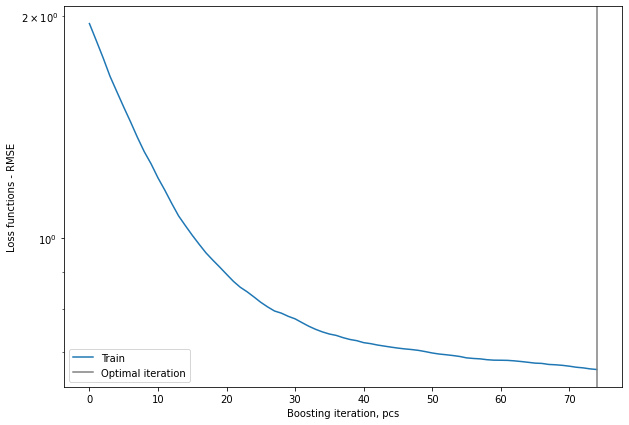

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -1.46
RMSE: 0.7
Relative RMSE(%):  0.283
MSE: 0.4
R square: 49.9%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.378
a1: 0.404
R^2: 0.528
Uncertainty
a0: 1.38+/-0.07
a1: 0.404+/-0.027


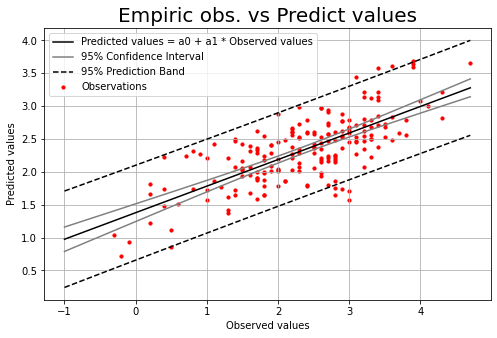

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

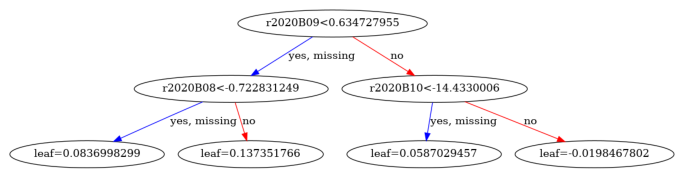

In [35]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

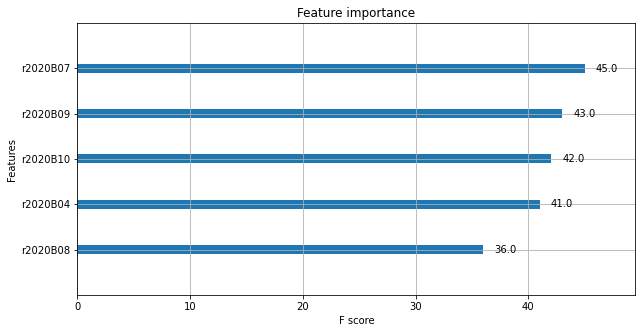

In [37]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

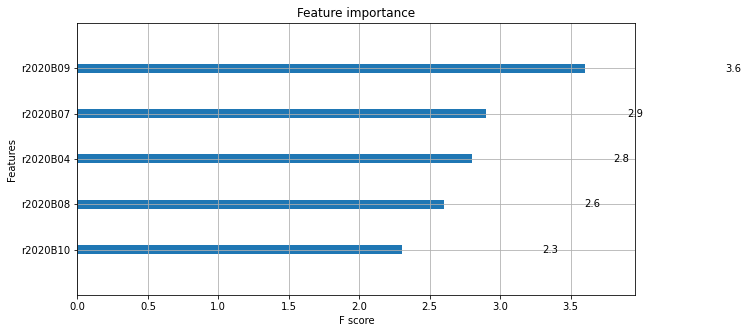

In [38]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

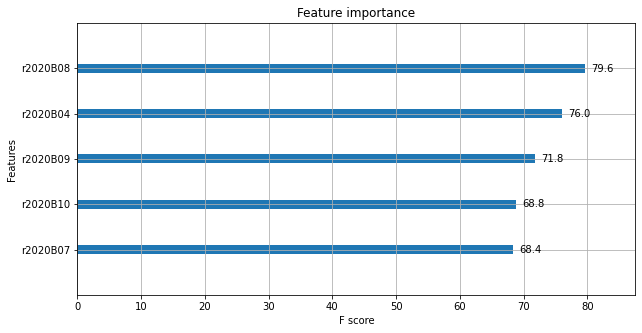

In [39]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [40]:
# Load SHAP`s library
import shap

In [41]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


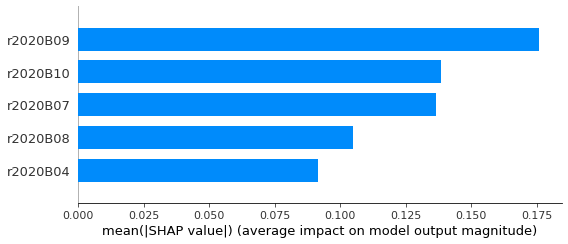

In [42]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

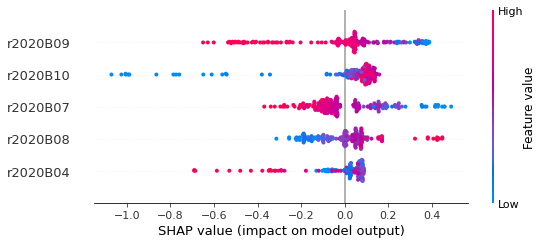

In [43]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

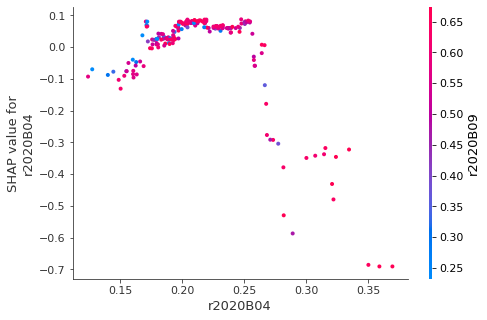

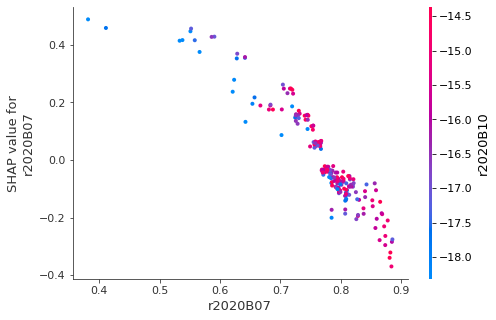

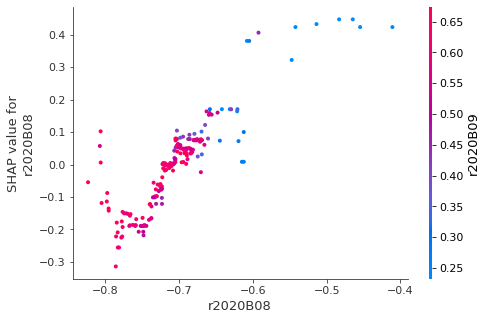

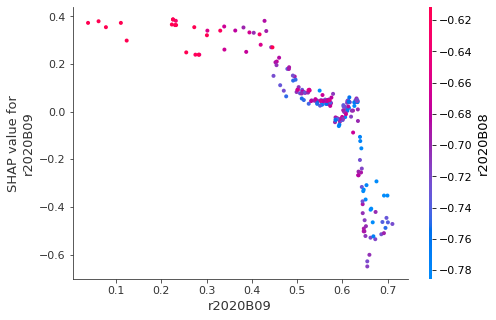

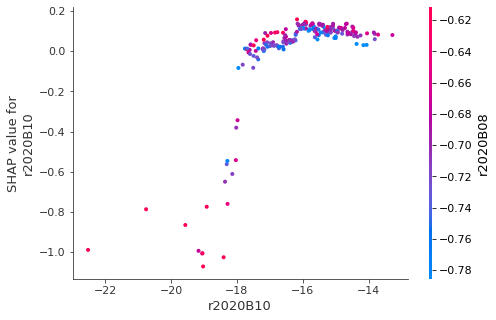

In [44]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [47]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/2020/Notebook/XGB_model_RN_Tag_Sr_Sentinel_data_2020.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/WORK/GIS and ML algoritms/6_Est_RN&biomass_all_site_Sentinel/2020/Notebook/XGB_model_RN_Tag_Sr_Sentinel_data_2020.txt")